## Author: Anuj Sachdeva

## Project : Unsupervised Learning

## Part 1:

• DOMAIN: Automobile

• CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

• DATA DESCRIPTION: The data concerns city-cycle fuel consumption in miles per gallon

Attribute Information:

1. mpg: continuous

2. cylinders: multi-valued discrete

3. displacement: continuous

4. horsepower: continuous

5. weight: continuous

6. acceleration: continuous

7. model year: multi-valued discrete

8. origin: multi-valued discrete

9. car name: string (unique for each instance)

• PROJECT OBJECTIVE: Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’

### Install the necessary libraries

In [455]:
import numpy as np   
import pandas as pd    

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans, AgglomerativeClustering


from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score

from scipy.stats import zscore
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.svm import SVC

from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

### 1.1. - Import and warehouse data:

### 1.1.1. - Import all the given datasets and explore shape and size.

In [551]:
car_name = pd.read_csv('Part1 - Car name.csv')
print('car_name Dataframe shape is : {}'.format(car_name.shape))

car_name Dataframe shape is : (398, 1)


In [552]:
car_attributes = pd.read_json("Part1 - Car-Attributes.json")
print("car_attributes json dataframe shape is : {}".format(car_attributes.shape))

car_attributes json dataframe shape is : (398, 8)


In [553]:
car_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


#### Observation : Info Command

1) Total number of rows in car_name dataset are 398

2) Total number of columns in car_name dataset are 1

3) 1 column is with Object dataype

6) car_name Column in car_name dataframe is non-null

In [554]:
car_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


#### Observation : Info Command

1) Total number of rows in car_attributes dataset are 398

2) Total number of columns in car_attributes dataset are 8

3) 3 columns are with float64 datatype

4) 4 columns are with int64 datatype

5) 1 column is with Object dataype

6) all the columns are non-null in car_attributes

### 1.1.2. - Merge all datasets onto one and explore final shape and size.

In [555]:
car_data = car_name.join(car_attributes)
print("car_data Merged dataframe shape is : {}".format(car_data.shape))

car_data Merged dataframe shape is : (398, 9)


In [556]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### Observation : Info Command

1) Total number of rows in car_data dataset are 398

2) Total number of columns in car_data dataset are 9

3) 3 columns are with float64 datatype

4) 4 columns are with int64 datatype

5) 2 column are with Object dataype now i.e. **car_name** and **hp**

6) all the columns are non-null in car_attributes

### 1.1.3. - Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

In [557]:
# Export to CSV, XLSX, JSON on local machine for future sue
car_data.to_csv("car_data.csv")
car_data.to_excel("car_data.xlsx")
car_data.to_json("car_data.json")

# Backup also for the fture use

car_data_backup = car_data.copy()

### 1.1.4. - Import the data from above steps into python.

In [558]:
car_data.head()

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1

Have already imported the datasets and have merged into the single dataset now i.e. car_data whcih is also exported to local machine in CSV, XLSX, JSON for future use

### 1.2. - Data cleansing:

### 1.2.1. - Missing/incorrect value treatment

In [559]:
# Checking the presence of any null values
car_data.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [560]:
# Different method to check the NUll values where the data type is bool
car_data.isnull().any()

car_name    False
mpg         False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
origin      False
dtype: bool

#### Observations : No Null values in the dataset. if the missing values were present then those should be replaced with either Mean or median after the Five point summary by checking the skewness for data

In [561]:
car_data.head()

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1

#### Observation: From info command hp column is object but from actual data it seems to be int64. this should be checked and datatype needs to be corrected

In [562]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(car_data.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
car_data[hpIsDigit['hp'] == False]   # from temp take only those rows where hp has false

car_name   mpg  cyl   disp hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0  ?  2046  19.0  71       1
126         ford maverick  21.0    6  200.0  ?  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0  ?  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0  ?  2905  14.3  80       1
354           renault 18i  34.5    4  100.0  ?  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0  ?  3035  20.5  82       1

In [563]:
# Replace missing values with NaN
car_data = car_data.replace('?', np.nan)
car_data[hpIsDigit['hp'] == False]

car_name   mpg  cyl   disp  hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0 NaN  2046  19.0  71       1
126         ford maverick  21.0    6  200.0 NaN  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0 NaN  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0 NaN  2905  14.3  80       1
354           renault 18i  34.5    4  100.0 NaN  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0 NaN  3035  20.5  82       1

There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations


In [564]:
#instead of dropping the rows, lets replace the missing values with median value. 
car_data.describe(include='all').T

count unique         top freq     mean       std   min      25%  \
car_name   398    305  ford pinto    6      NaN       NaN   NaN      NaN   
mpg        398    NaN         NaN  NaN  23.5146   7.81598     9     17.5   
cyl        398    NaN         NaN  NaN  5.45477     1.701     3        4   
disp       398    NaN         NaN  NaN  193.426    104.27    68   104.25   
hp         392    NaN         NaN  NaN  104.469   38.4912    46       75   
wt         398    NaN         NaN  NaN  2970.42   846.842  1613  2223.75   
acc        398    NaN         NaN  NaN  15.5681   2.75769     8   13.825   
yr         398    NaN         NaN  NaN  76.0101   3.69763    70       73   
origin     398    NaN         NaN  NaN  1.57286  0.802055     1        1   

             50%     75%   max  
car_name     NaN     NaN   NaN  
mpg           23      29  46.6  
cyl            4       8     8  
disp       148.5     262   455  
hp          93.5     126   230  
wt        2803.5    3608  5140  
acc         15.5  17.175  24.8  
yr            76      79    82  
origin         1       2     3

#### Mean imputation works better if the distribution is normally-distributed or has a Gaussian distribution, while median imputation is preferable for skewed distribution(be it right or left)

In [565]:
# replace the missing values with median value.

car_data_1 = car_data.copy()
car_data['hp'] = car_data['hp'].fillna(car_data['hp'].median())
# car_data['hp'] = car_data['hp'].astype('float64')  # converting the hp column from object / string type to float

In [566]:
print('Descriptive Stats before imputation for columns with missing values: \n', '--'*33)
display(car_data_1.describe(include='all').T)
print()
print('Descriptive Stats after imputation for columns with missing values: \n', '--'*33)
display(car_data.describe(include='all').T)
del car_data_1

Descriptive Stats before imputation for columns with missing values: 
 ------------------------------------------------------------------


count unique         top freq     mean       std   min      25%  \
car_name   398    305  ford pinto    6      NaN       NaN   NaN      NaN   
mpg        398    NaN         NaN  NaN  23.5146   7.81598     9     17.5   
cyl        398    NaN         NaN  NaN  5.45477     1.701     3        4   
disp       398    NaN         NaN  NaN  193.426    104.27    68   104.25   
hp         392    NaN         NaN  NaN  104.469   38.4912    46       75   
wt         398    NaN         NaN  NaN  2970.42   846.842  1613  2223.75   
acc        398    NaN         NaN  NaN  15.5681   2.75769     8   13.825   
yr         398    NaN         NaN  NaN  76.0101   3.69763    70       73   
origin     398    NaN         NaN  NaN  1.57286  0.802055     1        1   

             50%     75%   max  
car_name     NaN     NaN   NaN  
mpg           23      29  46.6  
cyl            4       8     8  
disp       148.5     262   455  
hp          93.5     126   230  
wt        2803.5    3608  5140  
acc         15.5  17.175  24.8  
yr            76      79    82  
origin         1       2     3


Descriptive Stats after imputation for columns with missing values: 
 ------------------------------------------------------------------


count unique         top freq     mean       std   min      25%  \
car_name   398    305  ford pinto    6      NaN       NaN   NaN      NaN   
mpg        398    NaN         NaN  NaN  23.5146   7.81598     9     17.5   
cyl        398    NaN         NaN  NaN  5.45477     1.701     3        4   
disp       398    NaN         NaN  NaN  193.426    104.27    68   104.25   
hp         398    NaN         NaN  NaN  104.304   38.2226    46       76   
wt         398    NaN         NaN  NaN  2970.42   846.842  1613  2223.75   
acc        398    NaN         NaN  NaN  15.5681   2.75769     8   13.825   
yr         398    NaN         NaN  NaN  76.0101   3.69763    70       73   
origin     398    NaN         NaN  NaN  1.57286  0.802055     1        1   

             50%     75%   max  
car_name     NaN     NaN   NaN  
mpg           23      29  46.6  
cyl            4       8     8  
disp       148.5     262   455  
hp          93.5     125   230  
wt        2803.5    3608  5140  
acc         15.5  17.175  24.8  
yr            76      79    82  
origin         1       2     3

#### Observation - After imputation

A observation after imputating the missing values: Medians and Means remain unchanged basis on the imputation. Type of skewness remain unchanged.

In [567]:
# Checking the presence of any null values after missing value treatement
car_data.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

#### Observation : Now NULLS are not present in any of the columns

#### Unique values for 'cyl', 'yr' and 'origin' as these are multivalue discrete/categorical variables

In [568]:
print("Unique values for Cylinder:", car_data['cyl'].unique())
print("Unique values for Year:", car_data['yr'].unique())
print("Unique values for Origin:", car_data['origin'].unique())

Unique values for Cylinder: [8 4 6 3 5]
Unique values for Year: [70 71 72 73 74 75 76 77 78 79 80 81 82]
Unique values for Origin: [1 3 2]


### 1.2.2. - Drop attribute/s if required using relevant functional knowledge

#### For Dropping the variables we need to check on the correlation and also apply some functional knowledge

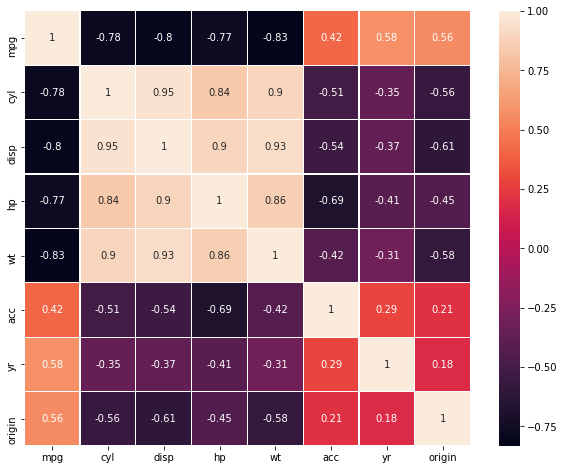

In [569]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(car_data.corr(),annot=True,linewidths=.05);

In [570]:
# Fucntion for displaying the Correlation matrix for all variables basis on the Lower and upper threshold
def correlation_matrix(df, Lower_threshold = 0.8, Upper_threshold = 1.0):
    corr = df.corr()
    sort = corr.abs().unstack().drop_duplicates()
    sort = sort.sort_values(kind = "quicksort", ascending = False)
    display(sort[(sort >= Lower_threshold) & (sort <= Upper_threshold)])

print("Correlation between the pairs whose correlation is more than .90")
correlation_matrix(car_data, Lower_threshold = 0.9, Upper_threshold =1.0)
print("Correlation between the pairs whose correlation is beween .80 and .90")
correlation_matrix(car_data, Lower_threshold = 0.8, Upper_threshold =.9)
print("Correlation between the pairs whose correlation is beween .70 and .80")
correlation_matrix(car_data, Lower_threshold = 0.7, Upper_threshold =.8)

Correlation between the pairs whose correlation is more than .90


mpg   mpg     1.000000
cyl   disp    0.950721
disp  wt      0.932824
dtype: float64

Correlation between the pairs whose correlation is beween .80 and .90


cyl   wt      0.896017
disp  hp      0.895778
hp    wt      0.862442
cyl   hp      0.841284
mpg   wt      0.831741
      disp    0.804203
dtype: float64

Correlation between the pairs whose correlation is beween .70 and .80


mpg  cyl    0.775396
     hp     0.773453
dtype: float64

#### Observation :

1) cyl and disp, disp and wt, disp and hp are correlated with each other with a correlation coeff greater than equal to 0.9.

2) cyl, disp and wt are independent variables and are highly corelated with each other, but lets not do that now because there are very less colmumns and there could be some dependency

3) car_name can also be dropped from the dataset as it is not going to serve any purpose during modelling and EDA.

#### Drop 'car_name' from the car_data

In [571]:
car_data = car_data.drop(['car_name'], axis=1)
car_data.head()

mpg  cyl   disp     hp    wt   acc  yr  origin
0  18.0    8  307.0  130.0  3504  12.0  70       1
1  15.0    8  350.0  165.0  3693  11.5  70       1
2  18.0    8  318.0  150.0  3436  11.0  70       1
3  16.0    8  304.0  150.0  3433  12.0  70       1
4  17.0    8  302.0  140.0  3449  10.5  70       1

### 1.2.3. - Perform another kind of corrections/treatment on the data

#### Hot encoding for origin vriable as it i categorical variable

In [572]:
car_data_dummy = pd.get_dummies(car_data, columns=['origin'])
car_data_dummy.head()

mpg  cyl   disp     hp    wt   acc  yr  origin_1  origin_2  origin_3
0  18.0    8  307.0  130.0  3504  12.0  70         1         0         0
1  15.0    8  350.0  165.0  3693  11.5  70         1         0         0
2  18.0    8  318.0  150.0  3436  11.0  70         1         0         0
3  16.0    8  304.0  150.0  3433  12.0  70         1         0         0
4  17.0    8  302.0  140.0  3449  10.5  70         1         0         0

#### lets drop the origin 3 from the dataframe as it will not be required

In [573]:
car_data_dummy = car_data_dummy.drop(['origin_3'],axis=1)

#### Obseration: Now we can see that one hot encoding is done and Origin variable is dropped and its correspoding new variables are created basis on its values

### 1.3. - Data analysis & visualisation:

### 1.3.1. - Perform detailed statistical analysis on the data.

### Five point summary

In [574]:
car_data.describe(include='all').T

count         mean         std     min       25%     50%       75%  \
mpg     398.0    23.514573    7.815984     9.0    17.500    23.0    29.000   
cyl     398.0     5.454774    1.701004     3.0     4.000     4.0     8.000   
disp    398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   
hp      398.0   104.304020   38.222625    46.0    76.000    93.5   125.000   
wt      398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000   
acc     398.0    15.568090    2.757689     8.0    13.825    15.5    17.175   
yr      398.0    76.010050    3.697627    70.0    73.000    76.0    79.000   
origin  398.0     1.572864    0.802055     1.0     1.000     1.0     2.000   

           max  
mpg       46.6  
cyl        8.0  
disp     455.0  
hp       230.0  
wt      5140.0  
acc       24.8  
yr        82.0  
origin     3.0

**Positively skewed:** Most frequent values are low and tail is towards high values.

**Negatively skewed:** Most frequent values are high and tail is towards low values.

If **Mode< Median< Mean** then the distribution is positively skewed.

If **Mode> Median> Mean** then the distribution is negatively skewed.

#### Observation - Descriptive statistics for the numerical variables

#### Descriptive statistics for the numerical variables

mpg: Range of Q1 to Q3 is between 17.5 to 29. Right skeyed

hp: Range of Q1 to Q3 is 76 to 125. Right skeyed

acc: Range of Q1 to Q3 is 13.8 to 17.2. Normally distributed

yr: Range of Q1 to Q3 is 73 to 79. Normally distributed

disp: Range of Q1 to Q3 is 104.2 to 262.000. Right Skeyed

wt: Range of Q1 to Q3 is 2223.750 to 3608.000. Right Skeyed

In [575]:
# Check for Skewness of the columns if there is any
car_data.skew()

mpg       0.457066
cyl       0.526922
disp      0.719645
hp        1.106224
wt        0.531063
acc       0.278777
yr        0.011535
origin    0.923776
dtype: float64

#### From Skewness also we can see that mpg. cyl and hp are right skeyed and they are positive 

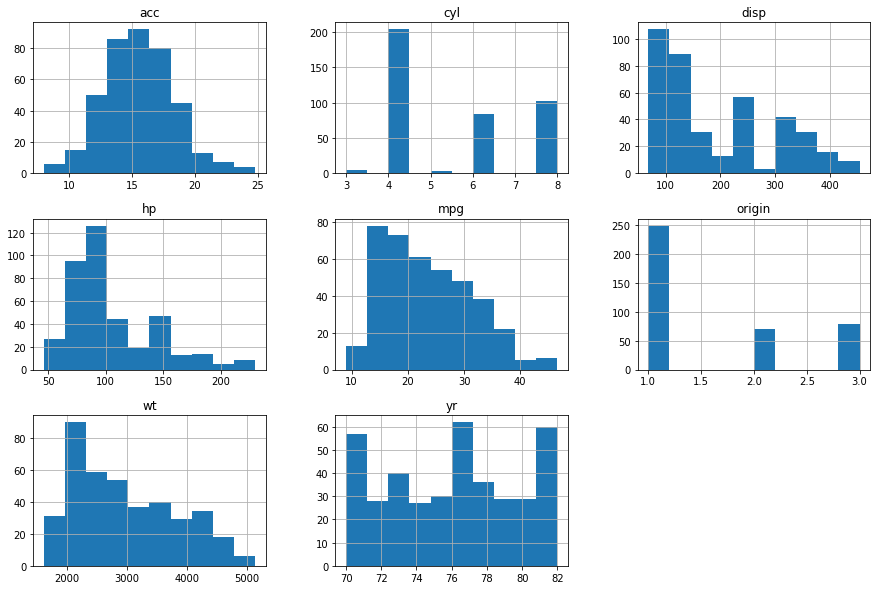

In [576]:
car_data.hist(figsize=(15,10));

### 1.3.2. - Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns

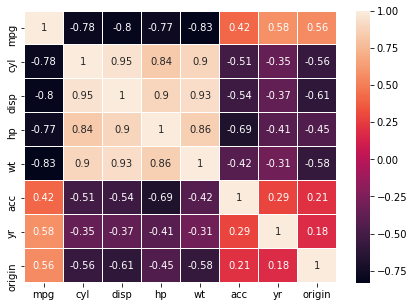

In [577]:
# Checking the correlation between the variables
fig = plt.figure(figsize = (7,5))
sns.heatmap(car_data.corr(),annot=True,linewidths=.05);

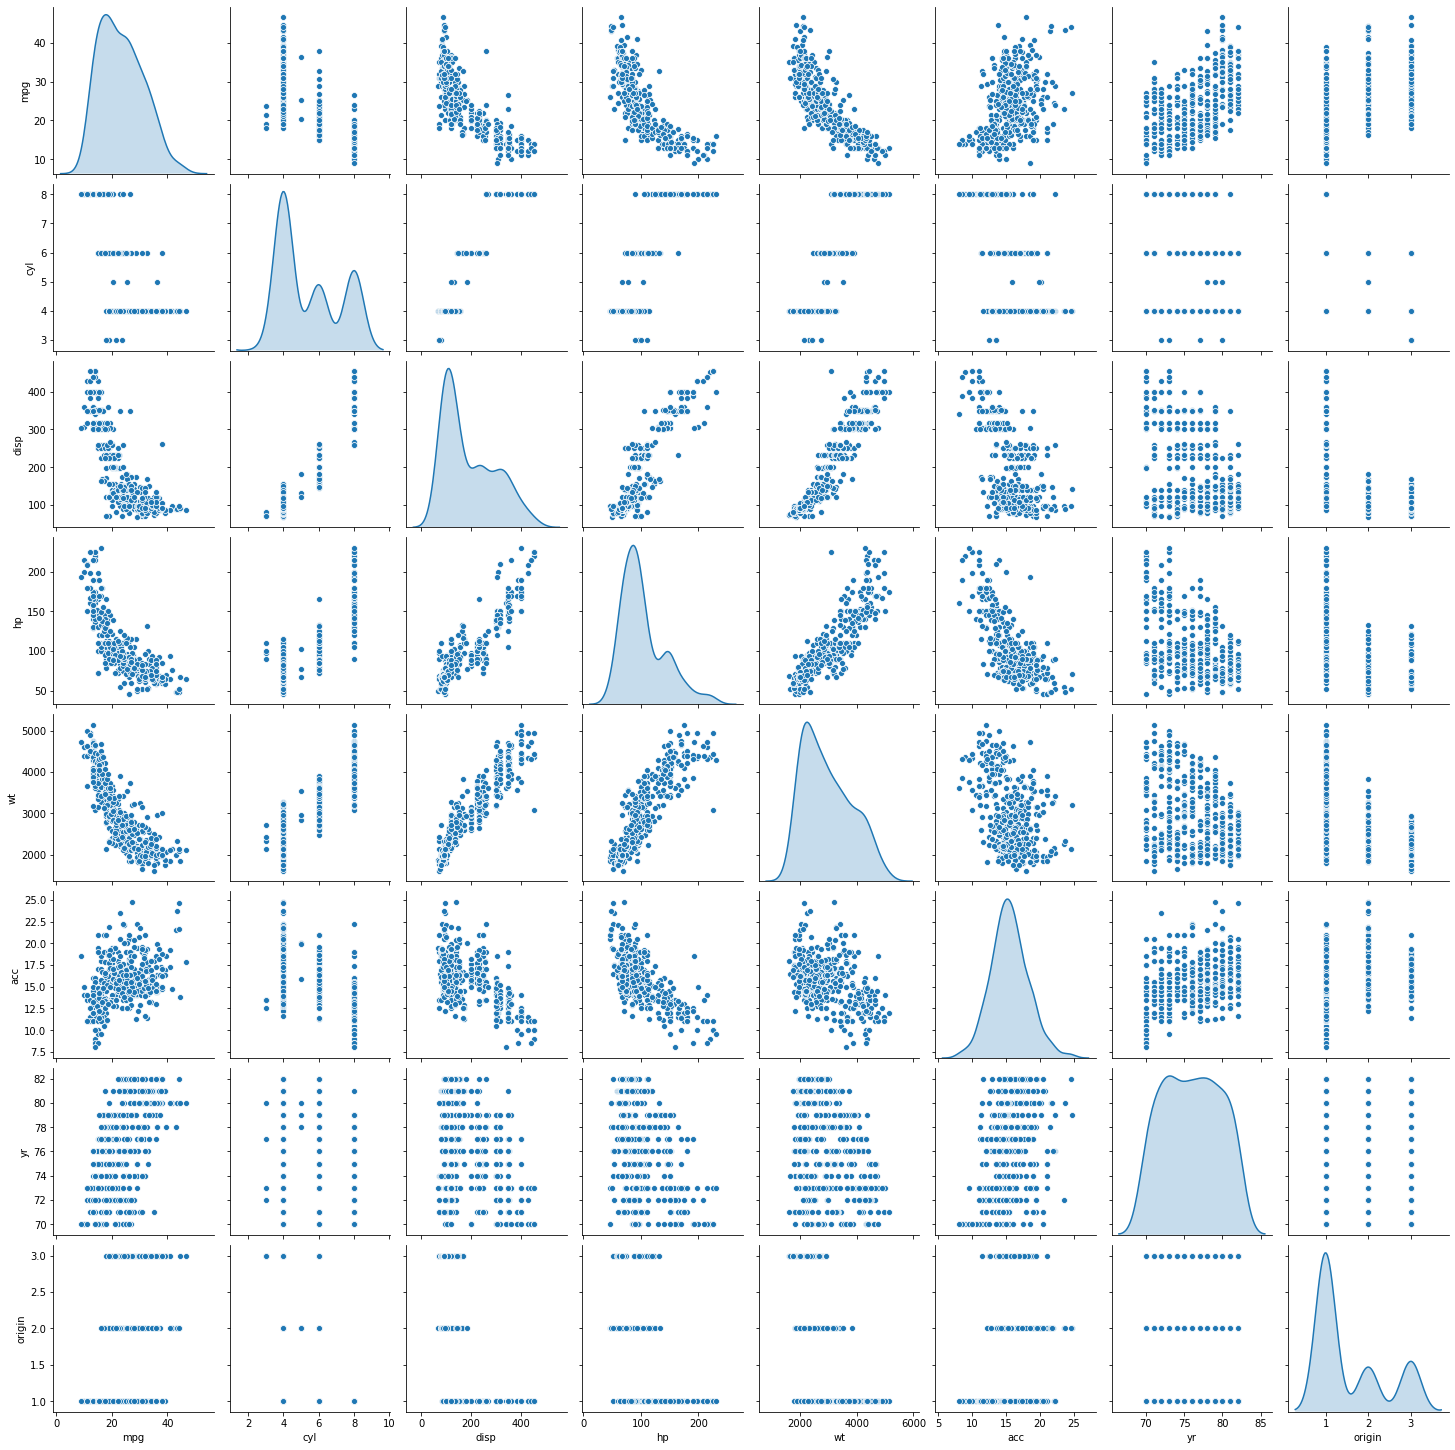

In [578]:
# pairplot of the car_data after dropping the columns
sns.pairplot(car_data,diag_kind='kde');

#### From above pairplot and correlation matrix we can see that cyl and hp are highly correlated and we will do the bivariate analysis going forward

#### mpg is negatively correlated with hp, cyl, disp and wt

1) miles per gallon is less when horse power is more and vice versa

2) miles per gallon is less when no of cylinders are more and and vice versa

3) miles per gallon is less when displacement is more and and vice versa

4) miles per gallon is less when weight is more and and vice versa

#### cyl is positively correlated with hp, disp and wt it means more the no of cylinder more the horse power and more is the weight of the car. 

#### No of cylinders, Horsepower, Displacement and Weight are directly proportional to each other

### Univariate Analysis

#### Univariate Boxplot of car_data dataset

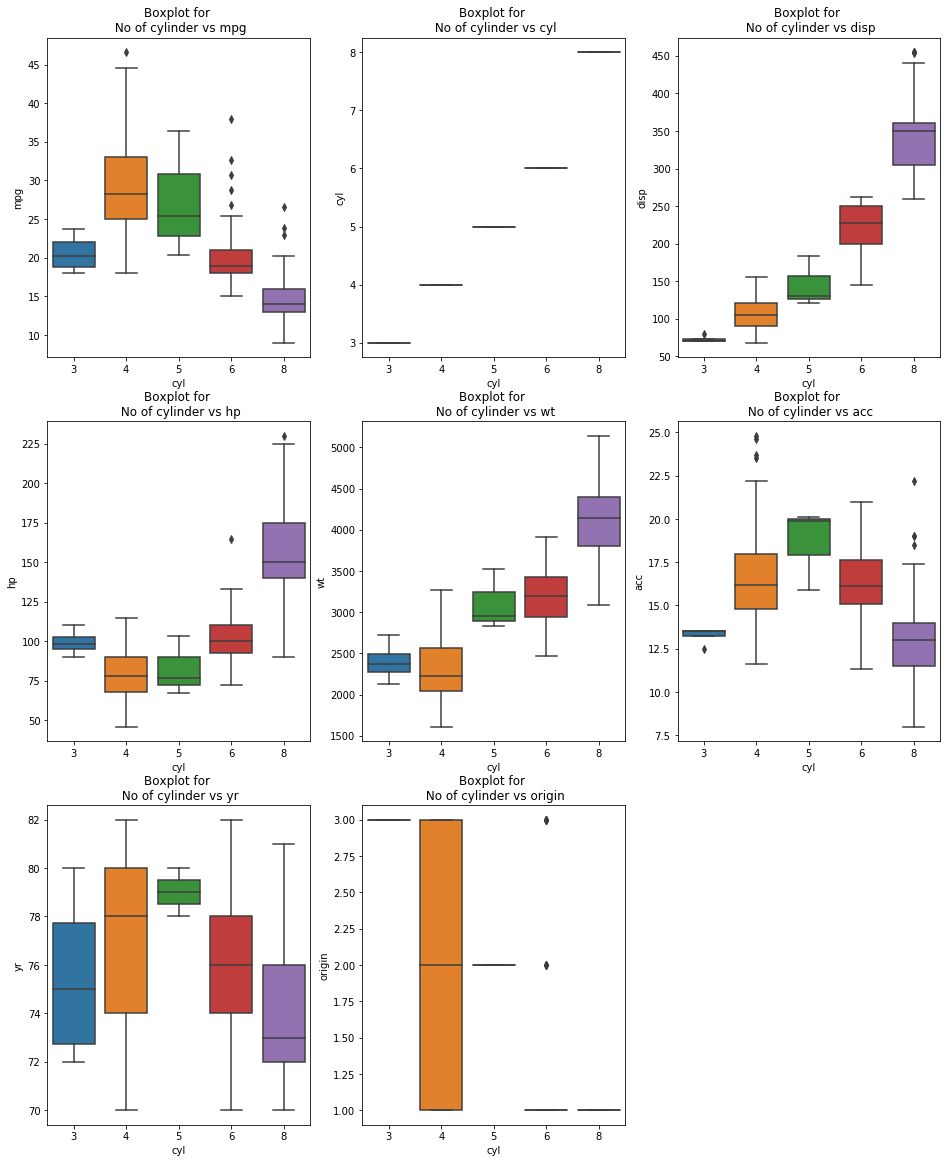

In [579]:
# Univariate boxplot of all the variables in Vehicle_out_fixed dataframe
fig = plt.figure(figsize = (16,20))

i=1
for col in car_data.columns:
    plt.subplot(3, 3, i)
    plt.title("Boxplot for \n No of cylinder vs {}".format(col))
    sns.boxplot(data = car_data , y=col, x='cyl')
    i=i+1
plt.show()

In [580]:
print(car_data['cyl'].value_counts())
car_data[car_data['cyl'] == 5]

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64


mpg  cyl   disp     hp    wt   acc  yr  origin
274  20.3    5  131.0  103.0  2830  15.9  78       2
297  25.4    5  183.0   77.0  3530  20.1  79       2
327  36.4    5  121.0   67.0  2950  19.9  80       2

In [581]:
print('origin and counts of cars when cyl are 3 : \n{}\n'.format(car_data[car_data['cyl'] == 3]['origin'].value_counts()))
print('origin and counts of cars when cyl are 4 : \n{}\n'.format(car_data[car_data['cyl'] == 4]['origin'].value_counts()))
print('origin and counts of cars when cyl are 5 : \n{}\n'.format(car_data[car_data['cyl'] == 5]['origin'].value_counts()))
print('origin and counts of cars when cyl are 6 : \n{}\n'.format(car_data[car_data['cyl'] == 6]['origin'].value_counts()))
print('origin and counts of cars when cyl are 8 : \n{}\n'.format(car_data[car_data['cyl'] == 8]['origin'].value_counts()))

origin and counts of cars when cyl are 3 : 
3    4
Name: origin, dtype: int64

origin and counts of cars when cyl are 4 : 
1    72
3    69
2    63
Name: origin, dtype: int64

origin and counts of cars when cyl are 5 : 
2    3
Name: origin, dtype: int64

origin and counts of cars when cyl are 6 : 
1    74
3     6
2     4
Name: origin, dtype: int64

origin and counts of cars when cyl are 8 : 
1    103
Name: origin, dtype: int64



### Observations from Boxplot basis on the Cylinders:

#### 1) Miles per gallon is very low when no of cylinders are 6 and 8.

#### 2) Horsepower is more when the no of cylinders are 8 and from the boxlot also we can see that horse power and no of cylinders are directly proportional. Means that when no of cylinders are more then horsepower is also more.

#### 3) Count of cars with cylinders as 5 is 3 aand all are from model year 78 to 80 and origin 2

#### 4) Acceleration with min and max cylinders are is very less compared to 4,5 and 6 cylinder cars

#### 5) From Box plot and above print commands, we can see that cars with cylinder = 3 are from origin 3, cars with cylinder = 5 are from origin 2, cars with cylinder = 8 are from origin 1

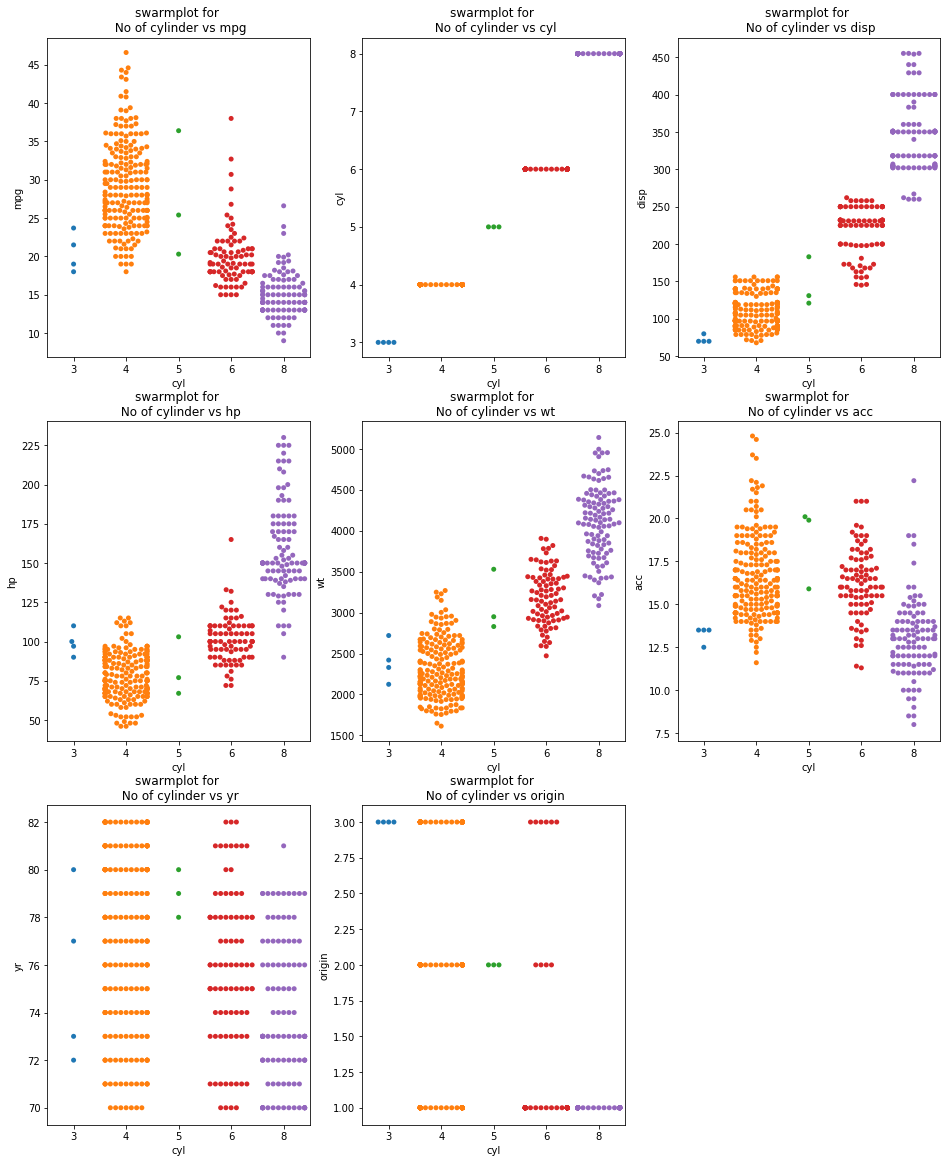

In [582]:
# Univariate swarmplot of all the variables in car_data dataframe
fig = plt.figure(figsize = (16,20))

i=1
for col in car_data.columns:
    plt.subplot(3, 3, i)
    plt.title("swarmplot for \n No of cylinder vs {}".format(col))
    sns.swarmplot(data = car_data , y=col, x='cyl')
    i=i+1
plt.show()

#### All the above observations are also seen from Swarmplot too

In [583]:
car_data['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

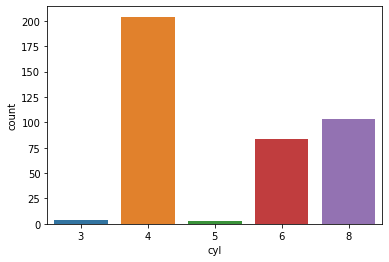

In [584]:
sns.countplot(car_data['cyl'])

#### Observation: Cars with cylinder 4 are 204

### lets see how origin is distributed among other attributes

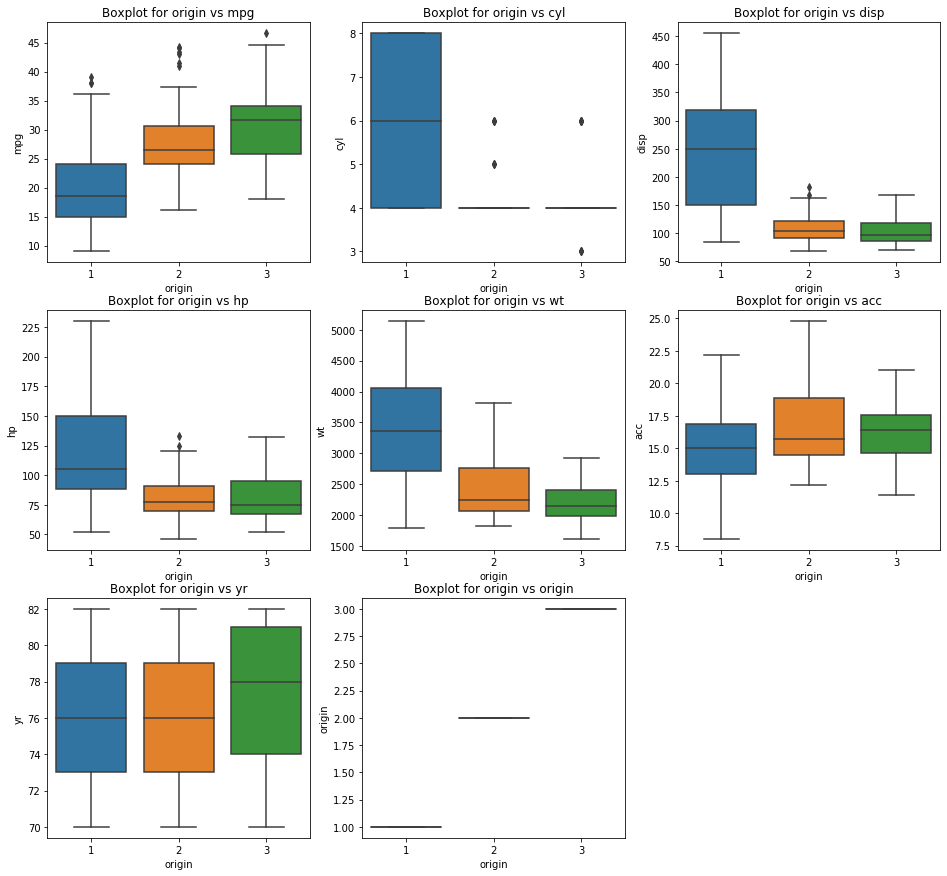

In [585]:
# Univariate boxplot of all the variables in Vehicle_out_fixed dataframe
fig = plt.figure(figsize = (16,15))

i=1
for col in car_data.columns:
    plt.subplot(3, 3, i)
    plt.title("Boxplot for origin vs {}".format(col))
    sns.boxplot(data = car_data , y=col, x='origin')
    i=i+1
plt.show()

In [586]:
print('Cyl and counts of cars when origin is 1 : \n{}\n'.format(car_data[car_data['origin'] == 1]['cyl'].value_counts()))
print('Cyl and counts of cars when origin is 2 : \n{}\n'.format(car_data[car_data['origin'] == 2]['cyl'].value_counts()))
print('Cyl and counts of cars when origin is 3 : \n{}\n'.format(car_data[car_data['origin'] == 3]['cyl'].value_counts()))

Cyl and counts of cars when origin is 1 : 
8    103
6     74
4     72
Name: cyl, dtype: int64

Cyl and counts of cars when origin is 2 : 
4    63
6     4
5     3
Name: cyl, dtype: int64

Cyl and counts of cars when origin is 3 : 
4    69
6     6
3     4
Name: cyl, dtype: int64



### Observations from Boxplot basis on the Origin:

#### 1) Miles per gallon is very low when origin is 1 and high in origin 3 respectivley

#### 2) No cars are with cylinder 5 and 8 when origin is 3, Very few cars with cylinder with 5 and 6 whenn origin is 2

#### 3) Horsepower of cars with origin 2 and 3 in comparsion with origin 1 

#### 4) Acceleration with origin 2 cars is maximum

#### 5) Displacement of origin cars is more in comparsion to origin 2 and 3 

#### 6) Weight of origin cars is more in comparsion to origin 2 and 3 

### Bivariate Analysis

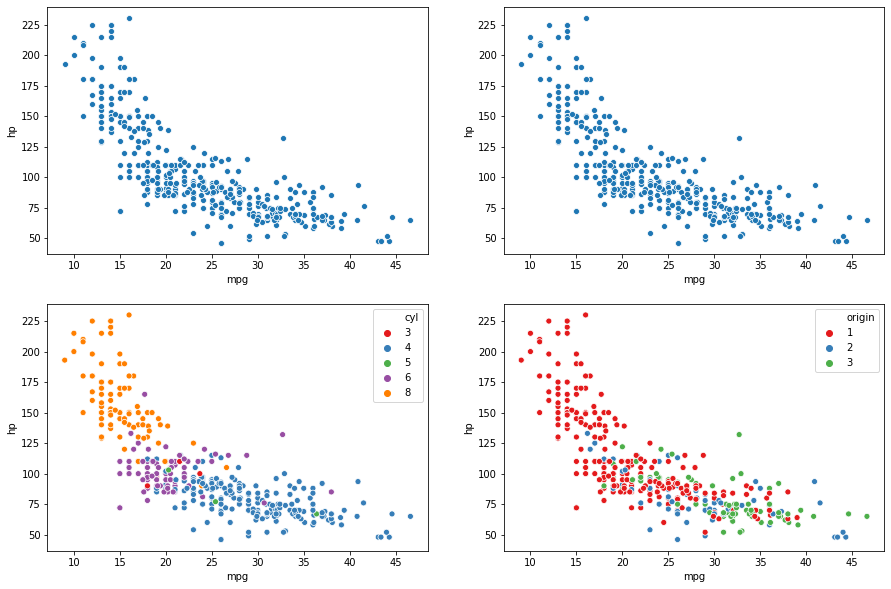

In [587]:
# Plotting the Scatter plot and lineplot for tenure and TotalCharges

fig = plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.scatterplot(car_data["mpg"],car_data["hp"])
plt.subplot(2, 2, 2)
sns.scatterplot(car_data["mpg"],car_data["hp"])
plt.subplot(2, 2, 3)
sns.scatterplot(car_data["mpg"],car_data["hp"],hue=car_data["cyl"],palette='Set1')
plt.subplot(2, 2, 4)
sns.scatterplot(car_data["mpg"],car_data["hp"],hue=car_data["origin"],palette='Set1')
plt.show()

#### Observation: 

1) **High Horsepower and high cylinders and low Miles per gallon**. cars with cylinder 8 which have more horse power have less miles per gallon. cars with less cylinders i.e. have more miles per gallon.

2) **Origin 1 cars are more distributed**

3) **cars from Origin 2 and 3 have high miles per gallon and less horsepower in comparison to cars from origin 1**

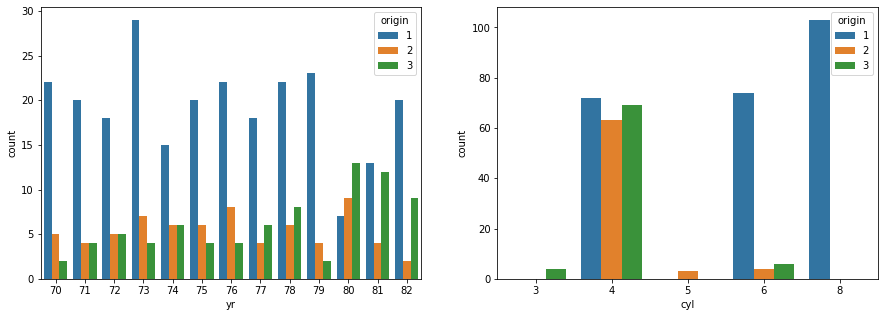

In [588]:
# Plotting the countplot for cyl and yr with origin

fig = plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
sns.countplot(car_data["yr"],hue=car_data["origin"])
plt.subplot(1, 2, 2)
sns.countplot(car_data["cyl"],hue=car_data["origin"])
plt.show()

#### Observation: 

#### 1) Origin 3 cars are increasing every year

#### 2) Cars with cylinder 5 are only from origin 2

#### 3) Cars with cylinder 3 are only from origin 3

#### 4) cars with cylinder 4 are overall distributed for origin 1, origin 2 and origin 3

#### 4) Most of the cars with cylinder 6 are from origin 1

#### 5) Cars with cylinder 8 are from origin 1

### 1.4. - Machine learning:

### 1.4.1. - Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data

### 1.4.2. - Share your insights about the difference in using these two methods

### K Means

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

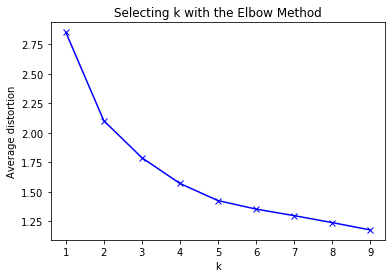

In [589]:
# K-means clustering

# Scale the data
car_data_scaled = car_data_dummy.apply(zscore)

#Finding optimal no. of clusters
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(car_data_scaled)
    prediction=model.predict(car_data_scaled)
    meanDistortions.append(sum(np.min(cdist(car_data_scaled, model.cluster_centers_, 'euclidean'), 
                                      axis=1)) / car_data_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### Observation: From above elbow method, we can see that the K value should be 3 and from earlier visualizations we have seen that there could be 3 possible clusters.

In [590]:
car_data_Kmeans3 = KMeans(3)
car_data_Kmeans3.fit(car_data_scaled)

car_data['group'] = car_data_Kmeans3.predict(car_data_scaled)
car_data_dummy['group'] = car_data_Kmeans3.predict(car_data_scaled)
car_data_scaled['group'] = car_data_Kmeans3.predict(car_data_scaled)

In [591]:
car_data_groups = car_data.groupby(['group'])
car_data_dummy_groups = car_data_dummy.groupby(['group'])
car_data_scaled_groups = car_data_scaled.groupby(['group'])
car_data_scaled_groups.mean()

mpg       cyl      disp        hp        wt       acc        yr  \
group                                                                         
0      0.015519 -0.198892 -0.151090 -0.342551 -0.143059  0.338828  0.236413   
1      0.766223 -0.819531 -0.858318 -0.656847 -0.796565  0.355502  0.172160   
2     -1.127260  1.486419  1.468657  1.473388  1.367364 -1.033718 -0.611986   

       origin_1  origin_2  
group                      
0      0.706472 -0.461968  
1     -1.292726  0.814861  
2      0.773559 -0.461968

In [592]:
car_data_scaled.groupby(["group"]).count()

mpg  cyl  disp   hp   wt  acc   yr  origin_1  origin_2
group                                                        
0      154  154   154  154  154  154  154       154       154
1      144  144   144  144  144  144  144       144       144
2      100  100   100  100  100  100  100       100       100

0         AxesSubplot(0.1,0.559091;0.363636x0.340909)
1    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

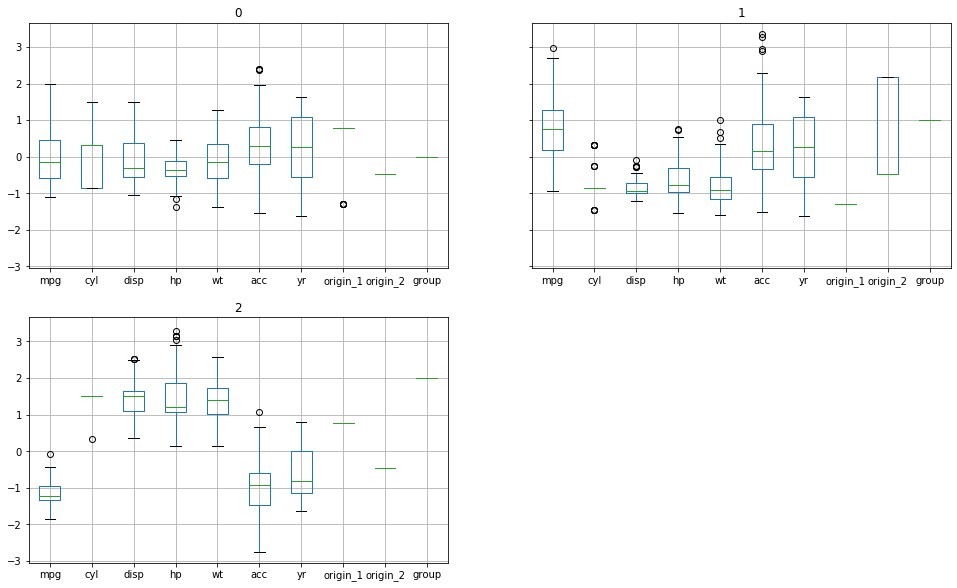

In [593]:
car_data_scaled_groups.boxplot(layout = (2,2),figsize=(16,10))

In [594]:
car_data_scaled_groups.mean()

mpg       cyl      disp        hp        wt       acc        yr  \
group                                                                         
0      0.015519 -0.198892 -0.151090 -0.342551 -0.143059  0.338828  0.236413   
1      0.766223 -0.819531 -0.858318 -0.656847 -0.796565  0.355502  0.172160   
2     -1.127260  1.486419  1.468657  1.473388  1.367364 -1.033718 -0.611986   

       origin_1  origin_2  
group                      
0      0.706472 -0.461968  
1     -1.292726  0.814861  
2      0.773559 -0.461968

### Observations from above Boxplot for 3 clusters: 

#### 1) Cluster 0 :

Miles per gallon is Average 

Number of cyinders are Average

Displacement is Average

Horsepower is Average 

Weight is Average

Acceleration is High 

year of model is in between

#### 2) Cluster 1:

Miles per gallon is High 

Number of cyinders are very low

Displacement is low

Horsepower is Low 

Weight is low

Acceleration is Average 

year of Model is high

One origin has majority

#### 3) Cluster 2 :

Miles per gallon is Low 

Number of cyinders are High

Displacement is High

Horsepower is High 

Weight is High

Acceleration is Low 

year of model is low

### Hierarchical clustering.

In [595]:
car_data_scaled_hierarchical = car_data_scaled.iloc[:,:-1]
Z = linkage(car_data_scaled_hierarchical, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(car_data_scaled_hierarchical))
c

0.7588366033426734

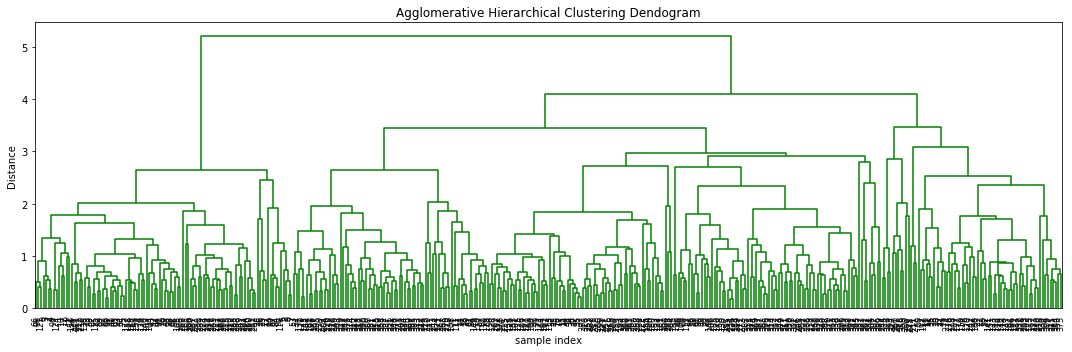

In [596]:
plt.figure(figsize=(15, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.)
plt.tight_layout()

### From dendogram, We can see that there could be more clusters like 5 or 6. Lets try with 6 clusters

In [597]:
car_data_hier6_model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')
car_data_hier6_model.fit(car_data_scaled_hierarchical)
car_data_scaled['group6'] = car_data_hier6_model.labels_
car_data['group6'] = car_data_hier6_model.labels_
car_data_dummy['group6'] = car_data_hier6_model.labels_


car_data_scaled.groupby(["group6"]).count()

mpg  cyl  disp   hp   wt  acc   yr  origin_1  origin_2  group
group6                                                               
0       152  152   152  152  152  152  152       152       152    152
1        11   11    11   11   11   11   11        11        11     11
2        56   56    56   56   56   56   56        56        56     56
3       100  100   100  100  100  100  100       100       100    100
4        76   76    76   76   76   76   76        76        76     76
5         3    3     3    3    3    3    3         3         3      3

0         AxesSubplot(0.1,0.559091;0.235294x0.340909)
1    AxesSubplot(0.382353,0.559091;0.235294x0.340909)
2    AxesSubplot(0.664706,0.559091;0.235294x0.340909)
3             AxesSubplot(0.1,0.15;0.235294x0.340909)
4        AxesSubplot(0.382353,0.15;0.235294x0.340909)
5        AxesSubplot(0.664706,0.15;0.235294x0.340909)
dtype: object

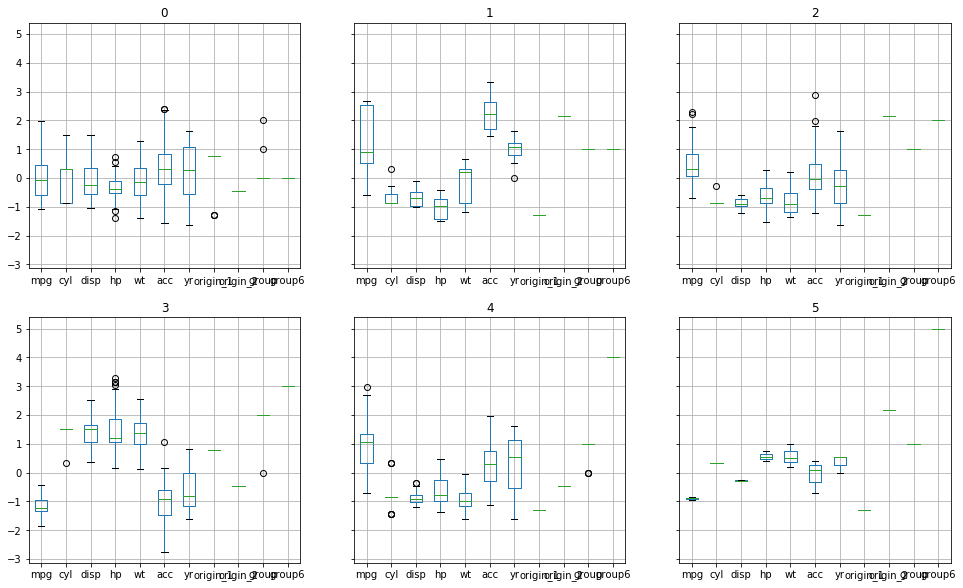

In [598]:
car_data_scaled_group6 = car_data_scaled.groupby(["group6"])
# car_data_dummy_group6 = car_data_scaled.groupby(["group6"])
car_data_group6 = car_data_scaled.groupby(["group6"])

car_data_scaled_group6.boxplot(layout = (2,3), figsize=(16,10))

### Observation Hierarchical clustering and Dendogram: 


#### After model Fit and from the boxplot, we can see that data is mostly spread across 3 clusters i.e. 0, 3, 4.

#### But Clusters 1 ,2 and 5 seems different and items seems to be overfit

### Number of clusters should be 3 as derived from the analysis.

### 1.5. - Answer below questions based on outcomes of using ML based methods

### 1.5.1. - Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

**No of Clusters** = 3

#### Observation - Analysis in the part 1.4 clearly shows that after the hierarichal clustering and by creating the dendogram the probale clusters should be 3. This can also be derived from the pairplots and histograms that clusters should be 3

### 1.5.2. - Use linear regression model on different clusters separately and print the coefficients of the models individually

In [599]:
car_data_dummy.head()

mpg  cyl   disp     hp    wt   acc  yr  origin_1  origin_2  group  group6
0  18.0    8  307.0  130.0  3504  12.0  70         1         0      2       3
1  15.0    8  350.0  165.0  3693  11.5  70         1         0      2       3
2  18.0    8  318.0  150.0  3436  11.0  70         1         0      2       3
3  16.0    8  304.0  150.0  3433  12.0  70         1         0      2       3
4  17.0    8  302.0  140.0  3449  10.5  70         1         0      2       3

In [600]:
# Liner regression model

regression_model = LinearRegression()

def fit_linear_model(X, y, result):
    # split data set in train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    regression_model.fit(X_train, y_train)
    
    result['TrainData_score'].append(regression_model.score(X_train, y_train))
    result['TestData_score'].append(regression_model.score(X_test, y_test))
    
    for idx, col_name in enumerate(X_train.columns):
        coeff_col = '%s_co-eff' % col_name
        if coeff_col not in result:
            result[coeff_col] = []    
        result[coeff_col].append(regression_model.coef_[idx])
    
    result['intercept'].append(regression_model.intercept_)
    
    return result

In [601]:
result = {'Dataset':[], 'TrainData_score':[], 'TestData_score':[], 'intercept':[]}

# Based on clusters, let try to fit a linear model

for cluster_index in [0,1,2,'all']:
    # Get the cluster dataset using cluster index/group
    result['Dataset'].append(cluster_index)
    if(cluster_index == 'all'):
        car_data_dummy_group = car_data_scaled
    else:
        car_data_dummy_group = car_data_scaled[car_data_scaled['group'] == cluster_index]

    # define X and y variables
    X = car_data_dummy_group.drop(['mpg', 'group','group6'], axis=1)
    y = car_data_dummy_group['mpg']
    
    result = fit_linear_model(X, y, result)

pd.DataFrame(result)

Dataset  TrainData_score  TestData_score  intercept  cyl_co-eff  \
0       0         0.809727        0.790866  -0.301995    0.087685   
1       1         0.682368        0.717667   0.245571   -0.046825   
2       2         0.537066        0.689562  -0.556297   -0.134492   
3     all         0.814103        0.843314   0.015510   -0.085923   

   disp_co-eff  hp_co-eff  wt_co-eff  acc_co-eff  yr_co-eff  origin_1_co-eff  \
0    -0.099051  -0.388495  -0.626775   -0.111789   0.356798     1.149660e-01   
1     0.568635  -0.178630  -0.957795    0.156359   0.415194     0.000000e+00   
2     0.133442  -0.131837  -0.229496   -0.057916   0.184173    -2.196242e-30   
3     0.386150  -0.106375  -0.796574    0.021847   0.395941    -1.484998e-01   

   origin_2_co-eff  
0     9.801326e-34  
1    -1.699965e-02  
2     2.196242e-30  
3     2.955636e-02

### 1.5.3. - How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.

### observations:

From Above Dataframe, we can see that when No clusters are used and Linear model is created then Accuracy is pretty good i.e. 84%

Accuracy scores when Liner model is created for Cluster 0 is 79%

Accuracy scores when Liner model is created for Cluster 1 is 71%

Accuracy scores when Liner model is created for Cluster 2 is 69%

Performacne of models with the clustering is always Robust but in our case We have very less data and that could be the reason accuracy without the clustering is better

### 1.6. - Improvisation:

### 1.6.1. - Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to perform a better data analysis in future

1) More data should be caputred so that Training and testing for the model creation can be accurate. Training with more data can give better accuracy for the MPG

2) Would be good if we can have a information on the number of persons driving the car. It usually happens when the car is run by a single have more mileage than car is driven by 2-3 person because the driving style is different of each person.

====================================================================================================================

## Part 2:

• DOMAIN: Manufacturing

• CONTEXT: Company X curates and packages wine across various vineyards spread throughout the country

• DATA DESCRIPTION: The data concerns the chemical composition of the wine and its respective quality

Attribute Information:

1. A, B, C, D: specific chemical composition measure of the wine

2. Quality: quality of wine

• PROJECT OBJECTIVE: Goal is to build a synthetic data generation model using the existing data provided by the company

### Install the necessary libraries

In [422]:
import numpy as np   
import pandas as pd    

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans, AgglomerativeClustering


from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score

from scipy.stats import zscore
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.svm import SVC

### 2.1: Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data

In [423]:
wine_data = pd.read_excel("Part2 - Company.xlsx")
print('wine_data Dataframe shape is : {}'.format(wine_data.shape))

wine_data Dataframe shape is : (61, 5)


In [424]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [425]:
wine_data.head()

A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A

#### Missing values for Quality column

In [426]:
# Checking the presence of any null values
wine_data.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

#### 18 missing values from the Quality column

In [427]:
wine_data['Quality'].unique()

array(['Quality A', 'Quality B', nan], dtype=object)

In [428]:
wine_data[wine_data['Quality'].isnull()]

A    B    C    D Quality
2   159  163  135  131     NaN
5   153  140  154  199     NaN
7   191  144  143  154     NaN
9   145  178  158  141     NaN
14  186  142  146  174     NaN
18  167  171  163  191     NaN
23  171  185  181  183     NaN
27  193  169  199  155     NaN
29   29   49    6   35     NaN
32  161  138  143  139     NaN
35  181  147  174  130     NaN
40  179  143  189  177     NaN
46  197  173  165  197     NaN
52  188  178  175  162     NaN
57  137  182  165  199     NaN
58   88   39    9  102     NaN
59  180  157  192  198     NaN
60  157  135  135  156     NaN

In [429]:
wine_data.describe(include='all').T

count unique        top freq     mean      std  min  25%  50%  75%  \
A          61    NaN        NaN  NaN  118.557  61.7715    3   61  136  171   
B          61    NaN        NaN  NaN  116.639  57.8979    5   63  138  168   
C          61    NaN        NaN  NaN  114.082  65.6154    3   59  135  174   
D          61    NaN        NaN  NaN  114.459  63.1444    3   51  132  174   
Quality    43      2  Quality A   26      NaN      NaN  NaN  NaN  NaN  NaN   

         max  
A        200  
B        200  
C        200  
D        199  
Quality  NaN

In [430]:
wine_data['Quality'].value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

### wine_data contains 61 different wine quality data. 4 parameters i.e. A, B, C, and D are defining the quality of wine.

#### As of now column "Quality" has two distinct values i.e. 'Quality A' and 'Quality B'

Lets replace teh NAN with 'Quality NAN'

In [431]:
wine_data["Quality"] = wine_data["Quality"].fillna('Quality NAN')

In [432]:
wine_data['Quality'].value_counts()

Quality A      26
Quality NAN    18
Quality B      17
Name: Quality, dtype: int64

#### now there are three types of Quality of the Wine i.e. Quality A, Quality B and Quality NAN 

In [433]:
wine_data_X = wine_data.copy()

wine_data_X = wine_data_X.drop('Quality',axis=1)
wine_data_y = wine_data['Quality']

In [434]:
wine_data_X

A    B    C    D
0    47   27   45  108
1   174  133  134  166
2   159  163  135  131
3    61   23    3   44
4    59   60    9   68
..  ...  ...  ...  ...
56  200  186  185  179
57  137  182  165  199
58   88   39    9  102
59  180  157  192  198
60  157  135  135  156

[61 rows x 4 columns]

In [435]:
# Apply zscore and scale all the X attributes using standard mean=0 and st. deviation=1.
wine_data_X_Scaled=wine_data_X.apply(zscore)
wine_data_X_Scaled.head()

A         B         C         D
0 -1.168034 -1.561080 -1.061569 -0.103138
1  0.904992  0.284923  0.306077  0.823013
2  0.660147  0.807376  0.321443  0.264129
3 -0.939512 -1.630740 -1.706975 -1.125099
4 -0.972158 -0.986381 -1.614775 -0.741864

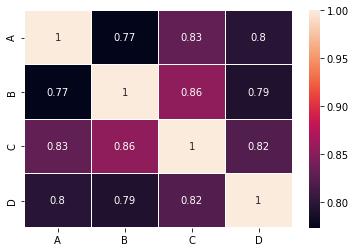

In [436]:
fig = plt.figure(figsize = (6,4))
sns.heatmap(wine_data.corr(),annot=True,linewidths=.05);

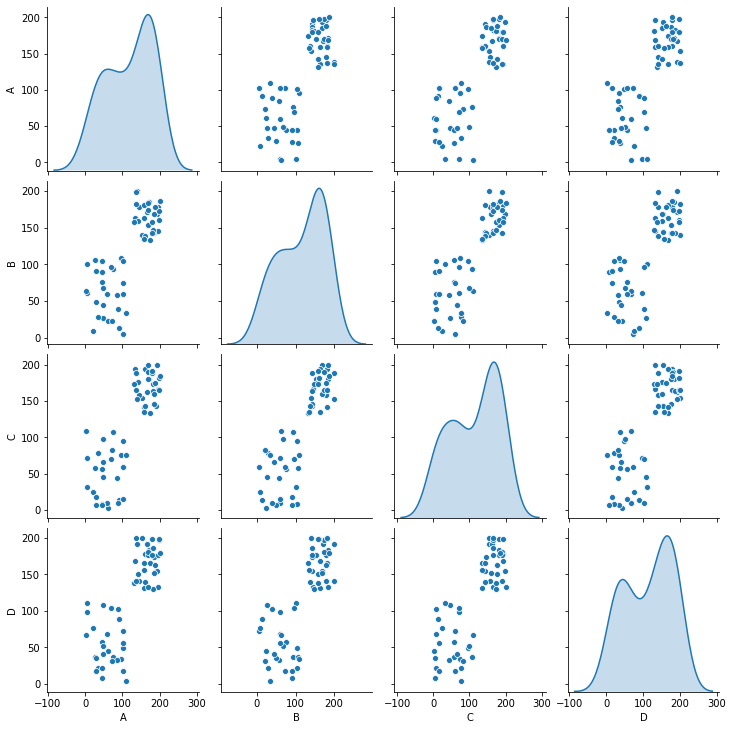

In [437]:
sns.pairplot(wine_data, diag_kind='kde');

### From the above plots, it is clearly visible that there could be 2 Clusters

### Centroid based/K-means clustering can be appied with K=2.

In [438]:
# Lets use the K-means with K=2
wine_data_model = KMeans(2)
wine_data_model.fit(wine_data_X_Scaled)

wine_quality_prediction = wine_data_model.predict(wine_data_X_Scaled)
wine_data['Predicted_Quality'] = wine_quality_prediction

wine_data.head()

A    B    C    D      Quality  Predicted_Quality
0   47   27   45  108    Quality A                  1
1  174  133  134  166    Quality B                  0
2  159  163  135  131  Quality NAN                  0
3   61   23    3   44    Quality A                  1
4   59   60    9   68    Quality A                  1

In [446]:
wine_data[wine_data['Quality'] == 'Quality NAN']

A    B    C    D      Quality  Predicted_Quality
2   159  163  135  131  Quality NAN                  0
5   153  140  154  199  Quality NAN                  0
7   191  144  143  154  Quality NAN                  0
9   145  178  158  141  Quality NAN                  0
14  186  142  146  174  Quality NAN                  0
18  167  171  163  191  Quality NAN                  0
23  171  185  181  183  Quality NAN                  0
27  193  169  199  155  Quality NAN                  0
29   29   49    6   35  Quality NAN                  1
32  161  138  143  139  Quality NAN                  0
35  181  147  174  130  Quality NAN                  0
40  179  143  189  177  Quality NAN                  0
46  197  173  165  197  Quality NAN                  0
52  188  178  175  162  Quality NAN                  0
57  137  182  165  199  Quality NAN                  0
58   88   39    9  102  Quality NAN                  1
59  180  157  192  198  Quality NAN                  0
60  157  135  135  156  Quality NAN                  0

#### We can see that all the Quality NAN are predicted as 0 and except 2 which are predicted as 1

In [447]:
# Calculate accuracy of K-means by checking 'Quality' == 'Predicted_Quality'

def compare_predicted_quality(row):
    if(row['Quality'] == "Quality A" and row['Predicted_Quality'] == 1):
        return True
    elif(row['Quality'] == "Quality B" and row['Predicted_Quality'] == 0):
        return True
    elif(row['Quality'] == "Quality NAN" and row['Predicted_Quality'] == 0):
        return True
    elif(row['Quality'] == "Quality NAN" and row['Predicted_Quality'] == 1):
        return True
    
    return False
 
def calculate_accuracy(df):
    correct_predicted = 0
    comp = df.apply(lambda row : compare_predicted_quality(row), axis=1)
    for item in comp.items():
        if item:
            correct_predicted += 1
    return correct_predicted*100/comp.size
            
print("Accuracy in prediction of Wine Quality:", calculate_accuracy(wine_data), "%")

Accuracy in prediction of Wine Quality: 100.0 %


### K-means model predicted with 100% accuracy.
### Lets try to plot and visulaize the actual prediction for missing Quality in comparison to remianing data.

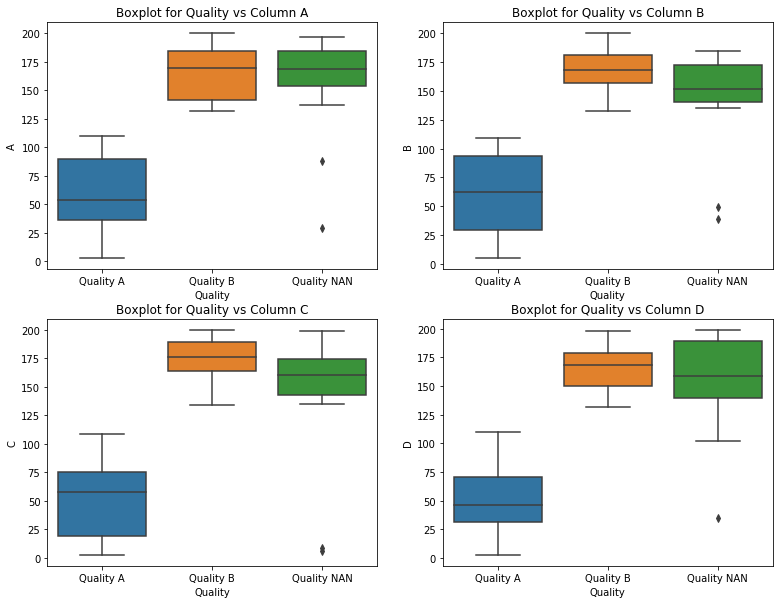

In [449]:
# Univariate boxplot of all the variables in wine_data dataframe
fig = plt.figure(figsize = (13,10))

i=1
for col in wine_data_X.columns:
    plt.subplot(2, 2, i)
    plt.title("Boxplot for Quality vs Column {}".format(col))
    sns.boxplot(data = wine_data , y=col, x='Quality')
    i=i+1
plt.show()

#### Observation: From above we can see that Quality B and Quality NAN (missing Quality) lies in the same region for other attributes except 2 items which are for Quality A.

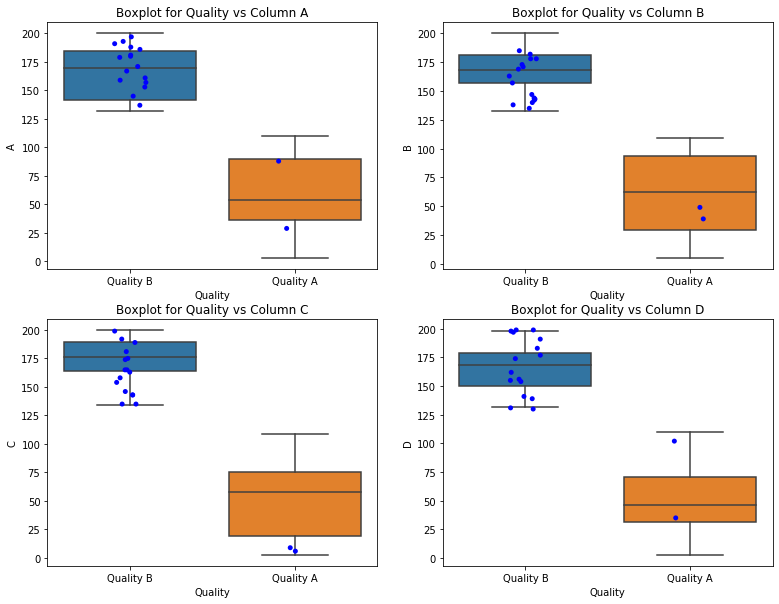

In [454]:
# Univariate boxplot of all the variables in wine_data dataframe
fig = plt.figure(figsize = (13,10))

i=1
for col in wine_data_X.columns:
    plt.subplot(2, 2, i)
    plt.title("Boxplot for Quality vs Column {}".format(col))
    # Stripplot for the predicted values where data was missing
    sns.stripplot(data = wine_data[wine_data['Quality'] == 'Quality NAN'] , y=col, x='Predicted_Quality',color='b')
    # BoxPlot for Quality A and B items
    sns.boxplot(data = wine_data , y=col, x='Quality',order=['Quality B', 'Quality A'])
    i=i+1
plt.show()

### Observation: Pretty Clear from Boxplot that Wine data model predicted and imputed missing Quality correctly using different attributes

====================================================================================================================

## Part 3:

• DOMAIN: Automobile

• CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

• DATA DESCRIPTION: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

    • All the features are numeric i.e. geometric features extracted from the silhouette

• PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using just the raw data.

### Install the necessary libraries

In [602]:
import numpy as np   
import pandas as pd    

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score

from scipy.stats import zscore
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.svm import SVC

### 3.1. - Data: Import, clean and pre-process the data

In [603]:
Vehicle = pd.read_csv('Part3 - vehicle.csv')

In [604]:
print('Vehicle Dataframe shape is : {}'.format(Vehicle.shape))

Vehicle Dataframe shape is : (846, 19)


In [605]:
Vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

#### Observation : Info Command

1) Total number of rows in Vehicle dataset are 846

2) Total number of columns in Vehicle dataset are 19

3) 14 columns are with Float64 datatype

4) 4 columns are with Int64 datatype

5) 1 column is with Object dataype

6) We can see that columns are having different non null rows which menas that there could be some missing values or the data type is not correct 

### Check for the Missing value

In [606]:
# Checking the presence of any null values
Vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [607]:
# Different method to check the NUll values where the data type is bool
Vehicle.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

#### Observations : Null Values

circularity                    - 5 Nulls

distance_circularity           - 4 Nulls

radius_ratio                   - 6 Nulls

pr.axis_aspect_ratio           - 2 Nulls

scatter_ratio                  - 1 Nulls

elongatedness                  - 1 Nulls

pr.axis_rectangularity         - 3 Nulls

scaled_variance                - 3 Nulls

scaled_variance.1              - 2 Nulls

scaled_radius_of_gyration      - 2 Nulls

scaled_radius_of_gyration.1    - 4 Nulls

skewness_about                 - 6 Nulls

skewness_about.1               - 1 Nulls

skewness_about.2               - 1 Nulls

#### We will replace the missing the values with either Mean or median after the Five point summary by checking the skewness for data

### Five point summary of numerical attributes and check unique values in 'object' columns

In [608]:
Vehicle.describe(include='all').T

count unique  top freq     mean      std  min  \
compactness                   846    NaN  NaN  NaN  93.6785  8.23447   73   
circularity                   841    NaN  NaN  NaN  44.8288  6.15217   33   
distance_circularity          842    NaN  NaN  NaN  82.1105  15.7783   40   
radius_ratio                  840    NaN  NaN  NaN  168.888  33.5202  104   
pr.axis_aspect_ratio          844    NaN  NaN  NaN  61.6789  7.89146   47   
max.length_aspect_ratio       846    NaN  NaN  NaN  8.56738  4.60122    2   
scatter_ratio                 845    NaN  NaN  NaN  168.902  33.2148  112   
elongatedness                 845    NaN  NaN  NaN  40.9337  7.81619   26   
pr.axis_rectangularity        843    NaN  NaN  NaN  20.5824  2.59293   17   
max.length_rectangularity     846    NaN  NaN  NaN  147.999  14.5157  118   
scaled_variance               843    NaN  NaN  NaN  188.631   31.411  130   
scaled_variance.1             844    NaN  NaN  NaN  439.494  176.667  184   
scaled_radius_of_gyration     844    NaN  NaN  NaN   174.71  32.5848  109   
scaled_radius_of_gyration.1   842    NaN  NaN  NaN  72.4477  7.48619   59   
skewness_about                840    NaN  NaN  NaN  6.36429  4.92065    0   
skewness_about.1              845    NaN  NaN  NaN  12.6024  8.93608    0   
skewness_about.2              845    NaN  NaN  NaN   188.92  6.15581  176   
hollows_ratio                 846    NaN  NaN  NaN  195.632   7.4388  181   
class                         846      3  car  429      NaN      NaN  NaN   

                                25%    50%  75%   max  
compactness                      87     93  100   119  
circularity                      40     44   49    59  
distance_circularity             70     80   98   112  
radius_ratio                    141    167  195   333  
pr.axis_aspect_ratio             57     61   65   138  
max.length_aspect_ratio           7      8   10    55  
scatter_ratio                   147    157  198   265  
elongatedness                    33     43   46    61  
pr.axis_rectangularity           19     20   23    29  
max.length_rectangularity       137    146  159   188  
scaled_variance                 167    179  217   320  
scaled_variance.1               318  363.5  587  1018  
scaled_radius_of_gyration       149  173.5  198   268  
scaled_radius_of_gyration.1      67   71.5   75   135  
skewness_about                    2      6    9    22  
skewness_about.1                  5     11   19    41  
skewness_about.2                184    188  193   206  
hollows_ratio                190.25    197  201   211  
class                           NaN    NaN  NaN   NaN

#### Observation : Information on the type of variable

compactness, max.length_aspect_ratio, max.length_rectangularity, hollows_ratio, class has no missing values.

Rest all features have missing values. 

All features are of numerical types except class which is a target variable and has three unique values.

In [609]:
# Check for Skewness of the columns if there is any
Vehicle.skew()

compactness                    0.381271
circularity                    0.261809
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
dtype: float64

**Positively skewed:** Most frequent values are low and tail is towards high values.

**Negatively skewed:** Most frequent values are high and tail is towards low values.

If **Mode< Median< Mean** then the distribution is positively skewed.

If **Mode> Median> Mean** then the distribution is negatively skewed.

### Observation - Descriptive statistics for the numerical variables

#### Descriptive statistics for the numerical variables

compactness: Range of Q1 to Q3 is between 87 to 100. Normally distributed.

circularity: Range of Q1 to Q3 is 40 to 49. Normally distributed.

distance_circularity: Range of Q1 to Q3 is 70 to 98. Mean is slightly greater than median, we can say that the column is slightly skewed towards right.

radius_ratio: Range of Q1 to Q3 is 141 to 195. Mean is slightly greater than median, we can say that the column is slightly skewed towards right.

pr.axis_aspect_ratio: Range of Q1 to Q3 is 57 to 65. Mean is slightly greater than median, we can say that the column is slightly skewed towards right.

max.length_aspect_ratio: Range of Q1 to Q3 is 7 to 10. Mean is slightly greater than median, we can say that the column is slightly skewed towards right.

scatter_ratio: Range of Q1 to Q3 is 147 to 198. Mean is greater than median, we can say that the column is skewed towards right.

elongatedness: Range of Q1 to Q3 is 33 to 46. Mean is less than median, we can say that the column is skewed towards left.

pr.axis_rectangularity: Range of Q1 to Q3 is 19 to 23. Mean is greater than median, we can say that the column is skewed towards right.

max.length_rectangularity: Range of Q1 to Q3 is 137 to 159. Mean is slightly greater than median, we can say that the column is skewed towards right.

scaled_variance: Range of Q1 to Q3 is 167 to 217. Mean is grater than median, we can say that the column is skewed towards right.

scaled_variance.1: Range of Q1 to Q3 is 318 to 587. Mean is greater than median, we can say that the column is skewed towards right.

scaled_radius_of_gyration: Range of Q1 to Q3 is 149 to 198. Mean is greater than median, we can say that the column is skewed towards right.

scaled_radius_of_gyration.1: Range of Q1 to Q3 is 67 to 75. Mean is greater than median, we can say that the column is skewed towards right.

skewness_about: Range of Q1 to Q3 is 2 to 6. Mean is greater than median, skewed towards right.

skewness_about.1: Range of Q1 to Q3 is 5 to 19. Mean is greater than median, skewed towards right.

skewness_about.2: Range of Q1 to Q3 is 184 to 193. Mean is slightly greater than median, almost normally distributed.

hollows_ratio: Range of Q1 to Q3 is 197 to 211. Mean is less than median, skewed towards left.

#### Descriptive statistics for the Object variable

class : 3 Unique values where is car is havign the maximum frequency of 429 

### Misssing Value treatement

#### We will now work on what to impute for the missing values. 

#### Mean imputation works better if the distribution is normally-distributed or has a Gaussian distribution, while median imputation is preferable for skewed distribution(be it right or left)

**Below should be done for missing values treatement for the columns which are having NULLS**

circularity - 5 Nulls - Normal Distribution - Mean should be used in pace of missing values

distance_circularity - 4 Nulls - Positively skeyed - Median should be used in pace of missing values

radius_ratio - 6 Nulls - Positively skeyed - Median should be used in pace of missing values

pr.axis_aspect_ratio - 2 Nulls - Positively skeyed - Median should be used in pace of missing values

scatter_ratio - 1 Null - Positively skeyed - Median should be used in pace of missing values

elongatedness - 1 Null - Positively skeyed - Median should be used in pace of missing values

pr.axis_rectangularity - 3 Nulls - Positively skeyed - Median should be used in pace of missing values

scaled_variance - 3 Nulls - Positively skeyed - Median should be used in pace of missing values

scaled_variance.1 - 2 Nulls - Positively skeyed - Median should be used in pace of missing values

scaled_radius_of_gyration - 2 Nulls - Positively skeyed - Median should be used in pace of missing values

scaled_radius_of_gyration.1 - 4 Nulls - Positively skeyed - Median should be used in pace of missing values

skewness_about - 6 Nulls - Positively skeyed - Median should be used in pace of missing values

skewness_about.1 - 1 Null - Positively skeyed - Median should be used in pace of missing values

skewness_about.2 - 1 Null - Normal Distribution - Mean should be used in pace of missing values

In [610]:
Vehicle1 = Vehicle.copy()

In [611]:
# Columns where MEAN is used to replace the missing values
Vehicle["circularity"] = Vehicle["circularity"].fillna(Vehicle["circularity"].mean())
Vehicle["skewness_about.2"] = Vehicle["skewness_about.2"].fillna(Vehicle["skewness_about.2"].mean())

# Columns where MEDIAN is used to replace the missing values
Vehicle["distance_circularity"] = Vehicle["distance_circularity"].fillna(Vehicle["distance_circularity"].median())
Vehicle["radius_ratio"] = Vehicle["radius_ratio"].fillna(Vehicle["radius_ratio"].median())
Vehicle["pr.axis_aspect_ratio"] = Vehicle["pr.axis_aspect_ratio"].fillna(Vehicle["pr.axis_aspect_ratio"].median())
Vehicle["scatter_ratio"] = Vehicle["scatter_ratio"].fillna(Vehicle["scatter_ratio"].median())
Vehicle["elongatedness"] = Vehicle["elongatedness"].fillna(Vehicle["elongatedness"].median())
Vehicle["pr.axis_rectangularity"] = Vehicle["pr.axis_rectangularity"].fillna(Vehicle["pr.axis_rectangularity"].median())
Vehicle["scaled_variance"] = Vehicle["scaled_variance"].fillna(Vehicle["scaled_variance"].median())
Vehicle["scaled_variance.1"] = Vehicle["scaled_variance.1"].fillna(Vehicle["scaled_variance.1"].median())
Vehicle["scaled_radius_of_gyration"] = Vehicle["scaled_radius_of_gyration"].fillna(Vehicle["scaled_radius_of_gyration"].median())
Vehicle["scaled_radius_of_gyration.1"] = Vehicle["scaled_radius_of_gyration.1"].fillna(Vehicle["scaled_radius_of_gyration.1"].median())
Vehicle["skewness_about"] = Vehicle["skewness_about"].fillna(Vehicle["skewness_about"].median())
Vehicle["skewness_about.1"] = Vehicle["skewness_about.1"].fillna(Vehicle["skewness_about.1"].median())

In [612]:
Vehicle2 = Vehicle.copy()
print('Descriptive Stats before imputation for columns with missing values: \n', '--'*33)
display(Vehicle1.describe(include='all').T)
print()
print('Descriptive Stats after imputation for columns with missing values: \n', '--'*33)
display(Vehicle2.describe(include='all').T)
del Vehicle1, Vehicle2

Descriptive Stats before imputation for columns with missing values: 
 ------------------------------------------------------------------


count unique  top freq     mean      std  min  \
compactness                   846    NaN  NaN  NaN  93.6785  8.23447   73   
circularity                   841    NaN  NaN  NaN  44.8288  6.15217   33   
distance_circularity          842    NaN  NaN  NaN  82.1105  15.7783   40   
radius_ratio                  840    NaN  NaN  NaN  168.888  33.5202  104   
pr.axis_aspect_ratio          844    NaN  NaN  NaN  61.6789  7.89146   47   
max.length_aspect_ratio       846    NaN  NaN  NaN  8.56738  4.60122    2   
scatter_ratio                 845    NaN  NaN  NaN  168.902  33.2148  112   
elongatedness                 845    NaN  NaN  NaN  40.9337  7.81619   26   
pr.axis_rectangularity        843    NaN  NaN  NaN  20.5824  2.59293   17   
max.length_rectangularity     846    NaN  NaN  NaN  147.999  14.5157  118   
scaled_variance               843    NaN  NaN  NaN  188.631   31.411  130   
scaled_variance.1             844    NaN  NaN  NaN  439.494  176.667  184   
scaled_radius_of_gyration     844    NaN  NaN  NaN   174.71  32.5848  109   
scaled_radius_of_gyration.1   842    NaN  NaN  NaN  72.4477  7.48619   59   
skewness_about                840    NaN  NaN  NaN  6.36429  4.92065    0   
skewness_about.1              845    NaN  NaN  NaN  12.6024  8.93608    0   
skewness_about.2              845    NaN  NaN  NaN   188.92  6.15581  176   
hollows_ratio                 846    NaN  NaN  NaN  195.632   7.4388  181   
class                         846      3  car  429      NaN      NaN  NaN   

                                25%    50%  75%   max  
compactness                      87     93  100   119  
circularity                      40     44   49    59  
distance_circularity             70     80   98   112  
radius_ratio                    141    167  195   333  
pr.axis_aspect_ratio             57     61   65   138  
max.length_aspect_ratio           7      8   10    55  
scatter_ratio                   147    157  198   265  
elongatedness                    33     43   46    61  
pr.axis_rectangularity           19     20   23    29  
max.length_rectangularity       137    146  159   188  
scaled_variance                 167    179  217   320  
scaled_variance.1               318  363.5  587  1018  
scaled_radius_of_gyration       149  173.5  198   268  
scaled_radius_of_gyration.1      67   71.5   75   135  
skewness_about                    2      6    9    22  
skewness_about.1                  5     11   19    41  
skewness_about.2                184    188  193   206  
hollows_ratio                190.25    197  201   211  
class                           NaN    NaN  NaN   NaN


Descriptive Stats after imputation for columns with missing values: 
 ------------------------------------------------------------------


count unique  top freq     mean      std  min  \
compactness                   846    NaN  NaN  NaN  93.6785  8.23447   73   
circularity                   846    NaN  NaN  NaN  44.8288  6.13394   33   
distance_circularity          846    NaN  NaN  NaN  82.1005  15.7416   40   
radius_ratio                  846    NaN  NaN  NaN  168.875  33.4014  104   
pr.axis_aspect_ratio          846    NaN  NaN  NaN  61.6773  7.88219   47   
max.length_aspect_ratio       846    NaN  NaN  NaN  8.56738  4.60122    2   
scatter_ratio                 846    NaN  NaN  NaN  168.888  33.1977  112   
elongatedness                 846    NaN  NaN  NaN  40.9362  7.81188   26   
pr.axis_rectangularity        846    NaN  NaN  NaN  20.5804  2.58856   17   
max.length_rectangularity     846    NaN  NaN  NaN  147.999  14.5157  118   
scaled_variance               846    NaN  NaN  NaN  188.597  31.3604  130   
scaled_variance.1             846    NaN  NaN  NaN  439.314  176.496  184   
scaled_radius_of_gyration     846    NaN  NaN  NaN  174.707  32.5463  109   
scaled_radius_of_gyration.1   846    NaN  NaN  NaN  72.4433  7.46873   59   
skewness_about                846    NaN  NaN  NaN   6.3617  4.90324    0   
skewness_about.1              846    NaN  NaN  NaN  12.6005  8.93096    0   
skewness_about.2              846    NaN  NaN  NaN   188.92  6.15217  176   
hollows_ratio                 846    NaN  NaN  NaN  195.632   7.4388  181   
class                         846      3  car  429      NaN      NaN  NaN   

                                25%    50%     75%   max  
compactness                      87     93     100   119  
circularity                      40     44      49    59  
distance_circularity             70     80      98   112  
radius_ratio                    141    167     195   333  
pr.axis_aspect_ratio             57     61      65   138  
max.length_aspect_ratio           7      8      10    55  
scatter_ratio                   147    157     198   265  
elongatedness                    33     43      46    61  
pr.axis_rectangularity           19     20      23    29  
max.length_rectangularity       137    146     159   188  
scaled_variance                 167    179     217   320  
scaled_variance.1            318.25  363.5  586.75  1018  
scaled_radius_of_gyration       149  173.5     198   268  
scaled_radius_of_gyration.1      67   71.5      75   135  
skewness_about                    2      6       9    22  
skewness_about.1                  5     11      19    41  
skewness_about.2                184    188     193   206  
hollows_ratio                190.25    197     201   211  
class                           NaN    NaN     NaN   NaN

#### Observation - After imputation

A observation after imputating the missing values: Medians and Means remain unchanged basis on the imputation. Type of skewness remain unchanged.

In [613]:
# Checking the presence of any null values after missing value treatement
Vehicle.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

#### Observation : Now NULLS are not present in any of the columns

In [615]:
Vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [616]:
Vehicle["class"].unique()

array(['van', 'car', 'bus'], dtype=object)

#### Observation : Three Unique values are present in the class column

Values are van, car, bus

### Below is the processing done for pre-processing of data 

#### Changing the Object columns i.e. class into the continous variable by replacing the car with 1, bus with 2 and van with 3 value

In [617]:
for col in Vehicle.columns:
    if Vehicle[col].dtype == 'int64' or Vehicle[col].dtype == 'float64':
        continue
    else:
        print("Column name : {}".format(col))
        print(Vehicle[col].value_counts())
        print()

Column name : class
car    429
bus    218
van    199
Name: class, dtype: int64



In [618]:
# Create a structure for replace for categorical variables

replaceStruct = {"class":           {"car": 1, "bus": 2, "van": 3}}
Vehicle = Vehicle.replace(replaceStruct)
Vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      3  
1             189.0            199      3  
2             188.0            196      1  
3             199.0            207      3  
4             180.0            183      2

#### We have now changed the Categorical variables into Continous variables. 

#### Observation - Distribution of class variable

car represents about 50.7% of the total values in class variable, bus about 25.8% and van about 23.5%.

### Working with Outliers: Correcting/Removing

In [619]:
Q1 = Vehicle.quantile(0.25)
Q3 = Vehicle.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [620]:
Vehicle_out_fixed = Vehicle.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(Vehicle_out_fixed < Q1 - 1.5 * IQR)[0], np.where(Vehicle_out_fixed < Q1 - 1.5 * IQR)[1]): 
    
    Lower_whisker  = Q1 - 1.5 * IQR
    Vehicle_out_fixed.iloc[i,j] = Lower_whisker[j]
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(Vehicle_out_fixed > Q3 + 1.5 * IQR)[0], np.where(Vehicle_out_fixed > Q3 + 1.5 * IQR)[1]):
    
    Upper_whisker  = Q3 + 1.5 * IQR
    Vehicle_out_fixed.iloc[i,j] = Upper_whisker[j]
    

In [621]:
Vehicle_out_fixed.shape, Vehicle.shape

((846, 19), (846, 19))

In [622]:
print('Descriptive Stats before Outlier removal: \n', '--'*33)
display(Vehicle.describe(include='all').T)
print()
print('Descriptive Stats after Outlier removal: \n', '--'*33)
display(Vehicle_out_fixed.describe(include='all').T)

Descriptive Stats before Outlier removal: 
 ------------------------------------------------------------------


count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.919527    6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    1.728132    0.818044    1.0    1.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    2.00     3.0


Descriptive Stats after Outlier removal: 
 ------------------------------------------------------------------


count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.717494   32.779404  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.306147    5.819342   47.0   57.00   
max.length_aspect_ratio      846.0    8.203901    2.206520    2.5    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.563830   31.236113  130.0  167.00   
scaled_variance.1            846.0  439.270686  176.356820  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.218676    6.471197   59.0   67.00   
skewness_about               846.0    6.339243    4.838044    0.0    2.00   
skewness_about.1             846.0   12.599291    8.927264    0.0    5.00   
skewness_about.2             846.0  188.919527    6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    1.728132    0.818044    1.0    1.00   

                               50%     75%    max  
compactness                   93.0  100.00  119.0  
circularity                   44.0   49.00   59.0  
distance_circularity          80.0   98.00  112.0  
radius_ratio                 167.0  195.00  276.0  
pr.axis_aspect_ratio          61.0   65.00   77.0  
max.length_aspect_ratio        8.0   10.00   14.5  
scatter_ratio                157.0  198.00  265.0  
elongatedness                 43.0   46.00   61.0  
pr.axis_rectangularity        20.0   23.00   29.0  
max.length_rectangularity    146.0  159.00  188.0  
scaled_variance              179.0  217.00  292.0  
scaled_variance.1            363.5  586.75  989.5  
scaled_radius_of_gyration    173.5  198.00  268.0  
scaled_radius_of_gyration.1   71.5   75.00   87.0  
skewness_about                 6.0    9.00   19.5  
skewness_about.1              11.0   19.00   40.0  
skewness_about.2             188.0  193.00  206.0  
hollows_ratio                197.0  201.00  211.0  
class                          1.0    2.00    3.0

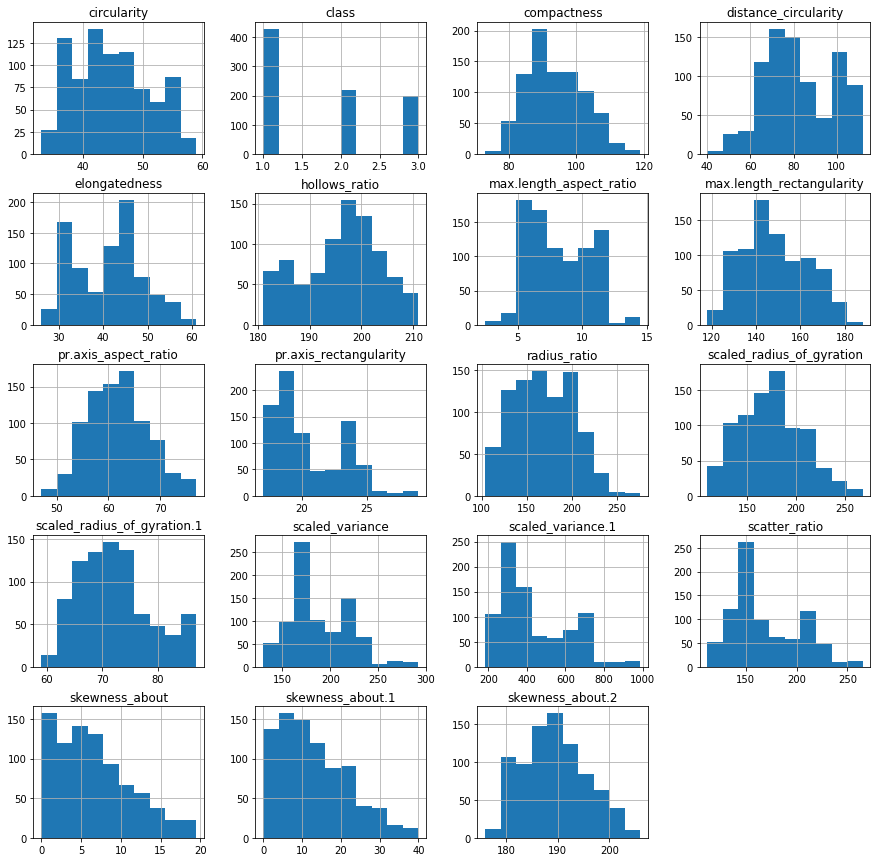

In [623]:
Vehicle_out_fixed.hist(figsize=(15,15));

#### Observation - Comments after checking outliers and distribution

1) Instead of removing the outliers, which might have resulted in loss of data, we have replaced the outliers (using IQR method) with Upper fence and Lower fence values. Total number of rows are 846 as per the original dataset

2) Again, there's least effect on Means and Median.

3) With the help of Histogram, We can see that outliers are removed

### 3.2. - EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.

#### For example: Use your best analytical approach to build this report. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns.

In [624]:
Vehicle_out_fixed.describe(include='all').T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.717494   32.779404  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.306147    5.819342   47.0   57.00   
max.length_aspect_ratio      846.0    8.203901    2.206520    2.5    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.563830   31.236113  130.0  167.00   
scaled_variance.1            846.0  439.270686  176.356820  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.218676    6.471197   59.0   67.00   
skewness_about               846.0    6.339243    4.838044    0.0    2.00   
skewness_about.1             846.0   12.599291    8.927264    0.0    5.00   
skewness_about.2             846.0  188.919527    6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    1.728132    0.818044    1.0    1.00   

                               50%     75%    max  
compactness                   93.0  100.00  119.0  
circularity                   44.0   49.00   59.0  
distance_circularity          80.0   98.00  112.0  
radius_ratio                 167.0  195.00  276.0  
pr.axis_aspect_ratio          61.0   65.00   77.0  
max.length_aspect_ratio        8.0   10.00   14.5  
scatter_ratio                157.0  198.00  265.0  
elongatedness                 43.0   46.00   61.0  
pr.axis_rectangularity        20.0   23.00   29.0  
max.length_rectangularity    146.0  159.00  188.0  
scaled_variance              179.0  217.00  292.0  
scaled_variance.1            363.5  586.75  989.5  
scaled_radius_of_gyration    173.5  198.00  268.0  
scaled_radius_of_gyration.1   71.5   75.00   87.0  
skewness_about                 6.0    9.00   19.5  
skewness_about.1              11.0   19.00   40.0  
skewness_about.2             188.0  193.00  206.0  
hollows_ratio                197.0  201.00  211.0  
class                          1.0    2.00    3.0

In [625]:
### Details about the 5 point summary is already mentioned earlier for all the columns

In [626]:
Vehicle_out_fixed.skew()

compactness                    0.381271
circularity                    0.262584
distance_circularity           0.108718
radius_ratio                   0.202606
pr.axis_aspect_ratio           0.258079
max.length_aspect_ratio        0.281942
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.621364
scaled_variance.1              0.840512
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    0.557585
skewness_about                 0.707590
skewness_about.1               0.686375
skewness_about.2               0.249468
hollows_ratio                 -0.226341
class                          0.537826
dtype: float64

**Positively skewed:** Most frequent values are low and tail is towards high values.

**Negatively skewed:** Most frequent values are high and tail is towards low values.

If **Mode< Median< Mean** then the distribution is positively skewed.

If **Mode> Median> Mean** then the distribution is negatively skewed.

#### Check the skewness for Vehicle Dataframe

compactness - Normally distributed.

circularity - Normally distributed.

distance_circularity - Right skeyed

radius_ratio - Right skeyed

pr.axis_aspect_ratio - Right skeyed

max.length_aspect_ratio - Right skeyed

scatter_ratio - Right skeyed

elongatedness - Right skeyed

pr.axis_rectangularity - Right skeyed

max.length_rectangularity - Right skeyed

scaled_variance - Right skeyed

scaled_variance.1 - Right skeyed

scaled_radius_of_gyration - Right skeyed

scaled_radius_of_gyration.1 - Right skeyed

skewness_about - Right skeyed

skewness_about.1 - Right skeyed

skewness_about.2 - Normally distributed.

hollows_ratio - Left Skeyed


In [627]:
Vehicle_out_fixed.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789928   
circularity                     0.685421     1.000000              0.792865   
distance_circularity            0.789928     0.792865              1.000000   
radius_ratio                    0.704177     0.630610              0.780846   
pr.axis_aspect_ratio            0.166905     0.196987              0.228494   
max.length_aspect_ratio         0.437331     0.523564              0.611158   
scatter_ratio                   0.812620     0.848891              0.905076   
elongatedness                  -0.788750    -0.822164             -0.911307   
pr.axis_rectangularity          0.813694     0.844440              0.893025   
max.length_rectangularity       0.676143     0.961943              0.774527   
scaled_variance                 0.765062     0.799880              0.864753   
scaled_variance.1               0.814141     0.837113              0.886353   
scaled_radius_of_gyration       0.585243     0.926907              0.705771   
scaled_radius_of_gyration.1    -0.263751     0.057743             -0.247726   
skewness_about                  0.233761     0.144867              0.113352   
skewness_about.1                0.157026    -0.011795              0.265497   
skewness_about.2                0.298526    -0.105645              0.145987   
hollows_ratio                   0.365552     0.045318              0.332732   
class                          -0.297774    -0.251225             -0.428523   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.704177              0.166905   
circularity                      0.630610              0.196987   
distance_circularity             0.780846              0.228494   
radius_ratio                     1.000000              0.680872   
pr.axis_aspect_ratio             0.680872              1.000000   
max.length_aspect_ratio          0.497668              0.230382   
scatter_ratio                    0.750288              0.173201   
elongatedness                   -0.805868             -0.275304   
pr.axis_rectangularity           0.724116              0.142643   
max.length_rectangularity        0.576439              0.149545   
scaled_variance                  0.794518              0.239357   
scaled_variance.1                0.734821              0.157296   
scaled_radius_of_gyration        0.544864              0.148468   
scaled_radius_of_gyration.1     -0.328059             -0.246665   
skewness_about                   0.049200             -0.057076   
skewness_about.1                 0.177319             -0.027409   
skewness_about.2                 0.391662              0.368377   
hollows_ratio                    0.480752              0.389627   
class                           -0.417190             -0.028237   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.437331       0.812620   
circularity                                 0.523564       0.848891   
distance_circularity                        0.611158       0.905076   
radius_ratio                                0.497668       0.750288   
pr.axis_aspect_ratio                        0.230382       0.173201   
max.length_aspect_ratio                     1.000000       0.439612   
scatter_ratio                               0.439612       1.000000   
elongatedness                              -0.456838      -0.971601   
pr.axis_rectangularity                      0.434980       0.989751   
max.length_rectangularity                   0.608645       0.809083   
scaled_variance                             0.415483       0.952882   
scaled_variance.1                           0.398807       0.993085   
scaled_radius_of_gyration                   0.374258       0.799875   
scaled_radius_of_gyration.1                -0.257113      -0.012569   
skewness_about                            

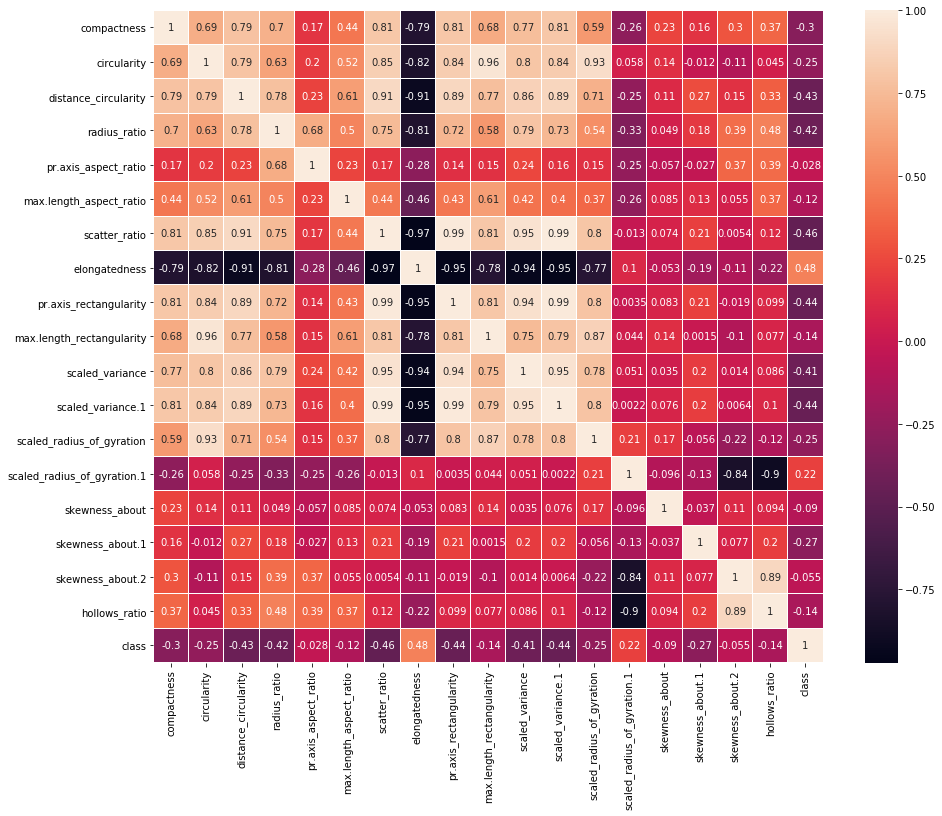

In [628]:
fig = plt.figure(figsize = (15,12))
sns.heatmap(Vehicle_out_fixed.corr(),annot=True,linewidths=.05);

In [629]:
# Fucntion for displaying the Correlation matrix for all variables basis on the Lower and upper threshold
def correlation_matrix(df, Lower_threshold = 0.8, Upper_threshold = 1.0):
    corr = df.corr()
    sort = corr.abs().unstack().drop_duplicates()
    sort = sort.sort_values(kind = "quicksort", ascending = False)
    display(sort[(sort >= Lower_threshold) & (sort < Upper_threshold)])

print("Correlation between the pairs whose correlation is more than .90")
correlation_matrix(Vehicle_out_fixed, Lower_threshold = 0.9, Upper_threshold =1.0)
print("Correlation between the pairs whose correlation is beween .80 and .90")
correlation_matrix(Vehicle_out_fixed, Lower_threshold = 0.8, Upper_threshold =.9)
print("Correlation between the pairs whose correlation is beween .70 and .80")
correlation_matrix(Vehicle_out_fixed, Lower_threshold = 0.7, Upper_threshold =.8)

Correlation between the pairs whose correlation is more than .90


scatter_ratio                scaled_variance.1            0.993085
                             pr.axis_rectangularity       0.989751
pr.axis_rectangularity       scaled_variance.1            0.988209
scatter_ratio                elongatedness                0.971601
circularity                  max.length_rectangularity    0.961943
elongatedness                scaled_variance.1            0.954096
scatter_ratio                scaled_variance              0.952882
scaled_variance              scaled_variance.1            0.949952
elongatedness                pr.axis_rectangularity       0.948996
                             scaled_variance              0.940389
pr.axis_rectangularity       scaled_variance              0.938593
circularity                  scaled_radius_of_gyration    0.926907
distance_circularity         elongatedness                0.911307
                             scatter_ratio                0.905076
scaled_radius_of_gyration.1  hollows_ratio                0.90

Correlation between the pairs whose correlation is beween .80 and .90


distance_circularity         pr.axis_rectangularity       0.893025
skewness_about.2             hollows_ratio                0.892840
distance_circularity         scaled_variance.1            0.886353
max.length_rectangularity    scaled_radius_of_gyration    0.866450
distance_circularity         scaled_variance              0.864753
circularity                  scatter_ratio                0.848891
                             pr.axis_rectangularity       0.844440
                             scaled_variance.1            0.837113
scaled_radius_of_gyration.1  skewness_about.2             0.836936
circularity                  elongatedness                0.822164
compactness                  scaled_variance.1            0.814141
                             pr.axis_rectangularity       0.813694
                             scatter_ratio                0.812620
pr.axis_rectangularity       max.length_rectangularity    0.810934
scatter_ratio                max.length_rectangularity    0.80

Correlation between the pairs whose correlation is beween .70 and .80


circularity                scaled_variance              0.799880
scatter_ratio              scaled_radius_of_gyration    0.799875
pr.axis_rectangularity     scaled_radius_of_gyration    0.796690
scaled_variance.1          scaled_radius_of_gyration    0.795030
max.length_rectangularity  scaled_variance.1            0.794810
radius_ratio               scaled_variance              0.794518
circularity                distance_circularity         0.792865
compactness                distance_circularity         0.789928
                           elongatedness                0.788750
scaled_variance            scaled_radius_of_gyration    0.781616
distance_circularity       radius_ratio                 0.780846
elongatedness              max.length_rectangularity    0.775854
distance_circularity       max.length_rectangularity    0.774527
elongatedness              scaled_radius_of_gyration    0.766314
compactness                scaled_variance              0.765062
radius_ratio             

In [630]:
# Absolute correlation of independent variables with the target variable
absCorrwithDep = []
allVars = Vehicle_out_fixed.drop('class', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(Vehicle_out_fixed['class'].corr(Vehicle_out_fixed[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

Variable Correlation
7                 elongatedness    0.483027
6                 scatter_ratio    0.463566
8        pr.axis_rectangularity    0.444586
11            scaled_variance.1    0.443659
2          distance_circularity    0.428523
3                  radius_ratio     0.41719
10              scaled_variance    0.410956
0                   compactness    0.297774
15             skewness_about.1     0.27146
1                   circularity    0.251225
12    scaled_radius_of_gyration    0.247735
13  scaled_radius_of_gyration.1    0.218366
17                hollows_ratio    0.142852
9     max.length_rectangularity    0.140152
5       max.length_aspect_ratio    0.117425
14               skewness_about   0.0899965
16             skewness_about.2   0.0548899
4          pr.axis_aspect_ratio    0.028237

#### Observation 11:

1) scatter_ratio and scaled_variance.1, scatter_ratio and pr.axis_rectangularity, pr.axis_rectangularity and scaled_variance.1, scatter_ratio and elongatedness, circularityan and max.length_rectangularity, elongatedness and scaled_variance.1, scatter_ratio and scaled_variance, scaled_variance and scaled_variance.1, elongatedness and pr.axis_rectangularity, elongatedness and scaled_variance, pr.axis_rectangularity and scaled_variance, circularity and scaled_radius_of_gyration, distance_circularity and elongatedness, distance_circularity and scatter_ratio, scaled_radius_of_gyration.1 and hollows_ratio are correlated with each other with a correlation coeff greater than 0.9.

2) elongatedness, scatter_ratio, pr.axis_rectangularity, scaled_variance.1, distance_circularity and radius_ratio are some columns which have relatively strong correlation with the class variable

#### Check for the multicollinearity of the columns.The Variance Inflation Factor (VIF) measures the severity of multicollinearity. It is a statistical concept that indicates the increase in the variance of a regression coefficient as a result of collinearity.

In [631]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Vehicle_out_fixed.values, i) for i in range(Vehicle_out_fixed.shape[1])]
vif["features"] = Vehicle_out_fixed.columns

In [632]:
vif.round(1)

VIF Factor                     features
0        727.3                  compactness
1       1821.5                  circularity
2        343.0         distance_circularity
3        662.6                 radius_ratio
4        763.1         pr.axis_aspect_ratio
5         64.1      max.length_aspect_ratio
6       5455.9                scatter_ratio
7        663.4                elongatedness
8       3969.9       pr.axis_rectangularity
9       2685.8    max.length_rectangularity
10      1107.9              scaled_variance
11       703.9            scaled_variance.1
12       328.8    scaled_radius_of_gyration
13       692.2  scaled_radius_of_gyration.1
14         3.5               skewness_about
15         4.6             skewness_about.1
16     11982.1             skewness_about.2
17     12152.6                hollows_ratio
18        14.4                        class

#### Observation - We can see that multicollinearity exist for the columns and some of the independent columns can be dropped because of high VIF factor.

hollows_ratio, skewness_about.2, scatter_ratio, pr.axis_rectangularity, max.length_rectangularity

In [633]:
Vehicle_out_fixed.drop(['hollows_ratio', 'skewness_about.2', 'scatter_ratio','pr.axis_rectangularity',
                 'max.length_rectangularity'], axis = 1, inplace = True)

In [634]:
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(Vehicle_out_fixed.values, i) for i in range(Vehicle_out_fixed.shape[1])]
vif2["features"] = Vehicle_out_fixed.columns

In [635]:
vif2

VIF Factor                     features
0   517.610450                  compactness
1   680.784598                  circularity
2   274.032282         distance_circularity
3   604.006076                 radius_ratio
4   598.545221         pr.axis_aspect_ratio
5    34.560110      max.length_aspect_ratio
6   268.556902                elongatedness
7   841.180250              scaled_variance
8   183.832068            scaled_variance.1
9   310.278637    scaled_radius_of_gyration
10  388.848170  scaled_radius_of_gyration.1
11    3.363626               skewness_about
12    4.082854             skewness_about.1
13    9.035639                        class

#### From above we can see that by dropping the columns VIF is also decreased with class variable too

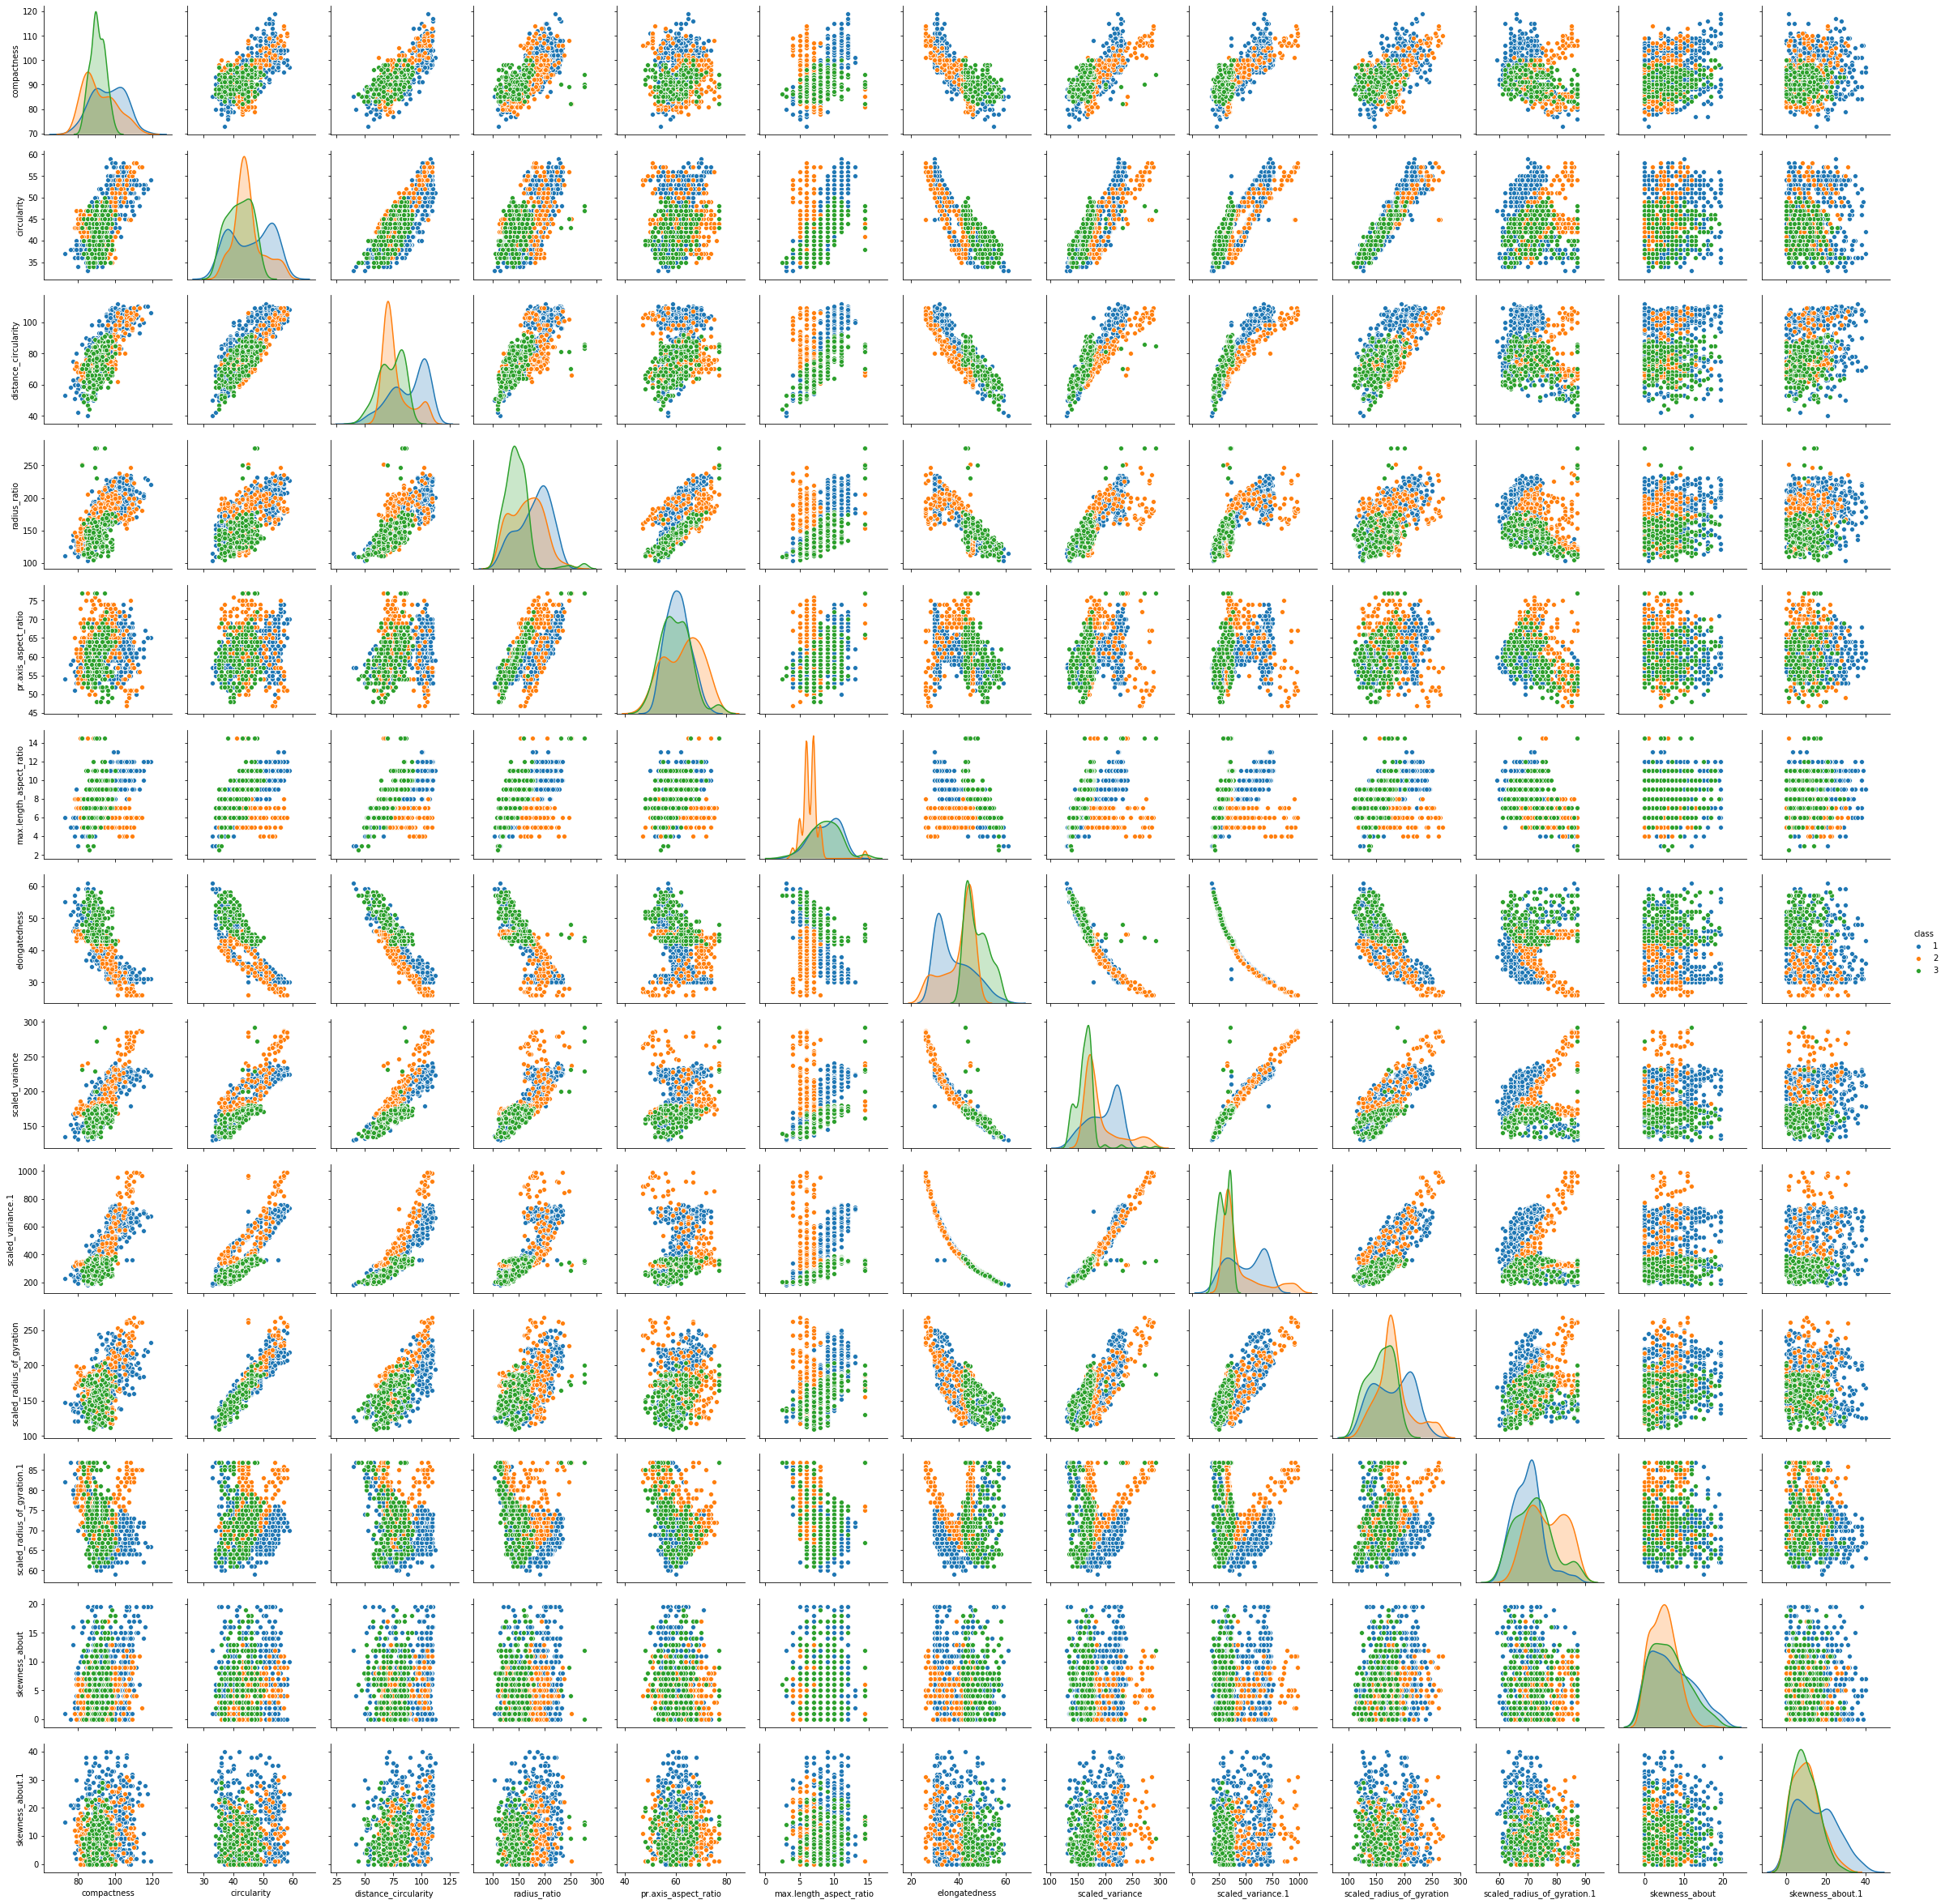

In [636]:
# pairplot of the Vehicle_out_fixed after dropping the columns
sns.pairplot(Vehicle_out_fixed, hue='class');

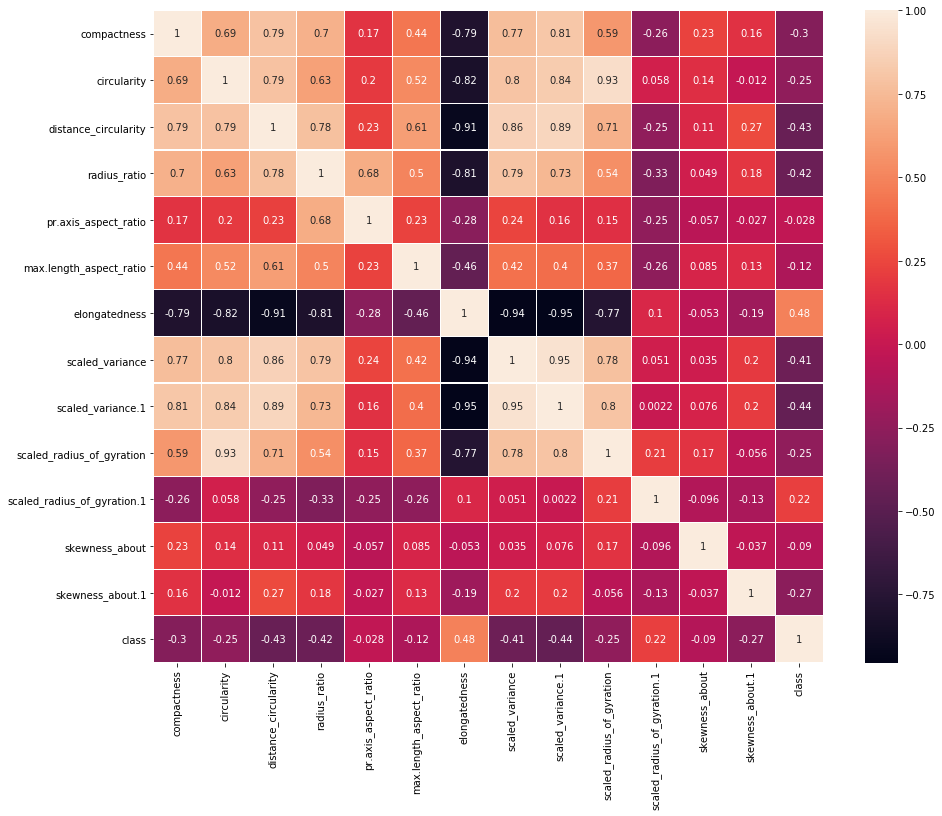

In [637]:
fig = plt.figure(figsize = (15,12))
sns.heatmap(Vehicle_out_fixed.corr(),annot=True,linewidths=.05);

#### Univariate Distribution plot of Vehicle dataset

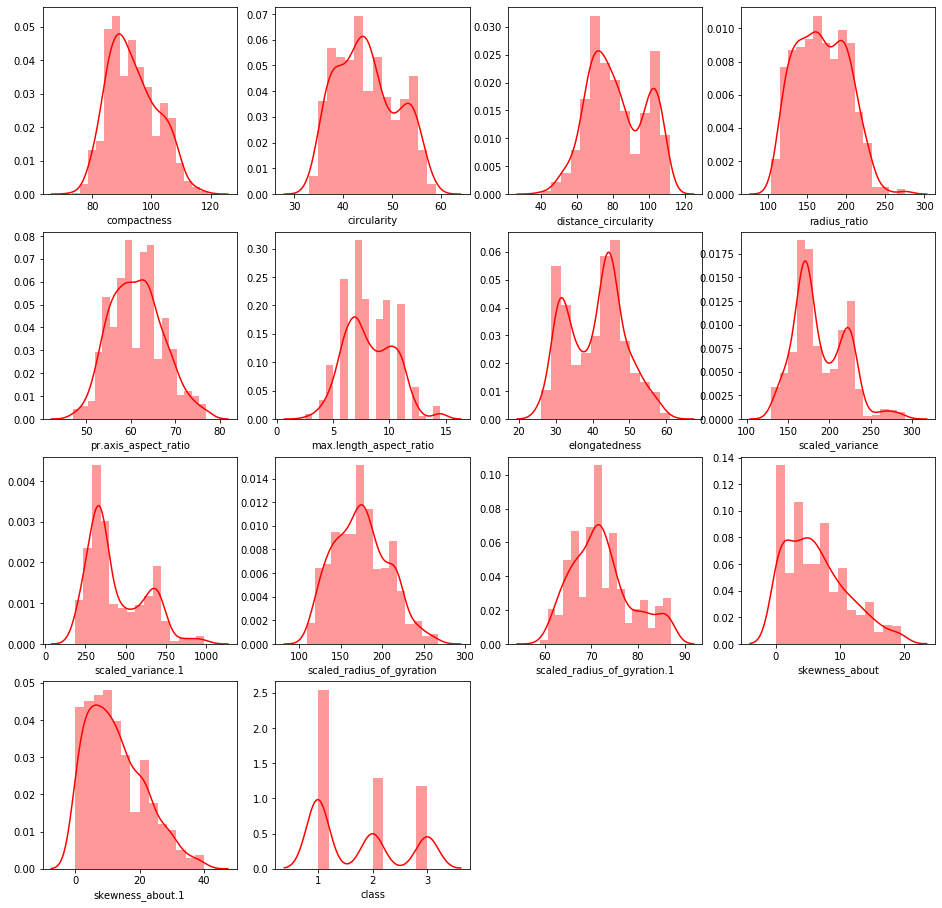

In [638]:
# Univariate boxplot of all the variables in Vehicle_out_fixed dataframe
fig = plt.figure(figsize = (16,20))

i=1
for col in Vehicle_out_fixed.columns:
    plt.subplot(5, 4, i)
    sns.distplot(Vehicle_out_fixed[col],color = 'r')
    i=i+1

plt.show()

#### Observation - From the univariate plots we can see that most of the columns are normally distributed except skewness_about and skewness_about.1. Both skewness_about and skewness_about.1 are right skeyed.

#### Class is categorical column  with 3 class i.e. 1 (Car), 2 (Bus), 3 (Van).

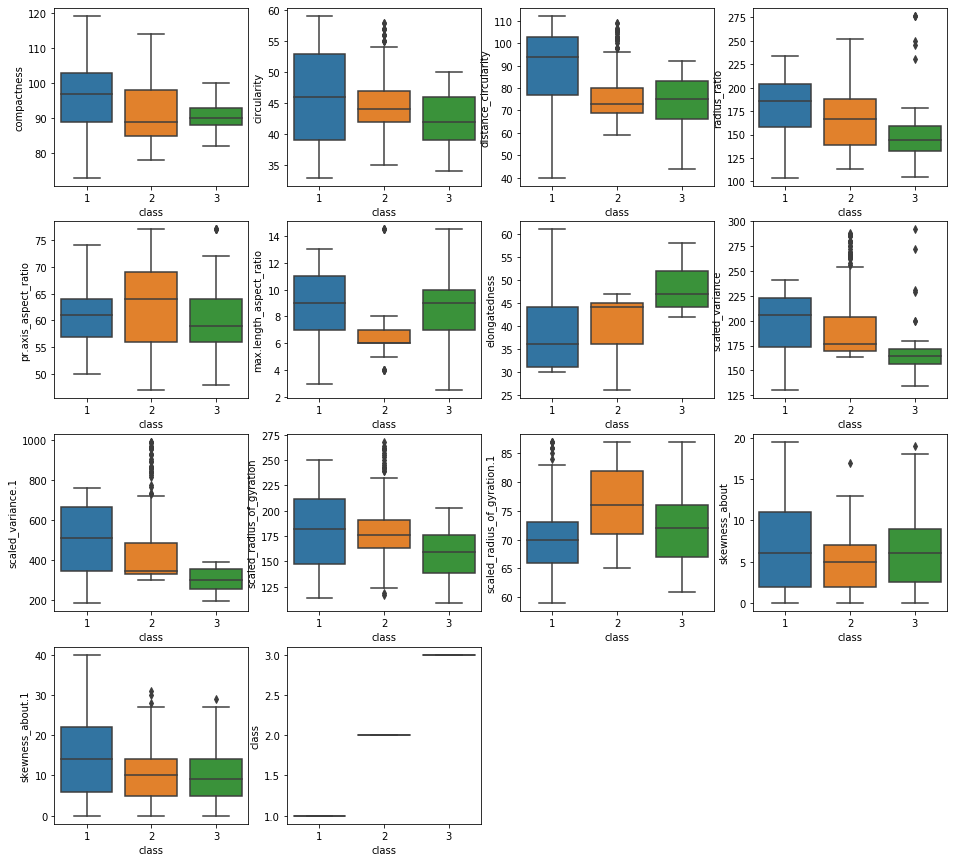

In [639]:
# Univariate boxplot of all the variables in Vehicle_out_fixed dataframe
fig = plt.figure(figsize = (16,15))

i=1
for col in Vehicle_out_fixed.columns:
    plt.subplot(4, 4, i)
    sns.boxplot(data = Vehicle_out_fixed , y=col, x='class')
    i=i+1

plt.show()

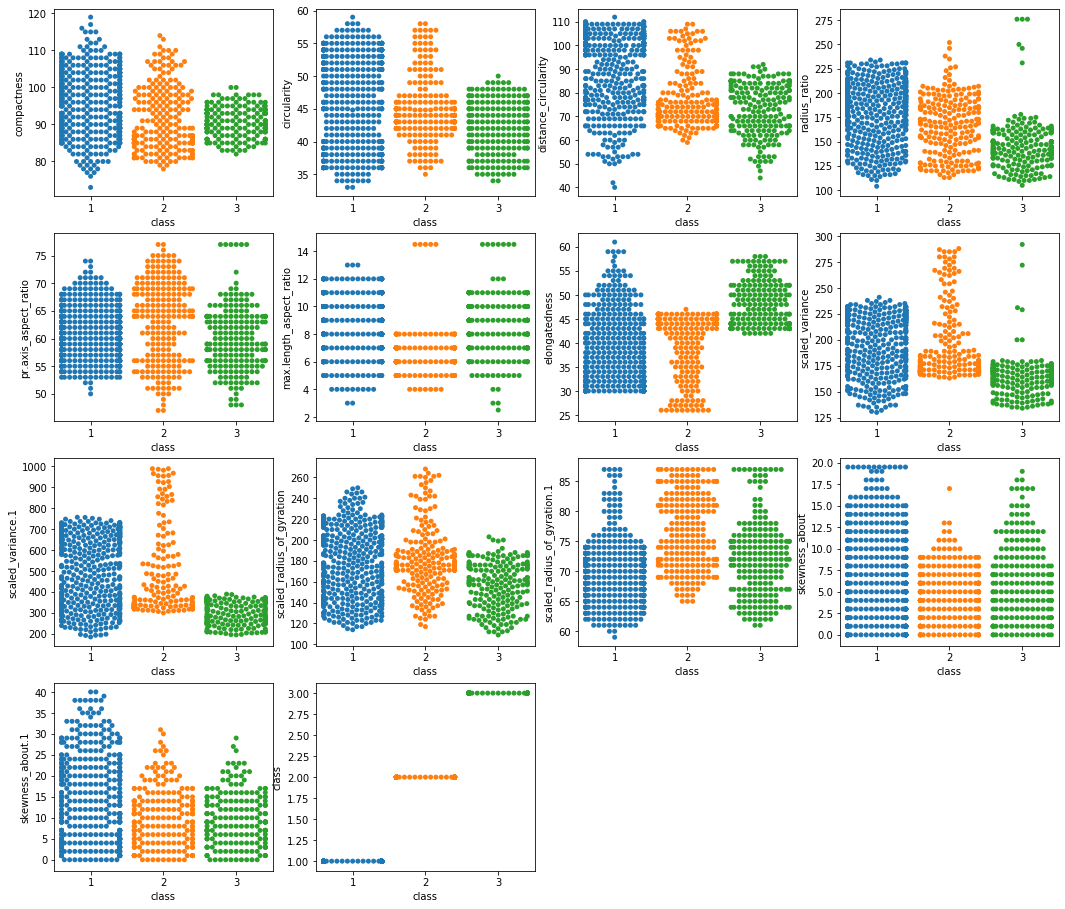

In [640]:
# Univariate swarmplot of all the variables in Vehicle_out_fixed dataframe
fig = plt.figure(figsize = (18,20))

i=1
for col in Vehicle_out_fixed.columns:
    plt.subplot(5, 4, i)
    sns.swarmplot(data=Vehicle_out_fixed, y=col,x='class')
    i=i+1

plt.show()

#### Observation from boxplot and swarmplot: 

1) compactness of Class 3 is low in comparison to Class 1 and Class 2

2) max.length_aspect_ratio is low for Class 2 items 

3) scaled_variance and scaled_variance.1 is low for class 3 when compared with class 2 and 1

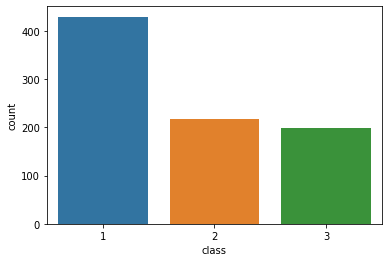

In [641]:
sns.countplot(Vehicle_out_fixed['class'])

#### Observation : We can see that Class 1 items count is almost the sum of Class 2 and Class 3

### Bivariate Analysis

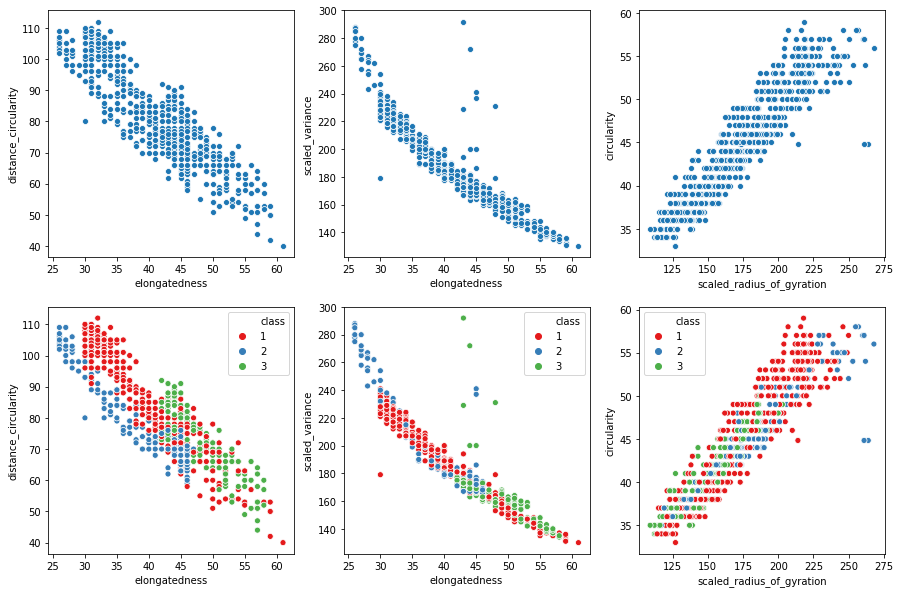

In [643]:
# Plotting the Scatter plot

fig = plt.figure(figsize = (15,10))
plt.subplot(2, 3, 1)
sns.scatterplot(Vehicle_out_fixed["elongatedness"],Vehicle_out_fixed["distance_circularity"])
plt.subplot(2, 3, 2)
sns.scatterplot(Vehicle_out_fixed["elongatedness"],Vehicle_out_fixed["scaled_variance"])
plt.subplot(2, 3, 3)
sns.scatterplot(Vehicle_out_fixed["scaled_radius_of_gyration"],Vehicle_out_fixed["circularity"])
plt.subplot(2, 3, 4)
sns.scatterplot(Vehicle_out_fixed["elongatedness"],Vehicle_out_fixed["distance_circularity"],hue=Vehicle_out_fixed["class"],palette='Set1')
plt.subplot(2, 3, 5)
sns.scatterplot(Vehicle_out_fixed["elongatedness"],Vehicle_out_fixed["scaled_variance"],hue=Vehicle_out_fixed["class"],palette='Set1')
plt.subplot(2, 3, 6)
sns.scatterplot(Vehicle_out_fixed["scaled_radius_of_gyration"],Vehicle_out_fixed["circularity"],hue=Vehicle_out_fixed["class"],palette='Set1')

plt.show()

#### Observation from Scatterplot

1) scaled_variance and elongatedness are negatively correlated. For Class 2 items, when scaled_variance is high, elongatedness is less. For few Class 3 items, when elongatedness is between 42 to 47, scaled_variance is high.

2) circularity and scaled_radius_of_gyration are directly proportional and positively correlated.

In [645]:
# Vehicle_out_fixed = Vehicle_out_fixed_temp

### 3.3. - Classifier: Design and train a best fit SVM classier using all the data attributes

#### Segregate predictors vs target attributes

In [646]:
Vehicle_out_fixed_temp = Vehicle_out_fixed

In [647]:
# Predictors
# Dropping the class column from predictors
X = Vehicle_out_fixed.drop('class',axis=1)
# Target
y = Vehicle_out_fixed['class']
X.info() # We can see that class Variable is dropped from the predictor dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    float64
 6   elongatedness                846 non-null    float64
 7   scaled_variance              846 non-null    float64
 8   scaled_variance.1            846 non-null    float64
 9   scaled_radius_of_gyration    846 non-null    float64
 10  scaled_radius_of_gyration.1  846 non-null    float64
 11  skewness_about               846 non-null    float64
 12  skewness_about.1             846 non-null    float64
dtypes: float64(12), int6

#### Check for target balancing and fix it if found imbalanced

In [648]:
print('class = 1 in Vehicle_out_fixed_temp dataframe are {} %'.format(len(Vehicle_out_fixed_temp[Vehicle_out_fixed_temp['class'] == 1])/len(Vehicle_out_fixed_temp)*100))
print('class = 2 in Vehicle_out_fixed_temp dataframe are {} %'.format(len(Vehicle_out_fixed_temp[Vehicle_out_fixed_temp['class'] == 2])/len(Vehicle_out_fixed_temp)*100))
print('class = 3 in Vehicle_out_fixed_temp dataframe are {} %'.format(len(Vehicle_out_fixed_temp[Vehicle_out_fixed_temp['class'] == 3])/len(Vehicle_out_fixed_temp)*100))

class = 1 in Vehicle_out_fixed_temp dataframe are 50.70921985815603 %
class = 2 in Vehicle_out_fixed_temp dataframe are 25.768321513002363 %
class = 3 in Vehicle_out_fixed_temp dataframe are 23.52245862884161 %


#### Since the class=1 and class=2 are more than 20%, there is no requirement to balance the dataset. We usually do the Target imbalacing when the data is less than 20%.

In [649]:
XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.057177      0.283349   
1    -0.325470    -0.624564              0.120741     -0.846077   
2     1.254193     0.843549              1.519141      1.229624   
3    -0.082445    -0.624564             -0.006386     -0.296627   
4    -1.054545    -0.135193             -0.769150      1.107524   

   pr.axis_aspect_ratio  max.length_aspect_ratio  elongatedness  \
0              1.838727                 0.814478       0.136262   
1             -0.740409                 0.361007       0.520519   
2              0.807072                 0.814478      -1.144597   
3              0.291245                 0.361007       0.648605   
4              2.698439                 2.855095       0.520519   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.402459          -0.341956                   0.285705   
1        -0.594658          -0.619967                  -0.513630   
2         1.103100           1.110505                   1.392477   
3        -0.914990          -0.739114                  -1.466683   
4         1.679696          -0.648335                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  
0                    -0.343057       -0.070161          0.381161  
1                    -0.033812        0.550291          0.156995  
2                     0.120810        1.584377         -0.403418  
3                    -1.425413       -0.070161         -0.291335  
4                     2.285523        0.550291         -0.179253

#### Perform train-test split

In [650]:
# Split X and y into training and test set in 70:30 ratio
# Stratify is used to make sure that data is classided proportionally basis on the Churn variable
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, stratify=y)

#### Check if the train and test data have similar statistical characteristics when compared with original data

In [651]:
print('class = 1 in original Tel_Customer_Churn dataframe are {} %'.format(len(Vehicle_out_fixed_temp[Vehicle_out_fixed_temp['class'] == 1])/len(Vehicle_out_fixed_temp)*100))
print('class = 2 in original Tel_Customer_Churn dataframe are {} %'.format(len(Vehicle_out_fixed_temp[Vehicle_out_fixed_temp['class'] == 2])/len(Vehicle_out_fixed_temp)*100))
print('class = 3 in original Tel_Customer_Churn dataframe are {} %'.format(len(Vehicle_out_fixed_temp[Vehicle_out_fixed_temp['class'] == 3])/len(Vehicle_out_fixed_temp)*100))

class = 1 in original Tel_Customer_Churn dataframe are 50.70921985815603 %
class = 2 in original Tel_Customer_Churn dataframe are 25.768321513002363 %
class = 3 in original Tel_Customer_Churn dataframe are 23.52245862884161 %


In [652]:
print('class = 1 in Train dataframe are {} %'.format(len(y_train[y_train == 1])/len(y_train)*100))
print('class = 2 in Train dataframe are {} %'.format(len(y_train[y_train == 2])/len(y_train)*100))
print('class = 3 in Train dataframe are {} %'.format(len(y_train[y_train == 3])/len(y_train)*100))

class = 1 in Train dataframe are 50.67567567567568 %
class = 2 in Train dataframe are 25.844594594594593 %
class = 3 in Train dataframe are 23.47972972972973 %


In [653]:
print('class = 1 in Test dataframe are {} %'.format(len(y_test[y_test == 1])/len(y_test)*100))
print('class = 2 in Test dataframe are {} %'.format(len(y_test[y_test == 2])/len(y_test)*100))
print('class = 3 in Test dataframe are {} %'.format(len(y_test[y_test == 3])/len(y_test)*100))

class = 1 in Test dataframe are 50.78740157480315 %
class = 2 in Test dataframe are 25.590551181102363 %
class = 3 in Test dataframe are 23.62204724409449 %


#### From above, we can see that Train and Test Dataframe have similar characteristics by checking the percentage split

In [655]:
# SVC with hyperparameter tuning -- Original Features

random_state = 42
scoring = 'f1_macro'
svc = SVC(random_state = random_state)
params = {'C': [0.01, 0.05, 0.5, 1], 
          'kernel': ['linear', 'rbf']}
skf = StratifiedKFold(n_splits = 10)

grid_svc_f = GridSearchCV(svc, param_grid = params, n_jobs = -1, cv = skf)

# Fit the model
grid_svc_f.fit(X_train, y_train)
y_true, y_pred = y_test, grid_svc_f.predict(X_test)

print('SVC Scores with Hyperparameter Tuning for original features\n')
print('Best Hyper Parameters are: ', grid_svc_f.best_params_)
print('Best Score is: ', grid_svc_f.best_score_.round(3))
print('SVC accuracy for train set: {0:.3f}'.format(grid_svc_f.score(X_train, y_train)))
print('SVC accuracy for test set: {0:.3f}'.format(grid_svc_f.score(X_test, y_test)))

# Cross Validation Score
grid_svc_f_score = cross_val_score(grid_svc_f, X_train, y_train, cv = skf, scoring = scoring)
print('SVC cross validation training score: ', round(grid_svc_f_score.mean(), 3).astype(str))

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

SVC_Original_Train_Accuracy = grid_svc_f.score(X_train, y_train)
SVC_Original_Test_Accuracy = grid_svc_f.score(X_test, y_test)
SVC_Original_Test_cross_val_score = round(grid_svc_f_score.mean(), 3).astype(str)
SVC_Original_Test_Recall = recall_score(y_test,y_pred, average='micro')
SVC_Original_Test_precision = precision_score(y_test,y_pred, average='micro')
SVC_Original_Test_f1 = f1_score(y_test,y_pred, average='micro')

SVC Scores with Hyperparameter Tuning for original features

Best Hyper Parameters are:  {'C': 1, 'kernel': 'rbf'}
Best Score is:  0.953
SVC accuracy for train set: 0.971
SVC accuracy for test set: 0.894
SVC cross validation training score:  0.947

              precision    recall  f1-score   support

           1       0.95      0.88      0.91       129
           2       0.85      0.95      0.90        65
           3       0.84      0.87      0.85        60

    accuracy                           0.89       254
   macro avg       0.88      0.90      0.89       254
weighted avg       0.90      0.89      0.89       254


Confusion Matrix:
 [[113   7   9]
 [  2  62   1]
 [  4   4  52]]


Confusion Matrix - SVC Model Original


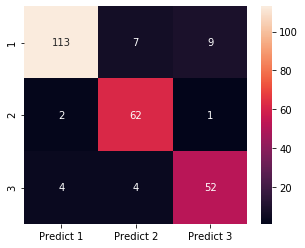

In [656]:
from sklearn import metrics
print("Confusion Matrix - SVC Model Original")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1,2,3])

df_cm = pd.DataFrame(cm, index = [i for i in [1,2,3]],
                  columns = [i for i in ["Predict 1","Predict 2","Predict 3"]])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm, annot=True, fmt='g');

#### Put results in a dataframe for comparison later

In [657]:
# del resultsDf 

In [658]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['SVC - Original'], 'Train Accuracy': SVC_Original_Train_Accuracy,
                          'Test Accuracy': SVC_Original_Test_Accuracy, 'Recall': SVC_Original_Test_Recall,
                          'Precision': SVC_Original_Test_precision,'F1 Score': SVC_Original_Test_f1,
                          'Cross validation score': SVC_Original_Test_cross_val_score})
resultsDf = resultsDf[['Method', 'Train Accuracy', 'Test Accuracy', 'Recall','Precision','F1 Score','Cross validation score']]
resultsDf.reset_index(drop=True, inplace=True)
resultsDf

Method  Train Accuracy  Test Accuracy    Recall  Precision  \
0  SVC - Original        0.971284       0.893701  0.893701   0.893701   

   F1 Score Cross validation score  
0  0.893701                  0.947

### Observation - We can see that SVM model with the original dataset is having an Train Accuracy of 97%, Test Accuracy of 89% and cross validation accuracy of 94.7%

### 3.4. - Dimensional reduction: Perform dimensional reduction on the data

### checking the covariance matrix with train data a for the origiinal dataframe with 13 columns

In [659]:
covMatrix = np.cov(X_train,rowvar=False)
print(covMatrix)

[[ 0.96227373  0.66735973  0.75545363  0.66791602  0.15526822  0.42033752
  -0.76509112  0.73421659  0.79067905  0.5680841  -0.25364809  0.18559886
   0.17117637]
 [ 0.66735973  0.98703967  0.77956038  0.62953166  0.20916337  0.5243933
  -0.81667667  0.79537522  0.82688429  0.92088338  0.04206465  0.10066527
  -0.01177443]
 [ 0.75545363  0.77956038  0.98868325  0.77253825  0.2466207   0.62608157
  -0.89907007  0.84584617  0.86766407  0.69767357 -0.26856338  0.06196415
   0.28561422]
 [ 0.66791602  0.62953166  0.77253825  1.02952872  0.72318896  0.53235511
  -0.79686643  0.80080751  0.71802007  0.54263543 -0.32140894 -0.00206449
   0.19117155]
 [ 0.15526822  0.20916337  0.2466207   0.72318896  1.03166373  0.25656502
  -0.28745543  0.26770184  0.1669373   0.15252156 -0.22982155 -0.08022647
  -0.02543481]
 [ 0.42033752  0.5243933   0.62608157  0.53235511  0.25656502  1.02364194
  -0.46345025  0.45235531  0.40393751  0.38860364 -0.22185396  0.06379443
   0.15058651]
 [-0.76509112 -0.816676

#### taking the no of components to 13 as we have 13 columns

In [660]:
pca = PCA(n_components=13)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### The eigen Values

In [661]:
print(pca.explained_variance_)

[6.94673978 1.61404463 1.20477298 1.09665889 0.73269451 0.69237534
 0.30508715 0.1871985  0.08785671 0.06065657 0.0430763  0.03119904
 0.0246362 ]


#### The eigen Vectors

In [662]:
print(pca.components_)

[[ 0.30969944  0.33435101  0.35459184  0.3279037   0.13784827  0.22875099
  -0.36197049  0.35469707  0.35400954  0.30879564 -0.05712708  0.02799203
   0.07844153]
 [-0.0183386   0.22902676 -0.06356453 -0.31072604 -0.45944359 -0.19469825
  -0.04043389  0.11274857  0.1466118   0.34570039  0.61317816  0.08200026
  -0.24405139]
 [-0.21186704  0.07788164 -0.13668327  0.2079254   0.55127851 -0.05934136
   0.00152146  0.04398053 -0.06544128  0.11030243  0.25313869 -0.47816928
  -0.51825793]
 [ 0.08204037  0.11781708 -0.05172289  0.03625574  0.16455179  0.12758156
   0.0972675  -0.1442637  -0.1236922   0.10725412 -0.18281436  0.72641094
  -0.56024486]
 [-0.01182209 -0.13097957 -0.14033985  0.20470162  0.40570114 -0.57408248
  -0.03773365  0.1225323   0.07249543 -0.00089232  0.30908712  0.41602947
   0.36963862]
 [-0.3063856   0.05732304 -0.00994174  0.00198175  0.18096021  0.67752433
   0.15645094 -0.03422271 -0.16702773  0.0665539   0.45196134  0.17662631
   0.34279977]
 [ 0.53666677 -0.37284

#### the percentage of variation explained by each eigen Vector

In [663]:
print(pca.explained_variance_ratio_)

[0.5332572  0.12389998 0.09248279 0.08418356 0.05624432 0.05314927
 0.02341961 0.01437004 0.0067442  0.00465622 0.00330669 0.00239495
 0.00189116]


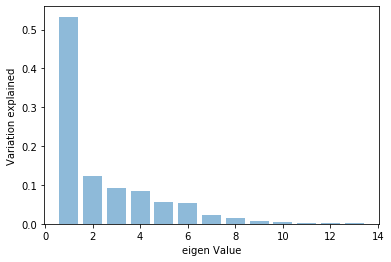

In [664]:
plt.bar(list(range(1,14)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

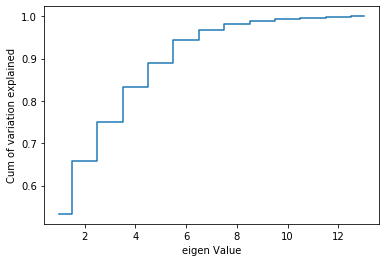

In [665]:
plt.step(list(range(1,14)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Observation - PCA

1) We can see that there is a variance explained with increase in number of PC's.

2) We will proceed with 6 components here which covers more than 95% of variance.

#### Now 6 dimensions seems very reasonable. With 6 variables we can explain over 95% of the variation in the original data!

In [666]:
pca2 = PCA(n_components=6)
pca2.fit(X_train)
print(pca2.components_)
print(pca2.explained_variance_ratio_)
Xpca2_train = pca2.transform(X_train)
Xpca2_test = pca2.transform(X_test)

[[ 0.30969944  0.33435101  0.35459184  0.3279037   0.13784827  0.22875099
  -0.36197049  0.35469707  0.35400954  0.30879564 -0.05712708  0.02799203
   0.07844153]
 [-0.0183386   0.22902676 -0.06356453 -0.31072604 -0.45944359 -0.19469825
  -0.04043389  0.11274857  0.1466118   0.34570039  0.61317816  0.08200026
  -0.24405139]
 [-0.21186704  0.07788164 -0.13668327  0.2079254   0.55127851 -0.05934136
   0.00152146  0.04398053 -0.06544128  0.11030243  0.25313869 -0.47816928
  -0.51825793]
 [ 0.08204037  0.11781708 -0.05172289  0.03625574  0.16455179  0.12758156
   0.0972675  -0.1442637  -0.1236922   0.10725412 -0.18281436  0.72641094
  -0.56024486]
 [-0.01182209 -0.13097957 -0.14033985  0.20470162  0.40570114 -0.57408248
  -0.03773365  0.1225323   0.07249543 -0.00089232  0.30908712  0.41602947
   0.36963862]
 [-0.3063856   0.05732304 -0.00994174  0.00198175  0.18096021  0.67752433
   0.15645094 -0.03422271 -0.16702773  0.0665539   0.45196134  0.17662631
   0.34279977]]
[0.5332572  0.1238999

In [667]:
pd.DataFrame(Xpca2_train)

0         1         2         3         4         5
0   -3.192300 -1.084367 -0.484125  0.588317 -0.576550 -0.460174
1    4.791222 -0.865537 -0.292572  0.121745 -0.103317  0.651972
2   -3.758434 -0.657802 -0.616347 -1.298577 -0.455722  0.263682
3   -0.211996 -0.813651 -1.155767 -1.762990  0.442089 -0.535211
4   -2.638690  2.151733  0.523732 -0.201005 -0.205355  1.131577
..        ...       ...       ...       ...       ...       ...
587 -2.159146  0.348572 -0.520823 -0.438464 -0.356049  0.603198
588  4.557407 -0.387538  0.646585  1.247375  0.266736  0.884274
589 -0.580499 -2.076034  0.697910 -0.434962  2.026979 -0.523824
590  3.633688 -0.932331  1.428578 -0.916420  0.062660 -0.038490
591  2.451981  1.639802  0.578216  0.965007  1.363150 -1.460378

[592 rows x 6 columns]

In [668]:
pd.DataFrame(y_train)

class
537      3
471      1
591      1
750      1
141      2
..     ...
66       2
486      1
752      2
763      1
78       2

[592 rows x 1 columns]

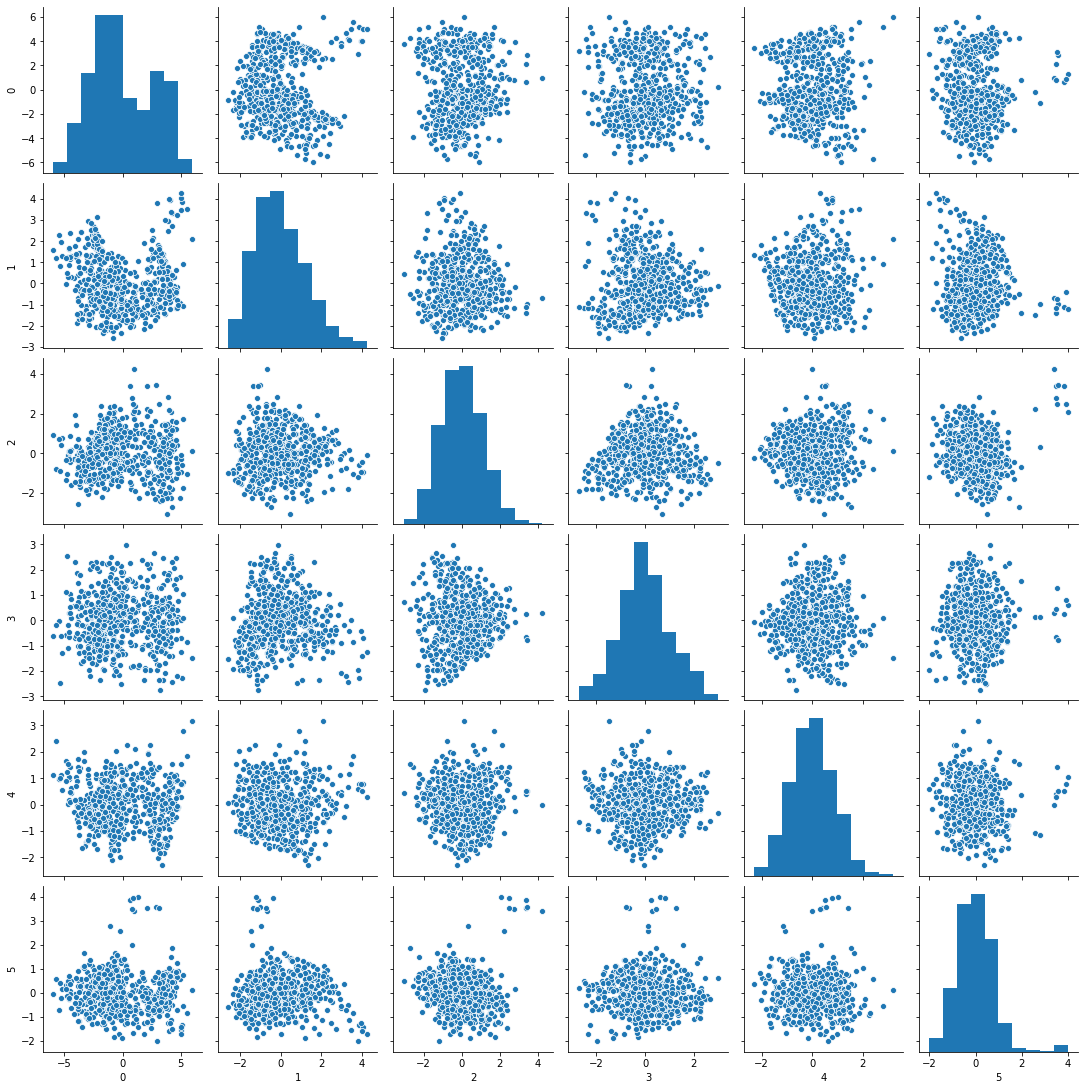

In [669]:
sns.pairplot(pd.DataFrame(Xpca2_train))

#### Observation - From above pairplot we can see that after Dimentionality reduction the indepedent variables are not correlated to each other now with 6 dimensions

In [671]:
# Creating a dimension reduced with predictors and target
Vehicle_reduced_feature_train = pd.DataFrame(Xpca2_train).join(pd.DataFrame(y_train, columns = ['class']), how = 'left', sort = False)
Vehicle_reduced_feature_test = pd.DataFrame(Xpca2_test).join(pd.DataFrame(y_test, columns = ['class']), how = 'left', sort = False)
Vehicle_reduced_feature_train.shape, Vehicle_reduced_feature_test.shape

((592, 7), (254, 7))

### Clusters using the dimensionality reduction

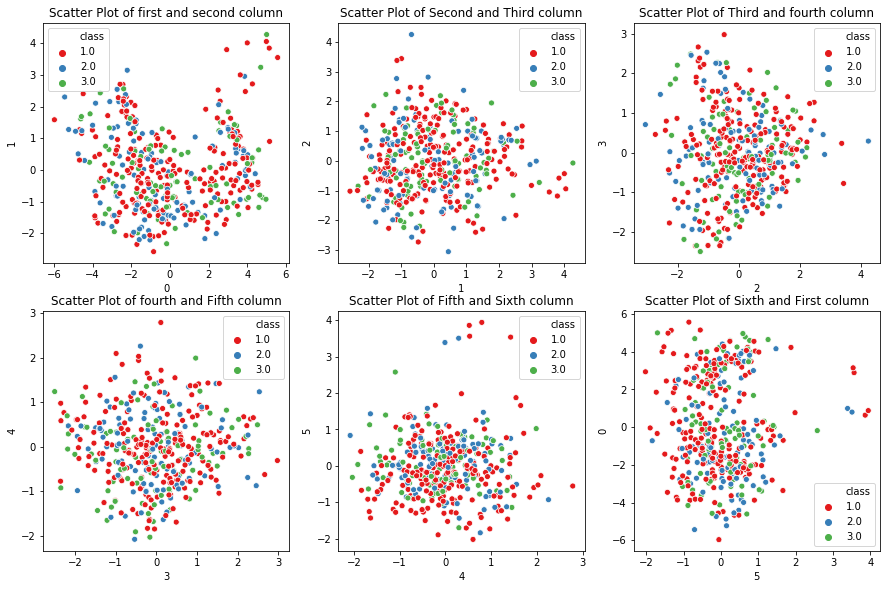

In [673]:
# Plotting the Scatter plot for all the vraibales in the Vehicle_reduced_feature_train dataset

fig = plt.figure(figsize = (15,15))
targets = [3, 2, 1]; colors = ['r', 'g', 'b']
plt.subplot(3, 3, 1)
sns.scatterplot(Vehicle_reduced_feature_train[0],Vehicle_reduced_feature_train[1],hue=Vehicle_reduced_feature_train['class'],palette='Set1')
plt.title("Scatter Plot of first and second column")
plt.subplot(3, 3, 2)
sns.scatterplot(Vehicle_reduced_feature_train[1],Vehicle_reduced_feature_train[2],hue=Vehicle_reduced_feature_train['class'],palette='Set1')
plt.title("Scatter Plot of Second and Third column")
plt.subplot(3, 3, 3)
sns.scatterplot(Vehicle_reduced_feature_train[2],Vehicle_reduced_feature_train[3],hue=Vehicle_reduced_feature_train['class'],palette='Set1')
plt.title("Scatter Plot of Third and fourth column")
plt.subplot(3, 3, 4)
sns.scatterplot(Vehicle_reduced_feature_train[3],Vehicle_reduced_feature_train[4],hue=Vehicle_reduced_feature_train['class'],palette='Set1')
plt.title("Scatter Plot of fourth and Fifth column")
plt.subplot(3, 3, 5)
sns.scatterplot(Vehicle_reduced_feature_train[4],Vehicle_reduced_feature_train[5],hue=Vehicle_reduced_feature_train['class'],palette='Set1')
plt.title("Scatter Plot of Fifth and Sixth column")
plt.subplot(3, 3, 6)
sns.scatterplot(Vehicle_reduced_feature_train[5],Vehicle_reduced_feature_train[0],hue=Vehicle_reduced_feature_train['class'],palette='Set1')
plt.title("Scatter Plot of Sixth and First column")
plt.show()

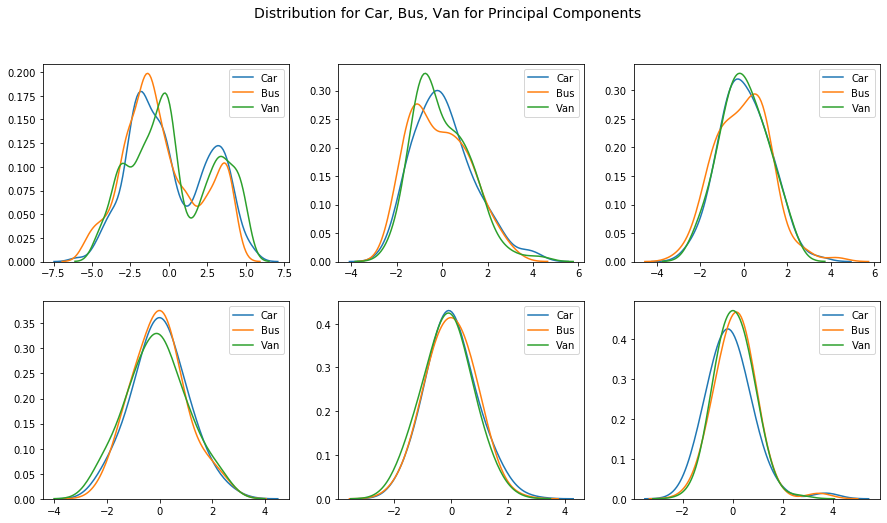

In [674]:
### kdeplot for all the variables except class

fig = plt.figure(figsize = (15,8))
fig.suptitle('Distribution for Car, Bus, Van for Principal Components', fontsize = 14)

t1 = Vehicle_reduced_feature_train[Vehicle_reduced_feature_train['class'] == 1]
t2 = Vehicle_reduced_feature_train[Vehicle_reduced_feature_train['class'] == 2]
t3 = Vehicle_reduced_feature_train[Vehicle_reduced_feature_train['class'] == 3]

i=0

features = [f for f in Vehicle_reduced_feature_train.columns if f not in ['class']]

for col in features:
    i=i+1
    plt.subplot(2, 3, i)
    sns.kdeplot(t1[col], bw = 0.5, label = 'Car')
    sns.kdeplot(t2[col], bw = 0.5, label = 'Bus')
    sns.kdeplot(t3[col], bw = 0.5, label = 'Van')

plt.show()

#### Observation - From the above graphs we can see that data in Train and test dataset is normally distributed

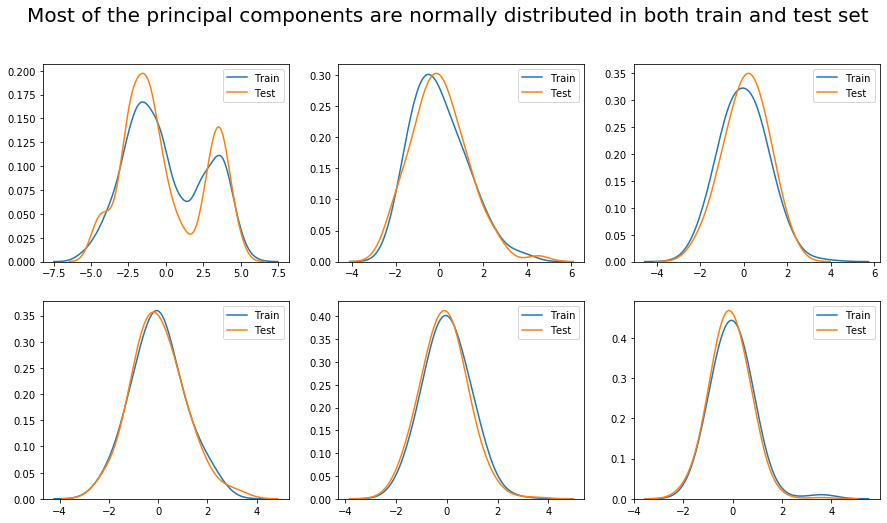

In [675]:
### kdeplot for all the variables except class

fig = plt.figure(figsize = (15,8))
fig.suptitle('Most of the principal components are normally distributed in both train and test set', fontsize = 20)

ttr = Vehicle_reduced_feature_train.drop(['class'], axis = 1)
tte = Vehicle_reduced_feature_test.drop(['class'], axis = 1)

i=0

features = [f for f in Vehicle_reduced_feature_train.columns if f not in ['class']]

for col in features:
    i=i+1
    plt.subplot(2, 3, i)
    sns.kdeplot(ttr[col], bw = 0.5, label = 'Train')
    sns.kdeplot(tte[col], bw = 0.5, label = 'Test')

plt.show()

#### Observation - From the above graphs we can see that data in Train and test dataset is normally distributed

### 3.5. - Classifier: Design and train a best fit SVM classier using dimensionally reduced attributes

In [676]:
# SVC with hyperparameter tuning -- reduced Features

random_state = 42
scoring = 'f1_macro'
svc = SVC(random_state = random_state)
params = {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']}
skf = StratifiedKFold(n_splits = 10)

grid_svc_R = GridSearchCV(svc, param_grid = params, n_jobs = -1, cv = skf)

# Fit the model
grid_svc_R.fit(Xpca2_train, y_train)
y_true, y_pred = y_test, grid_svc_R.predict(Xpca2_test)

print('SVC Scores with Hyperparameter Tuning for Redcued features\n')
print('Best Hyper Parameters for reduced are: ', grid_svc_R.best_params_)
print('Best Score is: ', grid_svc_R.best_score_.round(3))
print('SVC accuracy for train reduced set: {0:.3f}'.format(grid_svc_R.score(Xpca2_train, y_train)))
print('SVC accuracy for test reduced set: {0:.3f}'.format(grid_svc_R.score(Xpca2_test, y_test)))

# Cross Validation Score
grid_svc_R_score = cross_val_score(grid_svc_R, Xpca2_train, y_train, cv = skf, scoring = scoring)
print('SVC cross validation training score: ', round(grid_svc_R_score.mean(), 3).astype(str))

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

SVC_Reduced_Train_Accuracy = grid_svc_R.score(Xpca2_train, y_train)
SVC_Reduced_Test_Accuracy = grid_svc_R.score(Xpca2_test, y_test)
SVC_Reduced_Test_cross_val_score = round(grid_svc_R_score.mean(), 3).astype(str)
SVC_Reduced_Test_Recall = recall_score(y_test,y_pred, average='micro')
SVC_Reduced_Test_precision = precision_score(y_test,y_pred, average='micro')
SVC_Reduced_Test_f1 = f1_score(y_test,y_pred, average='micro')

SVC Scores with Hyperparameter Tuning for Redcued features

Best Hyper Parameters for reduced are:  {'C': 0.5, 'kernel': 'rbf'}
Best Score is:  0.915
SVC accuracy for train reduced set: 0.931
SVC accuracy for test reduced set: 0.827
SVC cross validation training score:  0.908

              precision    recall  f1-score   support

           1       0.86      0.84      0.85       129
           2       0.84      0.91      0.87        65
           3       0.74      0.70      0.72        60

    accuracy                           0.83       254
   macro avg       0.81      0.82      0.81       254
weighted avg       0.83      0.83      0.83       254


Confusion Matrix:
 [[109   7  13]
 [  4  59   2]
 [ 14   4  42]]


Confusion Matrix - SVC Model Original


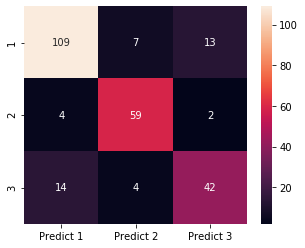

In [677]:
from sklearn import metrics
print("Confusion Matrix - SVC Model Original")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1,2,3])

df_cm = pd.DataFrame(cm, index = [i for i in [1,2,3]],
                  columns = [i for i in ["Predict 1","Predict 2","Predict 3"]])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm, annot=True, fmt='g');

#### Put results in a dataframe for comparison later

In [678]:
# del tempResultsDf

In [679]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVC - Reduced'], 'Train Accuracy': SVC_Reduced_Train_Accuracy,
                          'Test Accuracy': SVC_Reduced_Test_Accuracy, 'Recall': SVC_Reduced_Test_Recall,
                          'Precision': SVC_Reduced_Test_precision,'F1 Score': SVC_Reduced_Test_f1,
                          'Cross validation score': SVC_Reduced_Test_cross_val_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Accuracy', 'Test Accuracy', 'Recall','Precision','F1 Score','Cross validation score']]
resultsDf.reset_index(drop=True, inplace=True)
resultsDf

Method  Train Accuracy  Test Accuracy    Recall  Precision  \
0  SVC - Original        0.971284       0.893701  0.893701   0.893701   
1   SVC - Reduced        0.930743       0.826772  0.826772   0.826772   

   F1 Score Cross validation score  
0  0.893701                  0.947  
1  0.826772                  0.908

In [680]:
# Helper function to plot learning curve
def plot_learning_curve(estimator, X, y,  ax, ylim = None, cv = None, n_jobs = 1,
                        train_sizes = np.linspace(.1, 1.0, 5), name = ' '):    
    if ylim is not None:
        plt.ylim(*ylim)
        
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, n_jobs = n_jobs, 
                                                            train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                     alpha = 0.1, color = '#ff9124')
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                     alpha = 0.1, color = '#2492ff')

    ax.plot(train_sizes, train_scores_mean, 'o-', color = '#ff9124', label = 'Training score')
    ax.plot(train_sizes, test_scores_mean, 'o-', color ='#2492ff', label = 'Cross-validation score')
    ax.set_title(name, fontsize = 14)
    ax.set_xlabel('Training size')
    ax.set_ylabel('Score')
    ax.grid(True)
    ax.legend(loc = 'best')

C:\Users\Anuj Sachdeva\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Anuj Sachdeva\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Anuj Sachdeva\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Anuj Sachdeva\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Anuj Sachdeva\anaconda3\lib\site-packages\sklearn\model_sel

C:\Users\Anuj Sachdeva\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Anuj Sachdeva\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Anuj Sachdeva\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Anuj Sachdeva\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Anuj Sachdeva\anaconda3\lib\site-packages\sklearn\model_sel

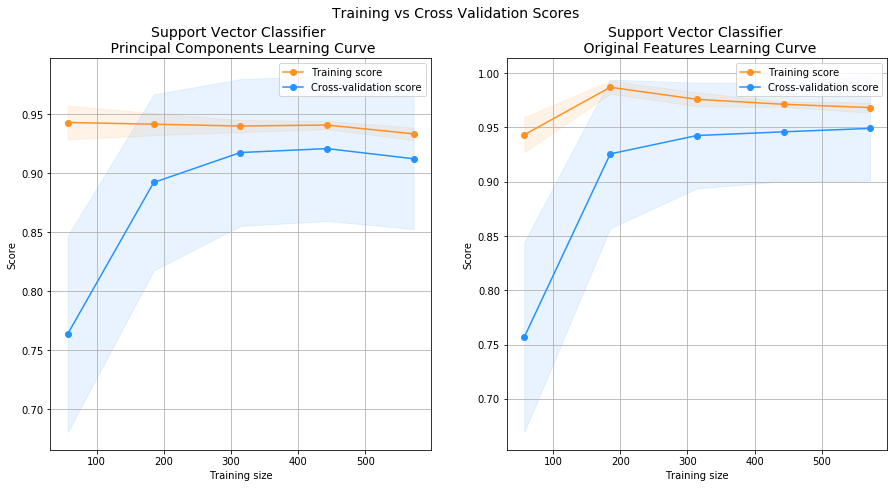

In [681]:
# Plot training vs cross validation scores
cv = StratifiedKFold(n_splits = 30)

f, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (15, 7.2))
f.suptitle('Training vs Cross Validation Scores', fontsize = 14)

plot_learning_curve(grid_svc_R, Xpca2_train, y_train, cv = cv, n_jobs = 1, ax = ax1, 
                    name = 'Support Vector Classifier \n Principal Components Learning Curve')

plot_learning_curve(grid_svc_f, X_train, y_train, cv = cv, n_jobs = 1, ax = ax2,
                    name = 'Support Vector Classifier \n Original Features Learning Curve')

### 3.6. - Conclusion: Showcase key pointer on how dimensional reduction helped in this case

In [683]:
resultsDf

Method  Train Accuracy  Test Accuracy    Recall  Precision  \
0  SVC - Original        0.971284       0.893701  0.893701   0.893701   
1   SVC - Reduced        0.930743       0.826772  0.826772   0.826772   

   F1 Score Cross validation score  
0  0.893701                  0.947  
1  0.826772                  0.908

We used **correlation matrix** and checked the relation of each feature with the class column to reduce the number of features in the dataset to 12 from 18.

**PCA** being a statistical technique to reduce the dimensionality of the data by the selecting the most important features that captures maximum information about the dataset, does the task here. Here we've reduced the dimension from 12 to 6 and selected those which explained 95% variance. Doing that it removes the correlated features as well, which we saw in the scatterplot before and after PCA.

However, some of the limitations which are clearly seen in this use case are: after implementing PCA on the dataset, we saw features getting converted into **principal components**. Principal components are the linear combination of original features. This makes the features less interpretable. Additionally, we know that one of limitation of PCA is it assumes linearity i.e. principal components are a linear combinations of the original features, which if not true will not give a sensible results.

We have applied **Support Vector Classifier** on the **Original feature data and reduced feature data (PCA)** and below are the analysis details-

**Training Accuracy score of 97.1 % (Original) and 93.0 % (Reduced)**

**Testing Accuracy score of 89.3.9% (Original) and 82.6 % (Reduced)**

**Cross validation score of 94.7% (Original) and 90.8% (Reduced)**

**Recall, precision and F1 Score with original dataset is 89.3.9% whereas with Reduced features it is 82.6 % respectively**

From above we can see that Accuracy and Cross validation score are better for original features instead when SVC is spplied  on the reduced features (PCA).

============================================================================================================================

**Here the Shape of dataset we were dealing with was 846 rows and 12 features + 1 class column. Effect of PCA can be more useful in large datasets with more features**

Based on learning curve, we can conclude that for SVC with principal components and original features, both training and validation scores increases with the increase in size of the dataset, which would mean the scores can further increase with more training samples. Howevver, the gap between training and validation score for SVC with principal component is higher than then the feature dataset.

====================================================================================================================

## Part 4:

• DOMAIN: Sports management

• CONTEXT: TCompany X is a sports management company for international crickethe data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

• DATA DESCRIPTION: The data is collected belongs to batsman from IPL series conducted so far. 

Attribute Information:

1. Runs: Runs score by the batsman

2. Ave: Average runs scored by the batsman per match

3. SR: strike rate of the batsman

4. Fours: number of boundary/four scored

5. Six: number of boundary/six scored

6. HF: number of half centuries scored so far

• PROJECT OBJECTIVE: Goal is to build a data driven batsman ranking model for the sports management company to make business decisions

### Install the necessary libraries

In [396]:
import numpy as np   
import pandas as pd    

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder, StandardScaler

from scipy.stats import zscore
from scipy import stats

from sklearn.decomposition import PCA

In [397]:
players = pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")
print('players Dataframe shape is : {}'.format(players.shape))

players Dataframe shape is : (180, 7)


In [398]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


#### Observation 1: Info Command

1) Total number of rows in Vehicle dataset are 90

2) Total number of columns in Vehicle dataset are 7

3) 6 columns are with Float64 datatype

4) 1 column is with Object dataype

5) All the column values as per the info command are non-null but if you see the rangindex it has 180 entries

In [399]:
players.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN

In [400]:
players[players['Name'].isnull()]

Name  Runs  Ave  SR  Fours  Sixes  HF
0    NaN   NaN  NaN NaN    NaN    NaN NaN
2    NaN   NaN  NaN NaN    NaN    NaN NaN
4    NaN   NaN  NaN NaN    NaN    NaN NaN
6    NaN   NaN  NaN NaN    NaN    NaN NaN
8    NaN   NaN  NaN NaN    NaN    NaN NaN
..   ...   ...  ...  ..    ...    ...  ..
170  NaN   NaN  NaN NaN    NaN    NaN NaN
172  NaN   NaN  NaN NaN    NaN    NaN NaN
174  NaN   NaN  NaN NaN    NaN    NaN NaN
176  NaN   NaN  NaN NaN    NaN    NaN NaN
178  NaN   NaN  NaN NaN    NaN    NaN NaN

[90 rows x 7 columns]

#### Observation - 90 rows are with null values

In [401]:
# Drop the rows whcih have NULL values
players_new = players.dropna(how='all') 
players_new = players_new.reset_index(drop=True)
players_new.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
1  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
2   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
3   CL White  479.0  43.54  149.68   41.0   20.0  5.0
4   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0

In [402]:
players_new.describe(include='all').T

count unique        top freq     mean      std    min      25%      50%  \
Name     90     90  JH Kallis    1      NaN      NaN    NaN      NaN      NaN   
Runs     90    NaN        NaN  NaN  219.933  156.254      2       98    196.5   
Ave      90    NaN        NaN  NaN  24.7299  13.6192    0.5   14.665    24.44   
SR       90    NaN        NaN  NaN  119.164  23.6565  18.18  108.745  120.135   
Fours    90    NaN        NaN  NaN  19.7889  16.3998      0     6.25       16   
Sixes    90    NaN        NaN  NaN  7.57778  8.00137      0        3        6   
HF       90    NaN        NaN  NaN  1.18889  1.68866      0        0      0.5   

           75%    max  
Name       NaN    NaN  
Runs    330.75    733  
Ave     32.195  81.33  
SR     131.998  164.1  
Fours       28     73  
Sixes       10     59  
HF           2      9

### 4.1. - EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.

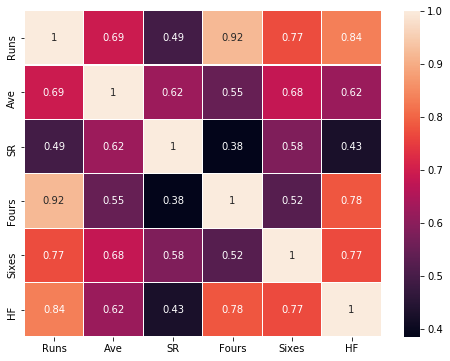

In [403]:
fig = plt.figure(figsize = (8,6))
sns.heatmap(players_new.corr(),annot=True,linewidths=.05);

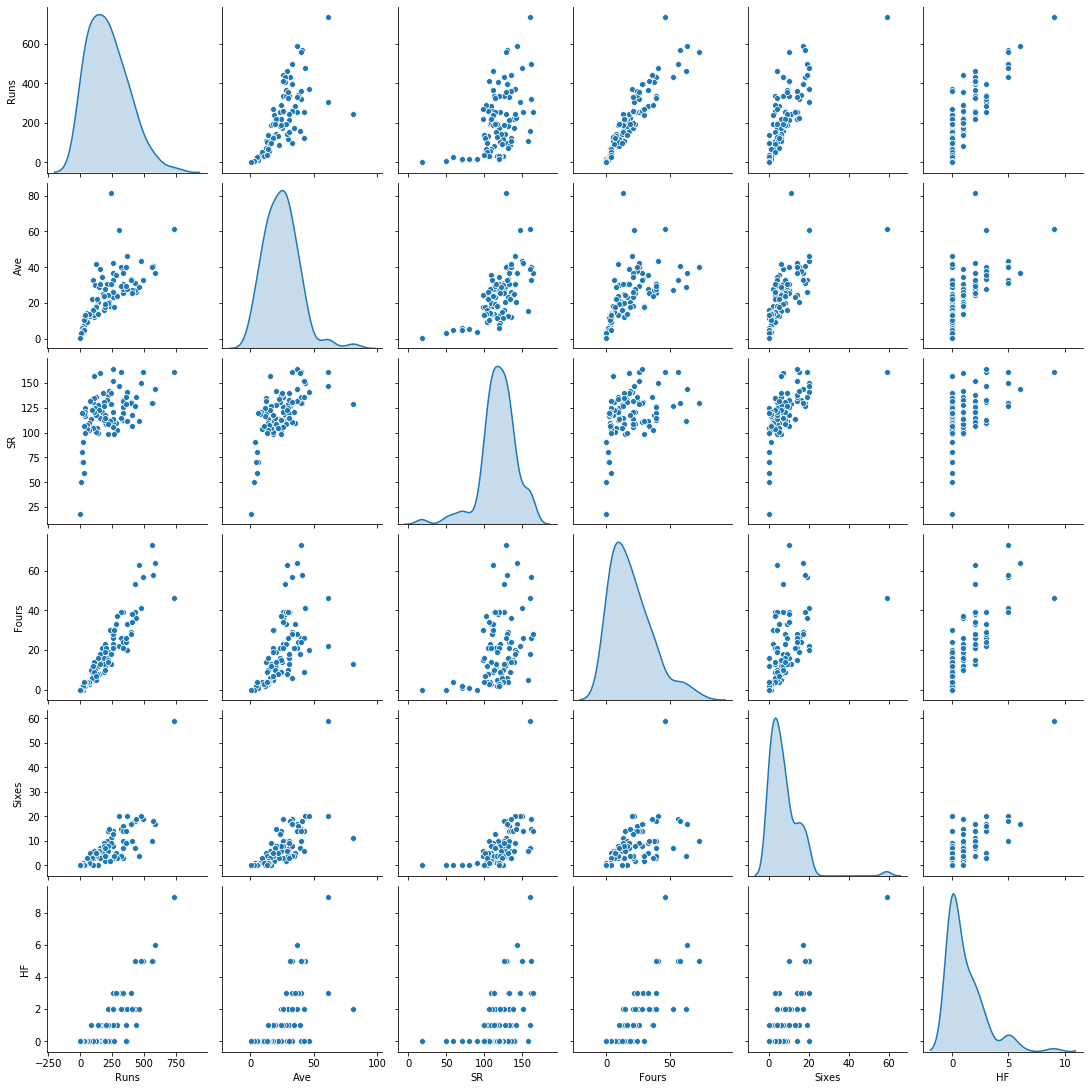

In [404]:
sns.pairplot(players_new, diag_kind='kde')

### Observation from correlation matrix and pair plot

#### Runs is Positively correlated with Fours, Half Century and Sixes with corrleation coefficient more than .75

#### Fours is correlated with half century with corrleation coefficient of .78

#### Sixes is correlated with half century with corrleation coefficient of .77

#### Average and runs are also correlated with each other with coefficient of .69

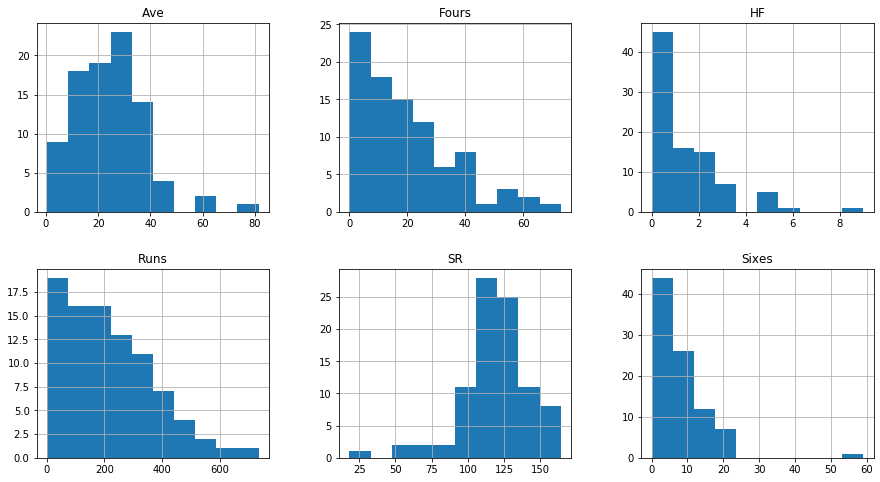

In [405]:
# try ploting distribution graphs.
players_new.hist(figsize=(15,8),layout = (2,3));

In [406]:
players_new1 = players_new.copy()
players_new1 = players_new1.drop(['Name'],axis=1)

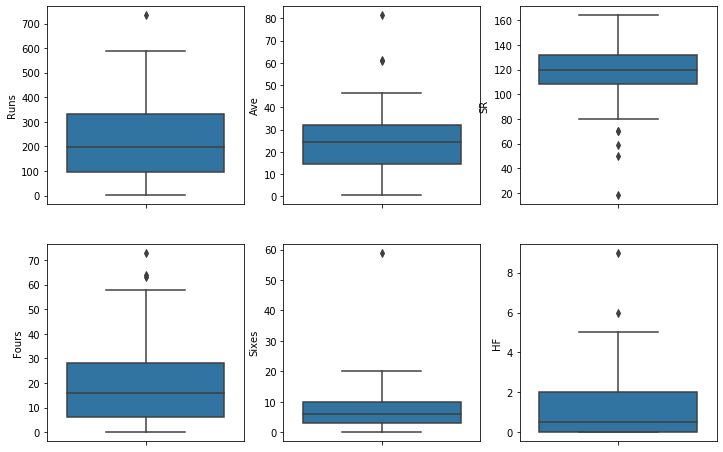

In [407]:
# Univariate boxplot of all the variables in Vehicle_out_fixed dataframe
fig = plt.figure(figsize = (12,8))

i=1
for col in players_new1.columns:
    plt.subplot(2, 3, i)
    sns.boxplot(data = players_new1 , y=col)
    i=i+1

plt.show()

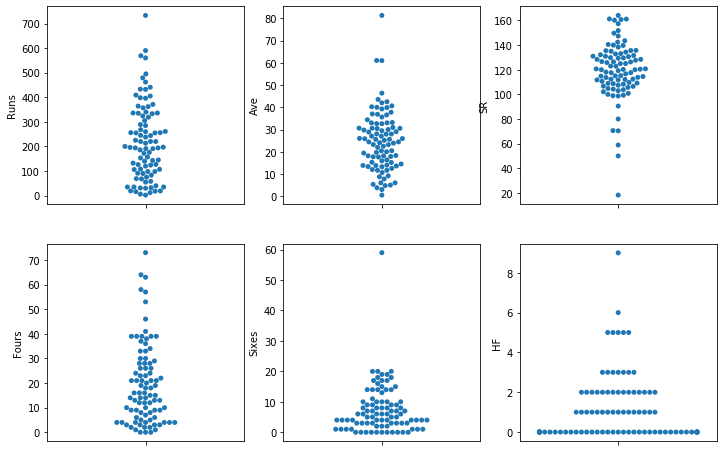

In [408]:
# Univariate boxplot of all the variables in Vehicle_out_fixed dataframe
fig = plt.figure(figsize = (12,8))

i=1
for col in players_new1.columns:
    plt.subplot(2, 3, i)
    sns.swarmplot(data = players_new1 , y=col)
    i=i+1

plt.show()

### Observation from Boxplot and Swarmplot:

#### 1) Only 4 players have scores more than 500. Runs are right skeyed. 

#### 2) Only 3 palyers have an average of more than 50. Average is right skeyed.

#### 3) Most of the players have a strike rate from 100 to 140

#### 4) Only 6 palyers have No of Fours more than 50. Fours are also right Skeyed.

#### 5) Only 1 palyer is having the no of sixes more than 50.

#### 6) Only 6 palyers have half centuries greater than and equal to 5 

### Sports management company can target those players who have runs more than 400, Average more than 40 and half Century more than 5

In [409]:
players_data_scaled = players_new1.apply(zscore)
players_data_scaled

Runs       Ave        SR     Fours     Sixes        HF
0   3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
1   2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
2   1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
3   1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
4   2.246490  1.174755  0.444038  2.343021  1.309851  2.269533
..       ...       ...       ...       ...       ...       ...
85 -1.338197 -1.382959 -2.065234 -1.152093 -0.952365 -0.707989
86 -1.293147 -1.475256 -2.074160 -1.090775 -0.952365 -0.707989
87 -1.222355 -1.456796 -2.565132 -0.968140 -0.952365 -0.707989
88 -1.376812 -1.604470 -2.940057 -1.213411 -0.952365 -0.707989
89 -1.402554 -1.789063 -4.292674 -1.213411 -0.952365 -0.707989

[90 rows x 6 columns]

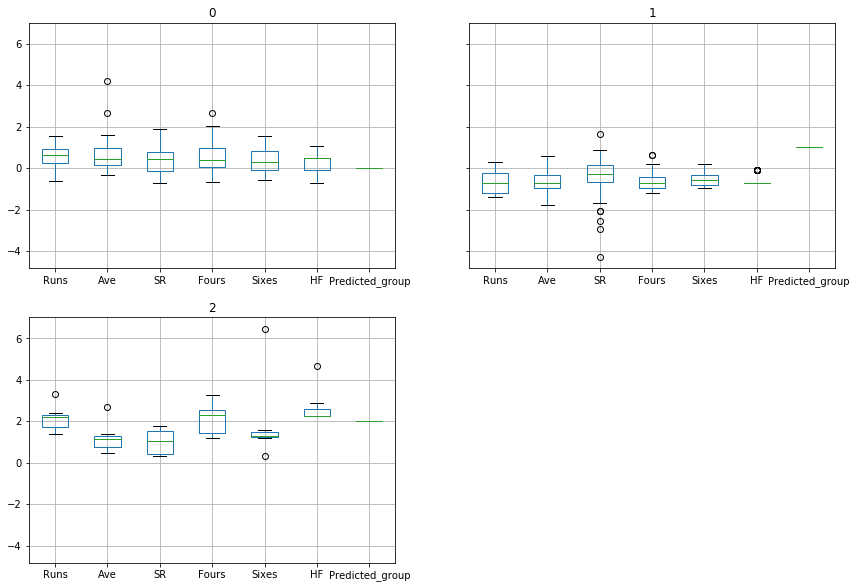

In [410]:
# Trying the K-means clusters with K=3
players_data_model = KMeans(3)
players_data_model.fit(players_data_scaled)

players_group = players_data_model.predict(players_data_scaled)
players_data_scaled['Predicted_group'] = players_group
players_new['Predicted_group'] = players_group

players_data_scaled_grouped = players_data_scaled.groupby(['Predicted_group'])
players_data_scaled_grouped.boxplot(figsize=(14,10),layout = (2,2));

In [411]:
players_data_scaled_grouped.mean()

Runs       Ave        SR     Fours     Sixes        HF
Predicted_group                                                            
0                0.569042  0.687366  0.426072  0.514308  0.400529  0.325387
1               -0.699487 -0.647136 -0.440163 -0.656545 -0.554810 -0.610763
2                2.132486  1.191316  1.011647  2.097750  1.938245  2.694894

### Observation on the 3 Clusters: 

### Cluster 0:

#### Average Runs, Average Average, Average Strike rate, Average number of Fours, Sixes and Half century 

### Cluster 1:

#### Low Runs, Low Average, Low Strike rate, Low number of Fours, Sixes and Half century

### Cluster 2:

#### High Runs, High Average, High Strike rate, High number of Fours, Sixes and Half century

### PCA to find out number of Key features and eigen values.

In [412]:
players_data_scaled.head()

Runs       Ave        SR     Fours     Sixes        HF  Predicted_group
0  3.301945  2.683984  1.767325  1.607207  6.462679  4.651551                2
1  2.381639  0.896390  1.036605  2.710928  1.184173  2.865038                2
2  1.770248  0.610640  1.788154  2.281703  1.435530  2.269533                2
3  1.667276  1.388883  1.297182  1.300618  1.561209  2.269533                2
4  2.246490  1.174755  0.444038  2.343021  1.309851  2.269533                2

In [413]:
players_new.head()

Name   Runs    Ave      SR  Fours  Sixes   HF  Predicted_group
0   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0                2
1  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0                2
2   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0                2
3   CL White  479.0  43.54  149.68   41.0   20.0  5.0                2
4   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0                2

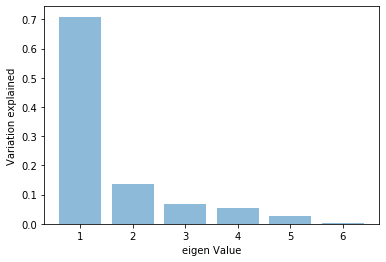

In [414]:
pca = PCA()
pca.fit(players_data_scaled.drop('Predicted_group', axis=1))

plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

### Observation: 71 % of the variation in data is defined by 1st eigen vector

#### We can try with 1 eigen vector and define the ranking to the players by sorting it.

### 4.2. - Build a data driven model to rank all the players in the dataset using all or the most important performance features

In [415]:
pca2 = PCA(n_components=1)
pca2.fit(players_data_scaled.drop('Predicted_group', axis=1))
print('PCA components are {}'.format(pca2.components_))
print('Variance ratio : {}'.format(pca2.explained_variance_ratio_))

Xpca2 = pca2.transform(players_data_scaled.drop('Predicted_group', axis=1))

players_new['X_PCA'] = Xpca2
players_data_scaled['X_PCA'] = Xpca2

players_data_sorted = players_new.sort_values(by='X_PCA', ascending=False)
players_data_sorted['Ranking'] = list(range(1,91))

players_data_scaled = players_data_scaled.sort_values(by='X_PCA', ascending=False)
players_data_scaled['Ranking'] = list(range(1,91))

players_data_sorted

PCA components are [[0.4582608  0.39797313 0.3253838  0.40574167 0.41733459 0.43237178]]
Variance ratio : [0.70911996]


Name   Runs    Ave      SR  Fours  Sixes   HF  Predicted_group  \
0      CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0                2   
1     G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0                2   
2      V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0                2   
4      S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0                2   
5     AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0                2   
..          ...    ...    ...     ...    ...    ...  ...              ...   
86   WD Parnell   19.0   4.75   70.37    2.0    0.0  0.0                1   
85       Z Khan   12.0   6.00   70.58    1.0    0.0  0.0                1   
87  PC Valthaty   30.0   5.00   58.82    4.0    0.0  0.0                1   
88     RP Singh    6.0   3.00   50.00    0.0    0.0  0.0                1   
89     R Sharma    2.0   0.50   18.18    0.0    0.0  0.0                1   

       X_PCA  Ranking  
0   8.516774        1  
1   4.618340        2  
2   4.142251        3  
4   4.120072        4  
5   4.024436        5  
..       ...      ...  
86 -3.000751       86  
85 -3.006639       87  
87 -3.070959       88  
88 -3.422022       89  
89 -3.947402       90  

[90 rows x 10 columns]

In [416]:
players_data_scaled.head()

Runs       Ave        SR     Fours     Sixes        HF  \
0  3.301945  2.683984  1.767325  1.607207  6.462679  4.651551   
1  2.381639  0.896390  1.036605  2.710928  1.184173  2.865038   
2  1.770248  0.610640  1.788154  2.281703  1.435530  2.269533   
4  2.246490  1.174755  0.444038  2.343021  1.309851  2.269533   
5  2.188568  1.127500  0.432136  3.262788  0.304422  2.269533   

   Predicted_group     X_PCA  Ranking  
0                2  8.516774        1  
1                2  4.618340        2  
2                2  4.142251        3  
4                2  4.120072        4  
5                2  4.024436        5

In [417]:
X=players_data_scaled.drop(['Predicted_group', 'X_PCA', 'Ranking'], axis=1)
y=players_data_scaled['Ranking']
regression_model = LinearRegression()
regression_model.fit(X,y)
print('Accuracy of the model is {}'.format(regression_model.score(X, y)))

Accuracy of the model is 0.9398457988194977


#### Above Accuracy is pretty good and ranking is which we have decided is 94% correct basis on the 71 % variance explained

In [418]:
### As per EDA also we can see that rakings are fine basis on the Runs, Half century and Average

In [419]:
players_data_sorted_EDA = players_data_sorted[players_data_sorted['Runs'] > 400]
players_data_sorted_EDA

Name   Runs    Ave      SR  Fours  Sixes   HF  Predicted_group  \
0        CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0                2   
1       G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0                2   
2        V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0                2   
4        S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0                2   
5       AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0                2   
3        CL White  479.0  43.54  149.68   41.0   20.0  5.0                2   
7       RG Sharma  433.0  30.92  126.60   39.0   18.0  5.0                2   
16       SK Raina  441.0  25.94  135.69   36.0   19.0  1.0                0   
19       R Dravid  462.0  28.87  112.13   63.0    4.0  2.0                0   
18  Mandeep Singh  432.0  27.00  126.31   53.0    7.0  2.0                0   
24     RV Uthappa  405.0  27.00  118.07   38.0   10.0  2.0                0   
32      JH Kallis  409.0  25.56  106.51   34.0   10.0  2.0                0   

       X_PCA  Ranking  
0   8.516774        1  
1   4.618340        2  
2   4.142251        3  
4   4.120072        4  
5   4.024436        5  
3   3.899411        6  
7   2.919015        7  
16  1.869895       14  
19  1.834522       15  
18  1.795785       17  
24  1.386346       21  
32  1.096419       25

In [420]:
players_data_sorted_EDA = players_data_sorted_EDA[players_data_sorted_EDA['Fours'] >= 40]
players_data_sorted_EDA

Name   Runs    Ave      SR  Fours  Sixes   HF  Predicted_group  \
0        CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0                2   
1       G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0                2   
2        V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0                2   
4        S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0                2   
5       AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0                2   
3        CL White  479.0  43.54  149.68   41.0   20.0  5.0                2   
19       R Dravid  462.0  28.87  112.13   63.0    4.0  2.0                0   
18  Mandeep Singh  432.0  27.00  126.31   53.0    7.0  2.0                0   

       X_PCA  Ranking  
0   8.516774        1  
1   4.618340        2  
2   4.142251        3  
4   4.120072        4  
5   4.024436        5  
3   3.899411        6  
19  1.834522       15  
18  1.795785       17

In [421]:
players_data_sorted_EDA = players_data_sorted_EDA[players_data_sorted_EDA['HF'] >= 5]
players_data_sorted_EDA

Name   Runs    Ave      SR  Fours  Sixes   HF  Predicted_group  \
0   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0                2   
1  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0                2   
2   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0                2   
4   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0                2   
5  AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0                2   
3   CL White  479.0  43.54  149.68   41.0   20.0  5.0                2   

      X_PCA  Ranking  
0  8.516774        1  
1  4.618340        2  
2  4.142251        3  
4  4.120072        4  
5  4.024436        5  
3  3.899411        6

### From above also, we can see that Top players have have runs more than 400, Average more than 40 and half Century more than 5

===========================================================================================================

## Part 5:

### 5.1. - List down all possible dimensionality reduction techniques that can be implemented using python.

**Missing Value Ratio**: If the dataset has too many missing values, we use this approach to reduce the number of variables. We can drop the variables having a large number of missing values in them

**Low Variance filter**: We apply this approach to identify and drop constant variables from the dataset. The target variable is not unduly affected by variables with low variance, and hence these variables can be safely dropped

**High Correlation filter**: A pair of variables having high correlation increases multicollinearity in the dataset. So, we can use this technique to find highly correlated features and drop them accordingly

**Random Forest**: This is one of the most commonly used techniques which tells us the importance of each feature present in the dataset. We can find the importance of each feature and keep the top most features, resulting in dimensionality reduction
Both Backward Feature Elimination and Forward Feature Selection techniques take a lot of computational time and are thus generally used on smaller datasets

**Factor Analysis**: This technique is best suited for situations where we have highly correlated set of variables. It divides the variables based on their correlation into different groups, and represents each group with a factor

**Principal Component Analysis**: This is one of the most widely used techniques for dealing with linear data. It divides the data into a set of components which try to explain as much variance as possible

**Singular Value Decomposition**: The purpose of Singular Value Decomposition is to simplify a matrix and make doing calculations with the matrix easier. The matrix is reduced to its constituent parts, **similar to the goal of PCA**. 

Exapmple of SVD: One of the most common ways that SVD is used is to compress images

**Linear Discriminant Analysis**: Linear Discriminant Analysis operates by projecting data from a multidimensional graph onto a linear graph. The easiest way to conceive of this is with a graph filled up with data points of two different classes. Assuming that there is no line that will neatly separate the data into two classes, the two dimensional graph can be reduced down into a 1D graph. This 1D graph can then be used to hopefully achieve the best possible separation of the data points.

When LDA is carried out there are two primary goals: minimizing the variance of the two classes and maximizing the distance between the means of the two data classes.

Example of LDA: LDA can be used as a classification algorithm in addition to carrying out dimensionality reduction.

**Independent Component Analysis**: We can use ICA to transform the data into independent components which describe the data using less number of components

**ISOMAP**: We use this technique when the data is strongly non-linear

**t-SNE**: This technique also works well when the data is strongly non-linear. It works extremely well for visualizations as well

**UMAP**: This technique works well for high dimensional data. Its run-time is shorter as compared to t-SNE

### 5.2. - So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and text data ? Please illustrate your findings using a simple implementation on python

### Singular Value Decomposition (SVD)

One of the most common ways that SVD is used is to compress images. After all, the pixel values that make up the red, green, and blue channels in the image can just be reduced and the result will be an image that is less complex but still contains the same image content. Let's try using SVD to compress an image and render it.

In [362]:
import numpy
import PIL
from PIL import Image

function to load the image and turn it into a Numpy array. We then want to select the red, green, and blue color channels from the image

In [363]:
def load_image(image):
    image = Image.open(image)
    im_array = numpy.array(image)

    red = im_array[:, :, 0]
    green = im_array[:, :, 1]
    blue = im_array[:, :, 2]

    return red, green, blue

Now that we have the colors, we need to compress the color channels. We can start by calling Numpy's SVD function on the color channel we want. We'll then create an array of zeroes that we'll fill in after the matrix multiplication is completed. We then specify the singular value limit we want to use when doing the calculations:

In [364]:
def channel_compress(color_channel, singular_value_limit):
    u, s, v = numpy.linalg.svd(color_channel)
    compressed = numpy.zeros((color_channel.shape[0], color_channel.shape[1]))
    n = singular_value_limit

    left_matrix = numpy.matmul(u[:, 0:n], numpy.diag(s)[0:n, 0:n])
    inner_compressed = numpy.matmul(left_matrix, v[0:n, :])
    compressed = inner_compressed.astype('uint8')
    return compressed

In [371]:
# path=r'C:\Users\Anuj Sachdeva\Desktop\Great Learning\06 Unsupervised Learning\Project\dog3.jpg'
red, green, blue = load_image('Tree.jpeg')
singular_val_lim = 350

After this, we do matrix multiplication on the diagonal and the value limits in the U matrix, as described above. This gets us the left matrix and we then multiply it with the V matrix. This should get us the compressed values which we transform to the ‘uint8' type:

In [372]:
def compress_image(red, green, blue, singular_val_lim):
    compressed_red = channel_compress(red, singular_val_lim)
    compressed_green = channel_compress(green, singular_val_lim)
    compressed_blue = channel_compress(blue, singular_val_lim)

    im_red = Image.fromarray(compressed_red)
    im_blue = Image.fromarray(compressed_blue)
    im_green = Image.fromarray(compressed_green)

    new_image = Image.merge("RGB", (im_red, im_green, im_blue))
    new_image.show()
    new_image.save("Tree-edited.jpeg")

compress_image(red, green, blue, singular_val_lim)

Attaching Input File 'Tree.jpeg' - 202 kb

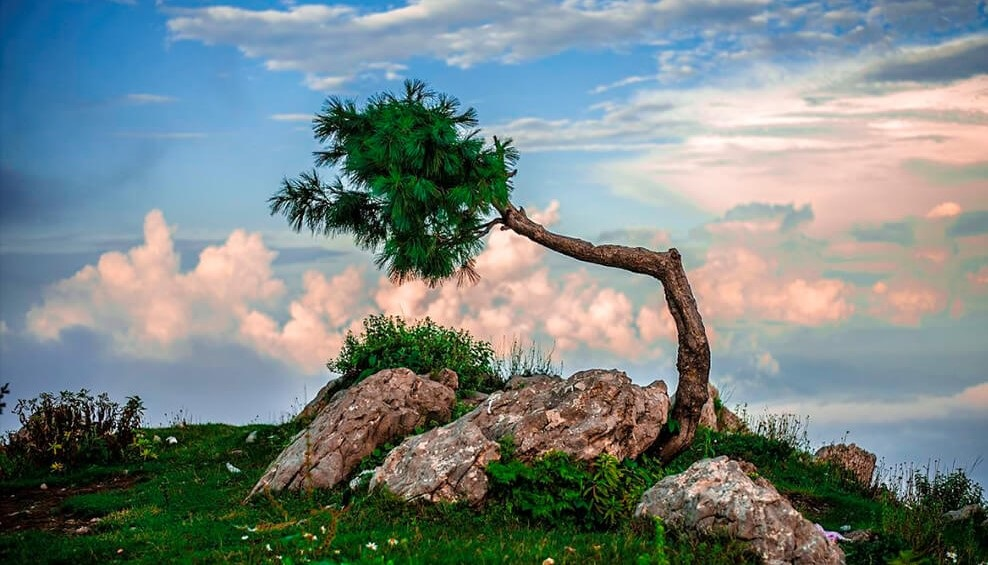

Attaching Output Compressed File 'Tree-edited.jpeg'- 105 kb

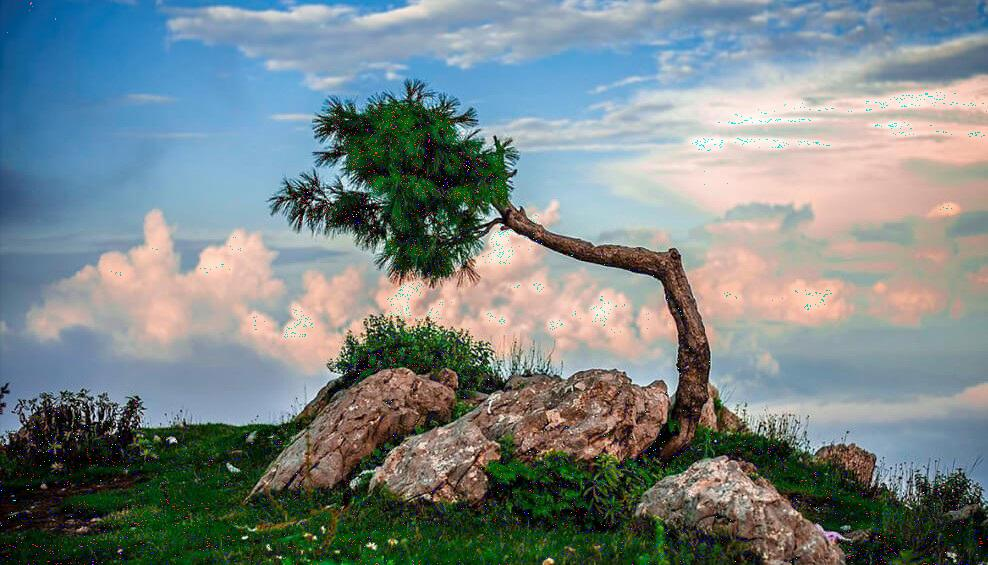

===========================================================================================================================